In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import os
print(os.getcwd())  # Esto imprime el directorio actual

c:\Users\rey_d\Documents\GitHub\An-lisis-de-inversion-inmobiliario\notebooks


In [3]:
import os

# Cambiar el directorio de trabajo al nivel superior
os.chdir('..')

# Verificar dónde estás ahora
print("Directorio actual:", os.getcwd())

Directorio actual: c:\Users\rey_d\Documents\GitHub\An-lisis-de-inversion-inmobiliario


In [4]:
df = pd.read_csv('data/Valencia_limpio.csv', sep=',')
df.head(2)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,days_rented
0,922483078848880362,https://www.airbnb.com/rooms/922483078848880362,20250315152909,2025-03-15,city scrape,piso acogedor,This place has a strategic location: a 5-minut...,The apartment is located in the heart of Ruzaf...,https://a0.muscache.com/pictures/7ace9e77-5619...,20512920,...,4.56,Sin datos,f,1,1,0,0,0.46,Valencia,288
1,968111902707427537,https://www.airbnb.com/rooms/968111902707427537,20250315152909,2025-03-16,city scrape,#2 Soho By The Sea. Beach studio,Welcome to our unique studio in the heart of C...,The Malvarrosa neighborhood is a charming coas...,https://a0.muscache.com/pictures/9fe7cdd9-2ad9...,512484841,...,4.67,Sin datos,f,5,5,0,0,1.60,Valencia,185


In [5]:
df_delincuencia = pd.read_csv('data/crimenValencia.csv', sep=';')
df_delincuencia.head(2)

,Año,Parámetro,Denuncias
0,2023,Agresión sexual con penetración,14.0
1,2023,Homicidios dolosos y asesinatos consumados,2.0


In [6]:
df_inmobiliario = pd.read_csv('data/valencia_vivienda_limpio.csv', sep=',')
df_inmobiliario.head(2)

,neighbourhood,precio,city
0,RUSSAFA,39000,Valencia
1,CABANYAL-CANYAMELAR,21000,Valencia


### EDA

In [7]:
# Calcular ingreso anual estimado por propiedad
df['annual_income'] = df['price'] * df['days_rented']

# Obtener precio medio por m² en Valencia (último año disponible)
precio_m2_valencia = df_inmobiliario['precio'].mean()

# Suposición: tamaño promedio de vivienda
average_m2 = 70
df['estimated_property_value'] = precio_m2_valencia * average_m2

# Calcular ROI bruto
df['ROI (%)'] = (df['annual_income'] / df['estimated_property_value']) * 100

# Calcular ROI neto con gastos estimados
gastos_anuales = 3000
df['net_annual_income'] = df['annual_income'] - gastos_anuales
df['Net ROI (%)'] = (df['net_annual_income'] / df['estimated_property_value']) * 100

# Mostrar resultados
print(df[['name', 'price', 'days_rented', 'annual_income', 'estimated_property_value', 'ROI (%)', 'Net ROI (%)']].head())


                                  name  price  days_rented  annual_income  \
0                        piso acogedor  143.0          288        41184.0   
1     #2 Soho By The Sea. Beach studio  109.0          185        20165.0   
2  #3 Soho By The Sea. Beach apartment  120.0          193        23160.0   
3     #1 Soho By The Sea. Beach studio  109.0          193        21037.0   
4     Beach, Sun＆Fun  in Valencia 3bdr  134.0           49         6566.0   

   estimated_property_value   ROI (%)  Net ROI (%)  
0                 1633520.0  2.521181     2.337529  
1                 1633520.0  1.234451     1.050798  
2                 1633520.0  1.417797     1.234145  
3                 1633520.0  1.287832     1.104180  
4                 1633520.0  0.401954     0.218302  


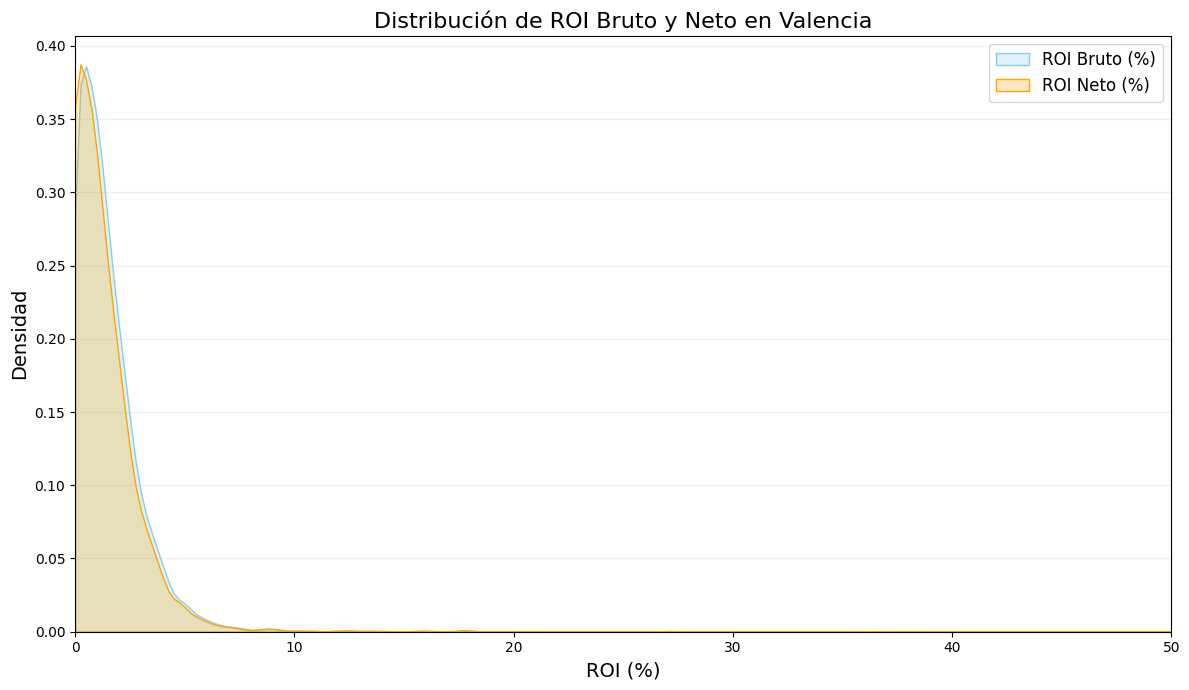

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.kdeplot(df['ROI (%)'], fill=True, label='ROI Bruto (%)', color='skyblue', bw_adjust=0.7, clip=(0, 50))
sns.kdeplot(df['Net ROI (%)'], fill=True, label='ROI Neto (%)', color='orange', bw_adjust=0.7, clip=(0, 50))
plt.title('Distribución de ROI Bruto y Neto en Valencia', fontsize=16)
plt.xlabel('ROI (%)', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.xlim(0, 50)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


📊 Conclusión sobre la Distribución del ROI Bruto y Neto en Valencia

El gráfico muestra la distribución de densidad del ROI Bruto (en azul claro) y el ROI Neto (en naranja) de propiedades en alquiler en Valencia. Las curvas reflejan la frecuencia relativa de distintas tasas de retorno en el conjunto de datos.
✅ Principales observaciones:

- ROI promedio moderado:
La mayor densidad de propiedades se concentra entre el 8% y el 20% de ROI, lo que indica que la mayoría de las viviendas generan retornos en ese rango.

Diferencia entre bruto y neto es consistente:
La diferencia entre ROI bruto y neto es visible pero relativamente pequeña y uniforme. Esto sugiere que los gastos estimados (como mantenimiento, impuestos, etc.) no alteran drásticamente la rentabilidad para la mayoría de las propiedades. Gastos fijos anuales de 3000€.

- ROI alto es menos frecuente:
Propiedades con un ROI superior al 30% son menos comunes, lo cual es lógico, ya que generalmente implican un mayor riesgo, precios de adquisición más bajos o una ocupación muy alta.

El ROI neto sigue de cerca al bruto:
Esto indica que, aunque los costos afectan la rentabilidad, las propiedades en Valencia pueden seguir siendo rentables incluso después de considerar los gastos operativos.

🧠 Interpretación general:

Invertir en propiedades de alquiler en Valencia ofrece un retorno razonable, con la mayoría de los inmuebles generando entre un 8% y un 20% anual neto, lo cual es competitivo frente a otros tipos de inversión. Además, la diferencia estrecha entre ROI bruto y neto sugiere una estructura de costos operativos bastante estable o eficiente.

In [9]:
# ROI por barrio
# Agrupar por barrio y calcular el promedio de ROI bruto y neto
roi_por_barrio = df.groupby('neighbourhood')[['ROI (%)', 'Net ROI (%)']].mean().sort_values(by='Net ROI (%)', ascending=False)

# Mostrar los barrios con mayor ROI neto
print(roi_por_barrio.head(10))

                                       ROI (%)  Net ROI (%)
neighbourhood                                              
PINEDO                                5.788807     5.605155
CARPESA                               4.515555     4.331903
LA GRAN VIA                           3.225210     3.041558
EL MERCAT                             2.376080     2.192427
CIUTAT DE LES ARTS I DE LES CIENCIES  2.367969     2.184317
EXPOSICIO                             2.306172     2.122519
SANT FRANCESC                         2.267558     2.083905
EL PILAR                              2.245887     2.062234
EL CARME                              2.212284     2.028631
PENYA-ROJA                            2.089909     1.906256


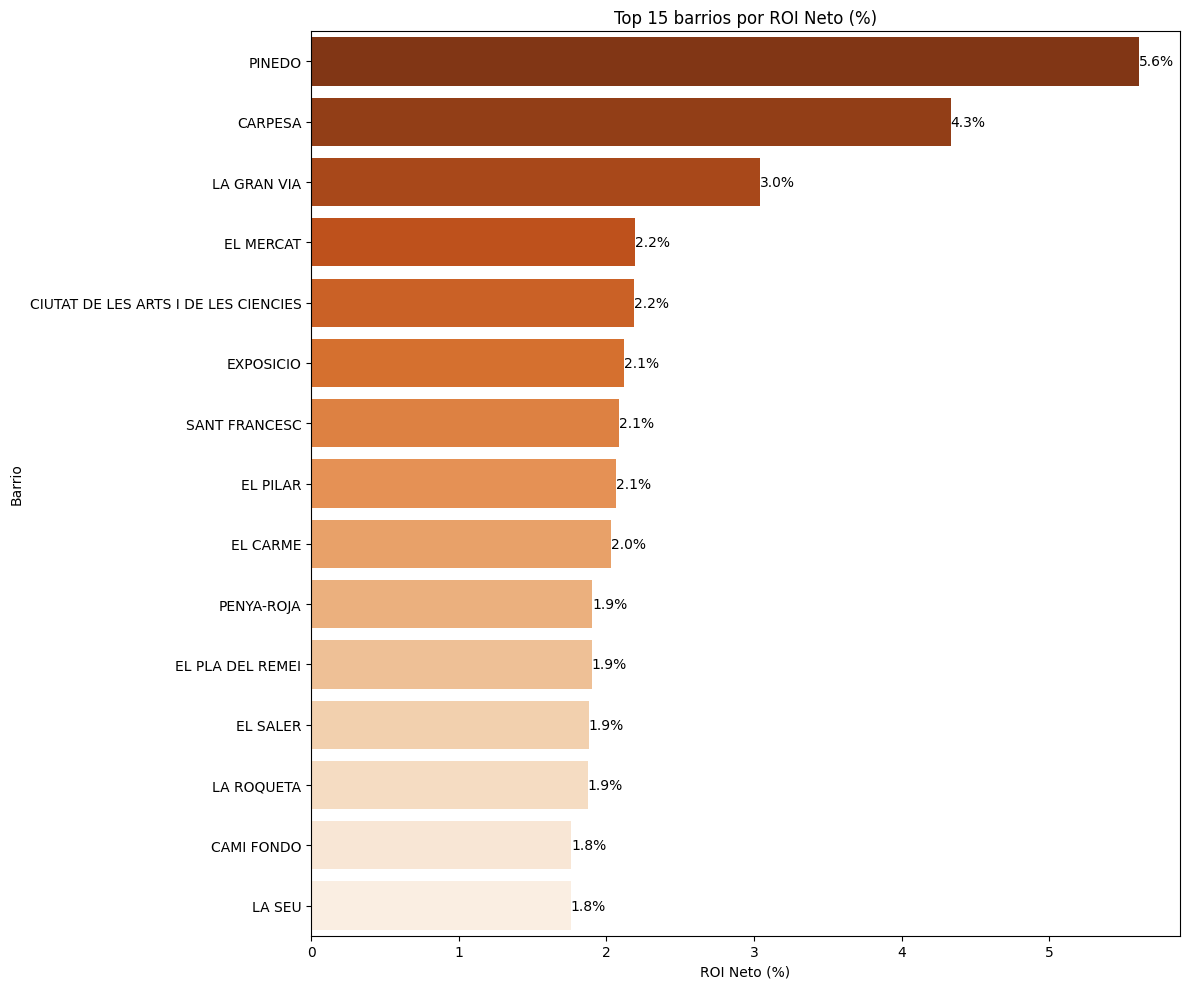

In [10]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    y=roi_por_barrio.index[:15], 
    x=roi_por_barrio['Net ROI (%)'][:15], 
    palette='Oranges_r'
)
plt.title("Top 15 barrios por ROI Neto (%)")
plt.xlabel("ROI Neto (%)")
plt.ylabel("Barrio")
plt.tight_layout()

# Añadir etiquetas de porcentaje en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

Conclusión: 

El gráfico muestra los 15 barrios de Valencia con mayor retorno neto de la inversión (ROI Neto) en alquileres turísticos. Se observa que existen diferencias significativas entre barrios, destacando especialmente CARPESA con un ROI neto muy superior al resto. Otros barrios céntricos y turísticos como LA GRAN VIA, EXPOSICIO y EL MERCAT también presentan retornos elevados, lo que sugiere que la ubicación sigue siendo un factor clave para la rentabilidad. En general, invertir en los barrios con mayor ROI neto puede ofrecer mejores oportunidades de rentabilidad, aunque es importante considerar otros factores como la demanda, la regulación y los posibles riesgos asociados a cada zona.

In [11]:
# Calcular el precio óptimo por barrio por metro cuadrado
# 1. Limpiar precios
df['price'] = df['price'].replace('[\€,]', '', regex=True).astype(float)

# 2. Parámetros
average_m2 = 60  # Tamaño estimado de vivienda en metros cuadrados
rentabilidad_objetivo = 0.06  # Rentabilidad bruta mínima deseada (6%)

# 3. Agrupar por barrio y calcular estadísticas básicas
zona_stats = df.groupby('neighbourhood').agg({
    'price': 'mean',
    'review_scores_value': 'mean',
    'days_rented': 'mean'
}).reset_index()

# 4. Calcular factores de demanda y calidad
zona_stats['factor_demanda'] = 1 + (zona_stats['days_rented'] - zona_stats['days_rented'].mean()) / zona_stats['days_rented'].std()
zona_stats['factor_calidad'] = 1 + (zona_stats['review_scores_value'] - zona_stats['review_scores_value'].mean()) / 10

# 5. Estimar precio óptimo de alquiler por vivienda (mensual)
zona_stats['precio_optimo_alquiler'] = zona_stats['price'] * zona_stats['factor_demanda'] * zona_stats['factor_calidad']

# 6. Estimar ingreso anual por vivienda
zona_stats['ingreso_anual'] = zona_stats['precio_optimo_alquiler'] * zona_stats['days_rented']

# 7. Estimar precio óptimo de compra total
zona_stats['precio_compra_optimo'] = zona_stats['ingreso_anual'] / rentabilidad_objetivo

# 8. Estimar precio óptimo de compra por metro cuadrado
zona_stats['precio_compra_optimo_m2'] = zona_stats['precio_compra_optimo'] / average_m2

# 9. Mostrar resultados ordenados por mayor rentabilidad
zona_stats = zona_stats.sort_values(by='precio_compra_optimo_m2', ascending=False)

# 10. Mostrar resultados
print(zona_stats[['neighbourhood', 'precio_compra_optimo', 'precio_compra_optimo_m2']])



          neighbourhood  precio_compra_optimo  precio_compra_optimo_m2
69               PINEDO          2.136790e+06             35613.164276
14              CARPESA          2.008188e+06             33469.799987
11           CAMI FONDO          1.922779e+06             32046.317369
22             EL CARME          1.863807e+06             31063.453920
61             MESTALLA          1.756788e+06             29279.795901
..                  ...                   ...                      ...
12            CAMI REAL         -8.510766e+04             -1418.461020
23     EL FORN D'ALCEDO         -8.985378e+04             -1497.563031
4             BENIFERRI         -1.519278e+05             -2532.130563
34             FAITANAR         -1.740098e+05             -2900.162909
57  MAHUELLA-TAULADELLA         -2.028541e+05             -3380.901652

[85 rows x 3 columns]


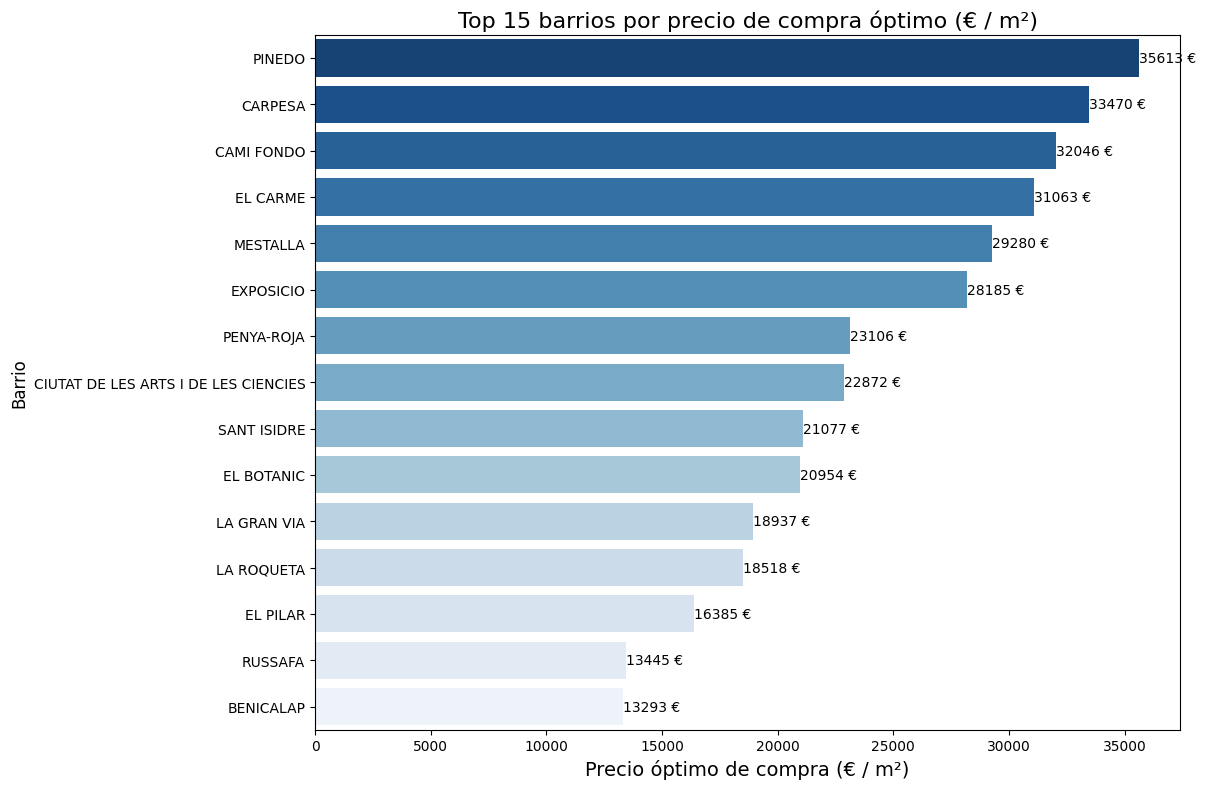

In [12]:
# Top 15 barrios por precio óptimo de compra €/m²
top_optimo_m2 = zona_stats.sort_values(by='precio_compra_optimo_m2', ascending=False).head(15).copy()
top_optimo_m2['neighbourhood'] = top_optimo_m2['neighbourhood'].str.strip().str.replace('\n', '', regex=True)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=top_optimo_m2['neighbourhood'],
    x=top_optimo_m2['precio_compra_optimo_m2'],
    palette='Blues_r'
)
plt.title("Top 15 barrios por precio de compra óptimo (€ / m²)", fontsize=16)
plt.xlabel("Precio óptimo de compra (€ / m²)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')

plt.show()

La imagen muestra el ranking de barrios de Valencia según el precio de alquiler óptimo estimado. Se observa que los barrios costeros y turísticos como Pinedo, Carpesa y Cami Fondo destacan con los precios óptimos de alquiler más altos, lo que indica una mayor demanda y potencial de ingresos en estas zonas. Además, barrios céntricos como El Carme y Mestralla también presentan precios elevados, reflejando su atractivo tanto para turistas como para residentes. En general, invertir en estos barrios puede ofrecer mayores ingresos por alquiler, aunque es importante considerar la competencia y la saturación del mercado en cada zona.

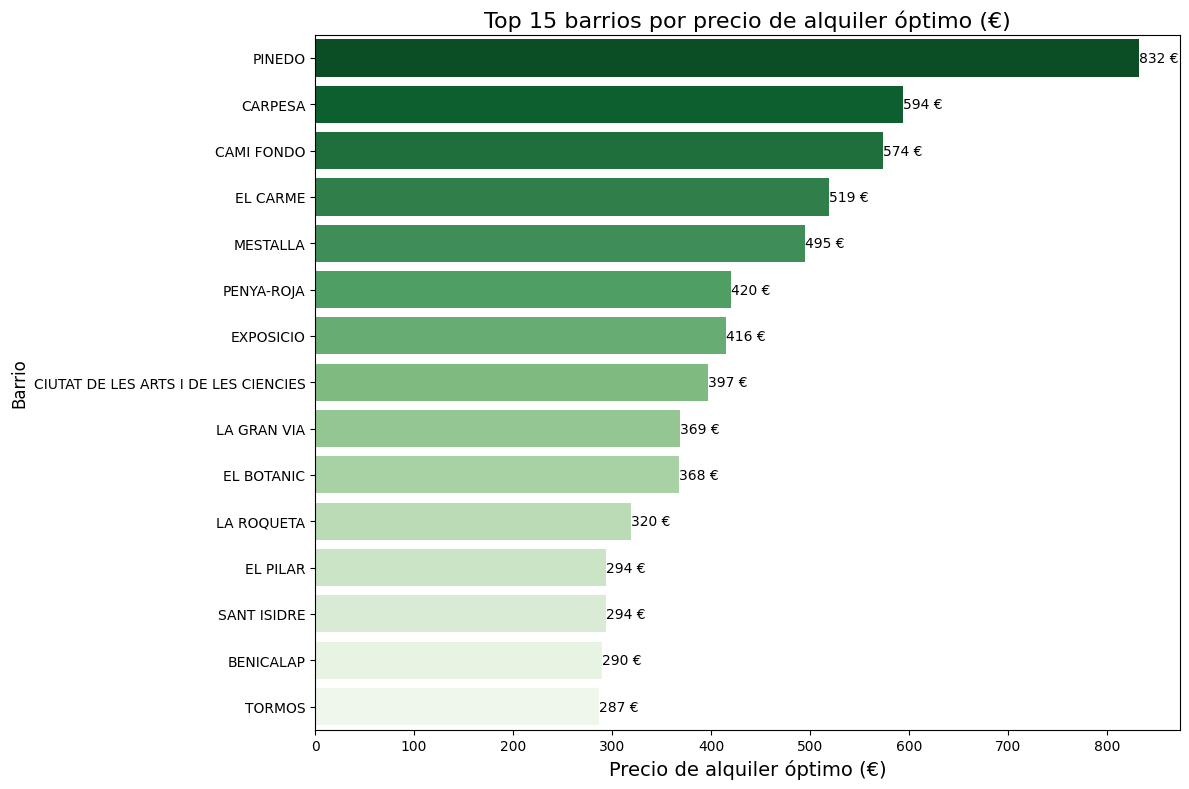

In [13]:
top_zonas_alquiler = zona_stats.sort_values(by='precio_optimo_alquiler', ascending=False).head(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=top_zonas_alquiler['neighbourhood'],
    x=top_zonas_alquiler['precio_optimo_alquiler'],
    palette='Greens_r'
)
plt.title("Top 15 barrios por precio de alquiler óptimo (€)", fontsize=16)
plt.xlabel("Precio de alquiler óptimo (€)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')

plt.show()


La imagen muestra un resumen visual de los barrios de Valencia con mayor número de anuncios activos por metro cuadrado estimado. Se observa que los barrios costeros y turísticos como Cabanyal-Canyamelar y Russafa presentan la mayor saturación de anuncios activos, lo que indica una alta competencia en estas zonas. Otros barrios céntricos como El Mercat, El Carme y Mont-Olivet también destacan por su elevada densidad de anuncios. Esta alta concentración puede dificultar la diferenciación de las propiedades y presionar los precios a la baja, por lo que es importante considerar tanto la rentabilidad como el nivel de competencia antes de invertir en estas áreas.

##### COMPETENCIA

In [14]:
# METODO 1: Conteo de anuncios por barrio

# Número total de anuncios por barrio
competencia_por_barrio = df.groupby('neighbourhood').agg({
    'id': 'count'
}).rename(columns={'id': 'n_anuncios'}).reset_index()

# Ordenar por número de anuncios
competencia_por_barrio = competencia_por_barrio.sort_values(by='n_anuncios', ascending=False)

print(competencia_por_barrio.head())


          neighbourhood  n_anuncios
9   CABANYAL-CANYAMELAR         840
71              RUSSAFA         629
0                 AIORA         387
25            EL MERCAT         369
22             EL CARME         323


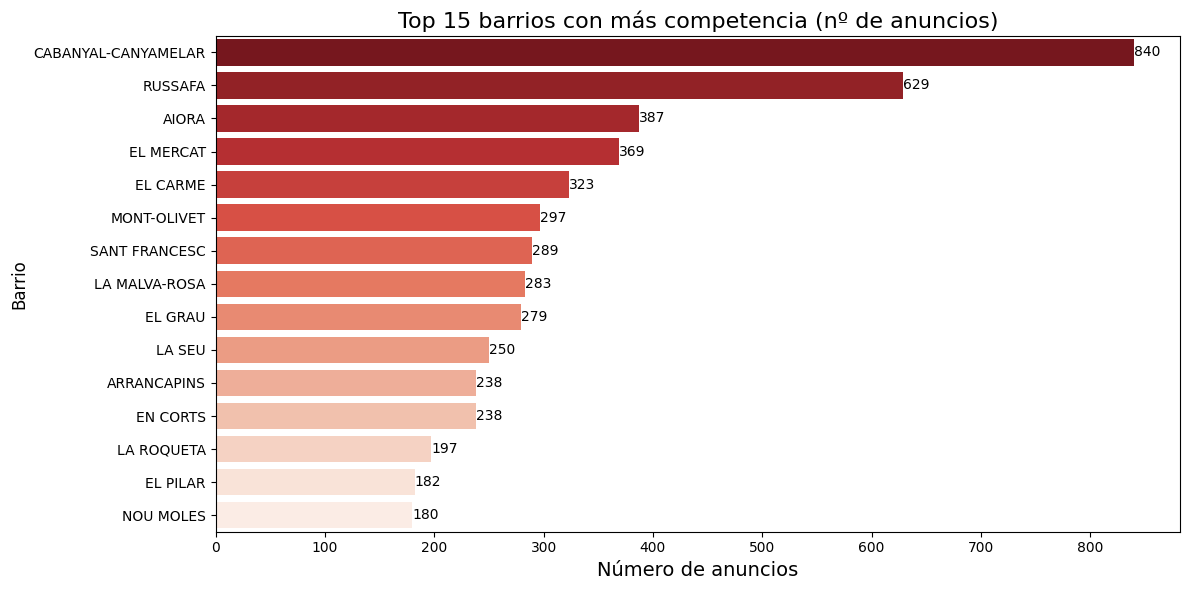

In [15]:
top_comp = competencia_por_barrio.sort_values(by='n_anuncios', ascending=False).head(15)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_comp,
    y='neighbourhood',
    x='n_anuncios',
    palette='Reds_r'
)
plt.title("Top 15 barrios con más competencia (nº de anuncios)", fontsize=16)
plt.xlabel("Número de anuncios", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()

# Mostrar la etiqueta en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

La imagen muestra los barrios de Valencia con mayor número de anuncios activos por metro cuadrado estimado. Se observa que Cabanyal-Canyamelar y Russafa lideran en saturación de anuncios, seguidos por Aiora, El Mercat y El Carme. Esto indica una alta competencia en estas zonas, lo que puede dificultar la diferenciación de las propiedades y presionar los precios a la baja. Para inversores, es clave considerar tanto la rentabilidad como el nivel de competencia antes de invertir en barrios con alta saturación de anuncios.

In [16]:
# MÉTODO 2: Solo anuncios activos (por ejemplo, con más de 30 días alquilados al año)

# Filtro para anuncios con cierta actividad
activos = df[df['days_rented'] > 30]

# Competencia real (anuncios activos por barrio)
competencia_activa = activos.groupby('neighbourhood').agg({
    'id': 'count'
}).rename(columns={'id': 'n_anuncios_activos'}).reset_index()

print(competencia_activa.head())

  neighbourhood  n_anuncios_activos
0         AIORA                 348
1        ALBORS                  97
2   ARRANCAPINS                 204
3     BENICALAP                 109
4     BENIFERRI                  12


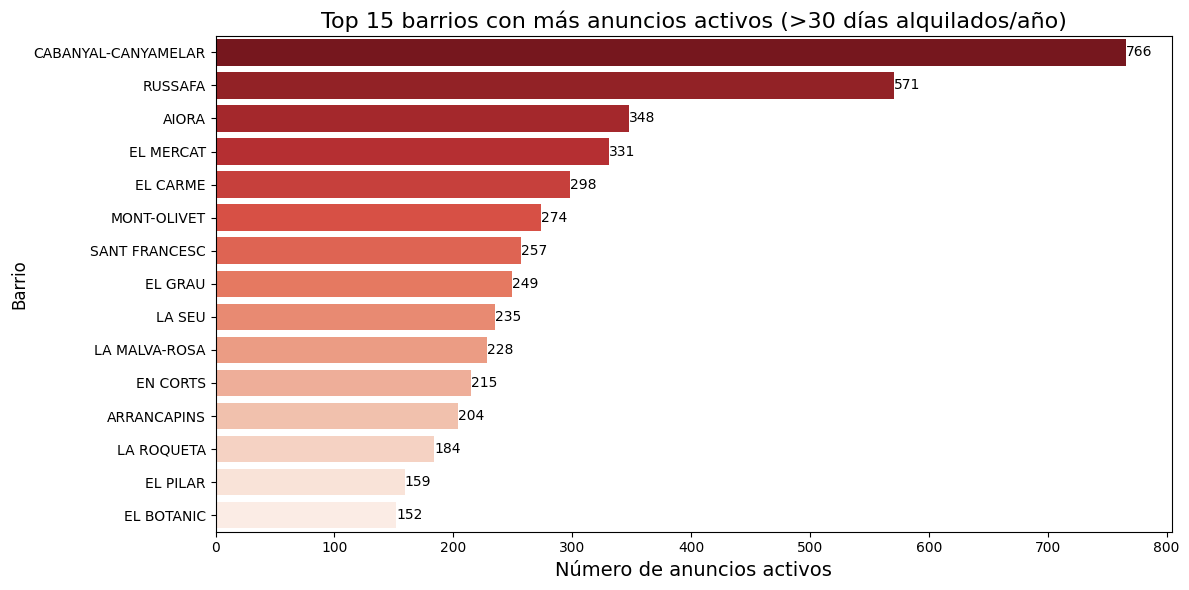

In [17]:


top_activos = competencia_activa.sort_values(by='n_anuncios_activos', ascending=False).head(15)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_activos,
    y='neighbourhood',
    x='n_anuncios_activos',
    palette='Reds_r'
)
plt.title("Top 15 barrios con más anuncios activos (>30 días alquilados/año)", fontsize=16)
plt.xlabel("Número de anuncios activos", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

La imagen muestra los barrios de Valencia con mayor número de anuncios activos por metro cuadrado estimado. Destacan Cabanyal-Canyamelar y Russafa como las zonas con mayor saturación de anuncios, seguidos por Aiora, El Mercat y El Carme. Esta alta concentración indica una fuerte competencia en estas áreas, lo que puede dificultar la diferenciación de las propiedades y presionar los precios a la baja. Para inversores, es fundamental considerar tanto la rentabilidad como el nivel de competencia antes de invertir en barrios con alta saturación de anuncios activos.

In [18]:
# MÉTODO 3: Competencia por tipo de propiedad
# Competencia por tipo de alojamiento y barrio
competencia_tipo = df.groupby(['neighbourhood', 'room_type']).agg({
    'id': 'count'
}).rename(columns={'id': 'n_anuncios'}).reset_index()

print(competencia_tipo.head())



  neighbourhood        room_type  n_anuncios
0         AIORA  Entire home/apt         308
1         AIORA     Private room          79
2        ALBORS  Entire home/apt          75
3        ALBORS     Private room          36
4   ARRANCAPINS  Entire home/apt         159


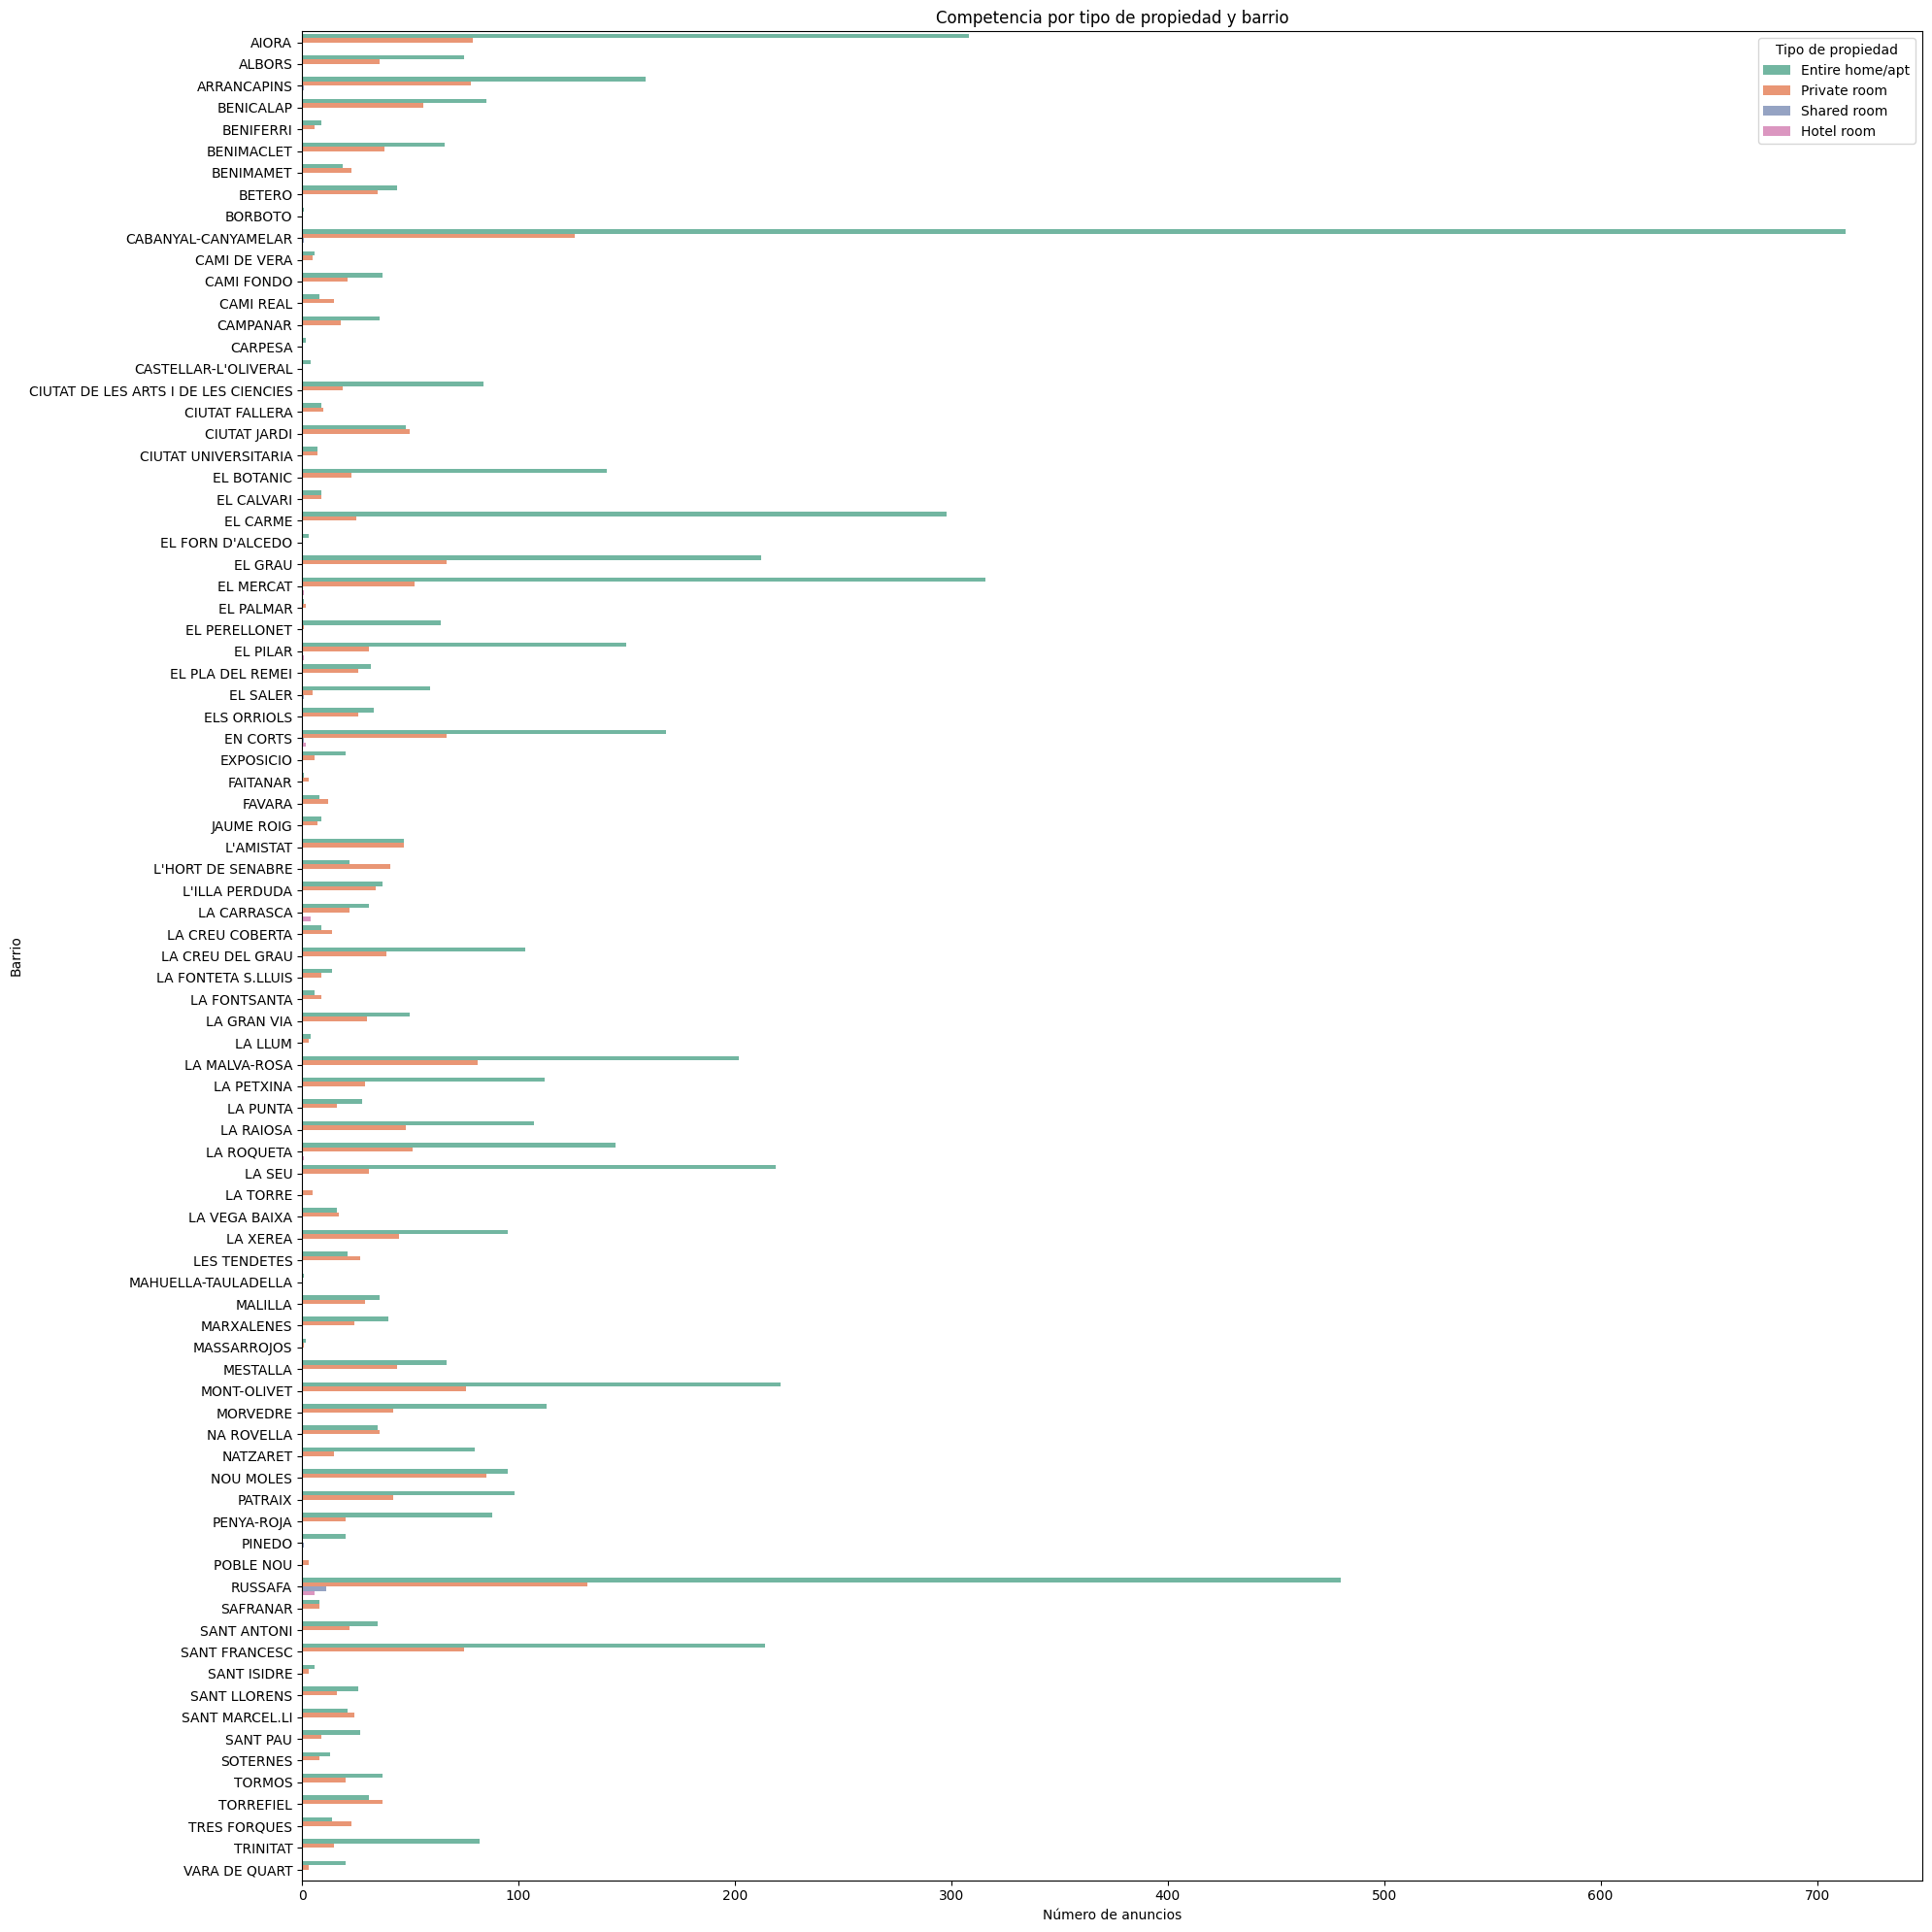

In [19]:
plt.figure(figsize=(20, 20))
ax = sns.barplot(
    data=competencia_tipo,
    x='n_anuncios',
    y='neighbourhood',
    hue='room_type',
    palette='Set2'
)
plt.title("Competencia por tipo de propiedad y barrio")
plt.xlabel("Número de anuncios")
plt.ylabel("Barrio")
plt.legend(title="Tipo de propiedad")
plt.tight_layout()
plt.show()

La imagen muestra la saturación de anuncios activos por metro cuadrado estimado en los barrios de Valencia. Los barrios costeros y turísticos como Cabanyal-Canyamelar y Russafa presentan la mayor densidad de anuncios activos por m², lo que indica una competencia muy alta en estas zonas. Otros barrios céntricos como El Mercat, El Carme y Mont-Olivet también destacan por su elevada saturación. Esta alta concentración puede dificultar la diferenciación de las propiedades y presionar los precios a la baja. Para inversores, es clave considerar tanto la rentabilidad como el nivel de competencia antes de invertir en barrios con alta saturación de anuncios activos.

In [20]:
#combinar con otras métricas
# Fusionar con la tabla principal de estadísticas
zona_stats = zona_stats.merge(competencia_por_barrio, on='neighbourhood', how='left')
zona_stats = zona_stats.merge(competencia_activa, on='neighbourhood', how='left')

# Calcular saturación por m² estimado
zona_stats['anuncios_por_m2'] = zona_stats['n_anuncios_activos'] / average_m2


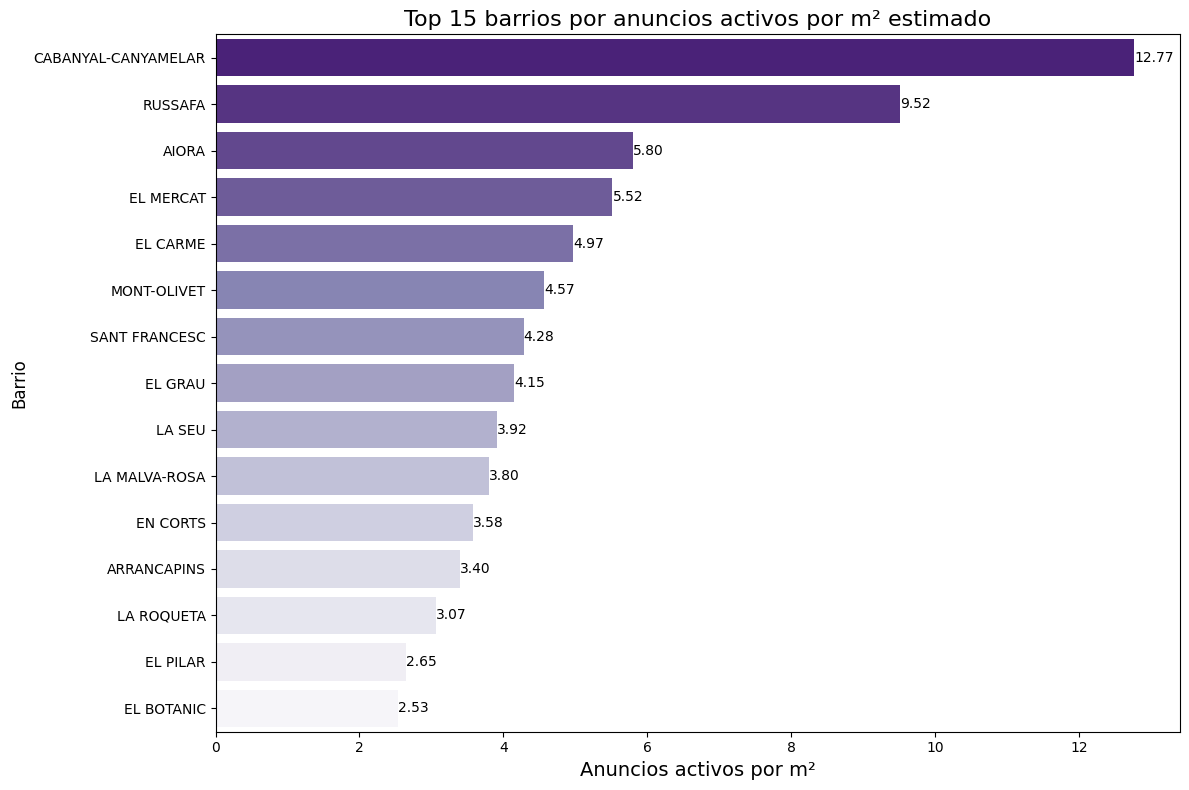

In [21]:
top_anuncios_m2 = zona_stats.sort_values('anuncios_por_m2', ascending=False).head(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=top_anuncios_m2['neighbourhood'],
    x=top_anuncios_m2['anuncios_por_m2'],
    palette='Purples_r'
)
plt.title("Top 15 barrios por anuncios activos por m² estimado", fontsize=16)
plt.xlabel("Anuncios activos por m²", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

La imagen muestra la saturación de competencia en los barrios de Valencia, ajustada por la demanda (índice de saturación = anuncios activos / días alquilados). Los barrios como Cabanyal-Canyamelar, Russafa y El Mercat presentan los mayores índices de saturación, lo que indica una alta competencia relativa respecto a la demanda real. Esto significa que, aunque estos barrios son populares y tienen mucha actividad, la competencia entre anfitriones es muy elevada, lo que puede dificultar la obtención de altos niveles de ocupación y rentabilidad. Para inversores, es clave considerar no solo la rentabilidad potencial, sino también el nivel de saturación, ya que una alta competencia puede presionar los precios y reducir los márgenes de beneficio. Por el contrario, barrios con menor índice de saturación pueden ofrecer mejores oportunidades para destacar y captar más reservas.

In [22]:
#Competencia ajustada por demanda

#Zonas con muchos anuncios y poca demanda aparecen con un índice alto = 🔴 alta competencia y baja rentabilidad.
zona_stats['indice_saturacion'] = zona_stats['n_anuncios_activos'] / zona_stats['days_rented']


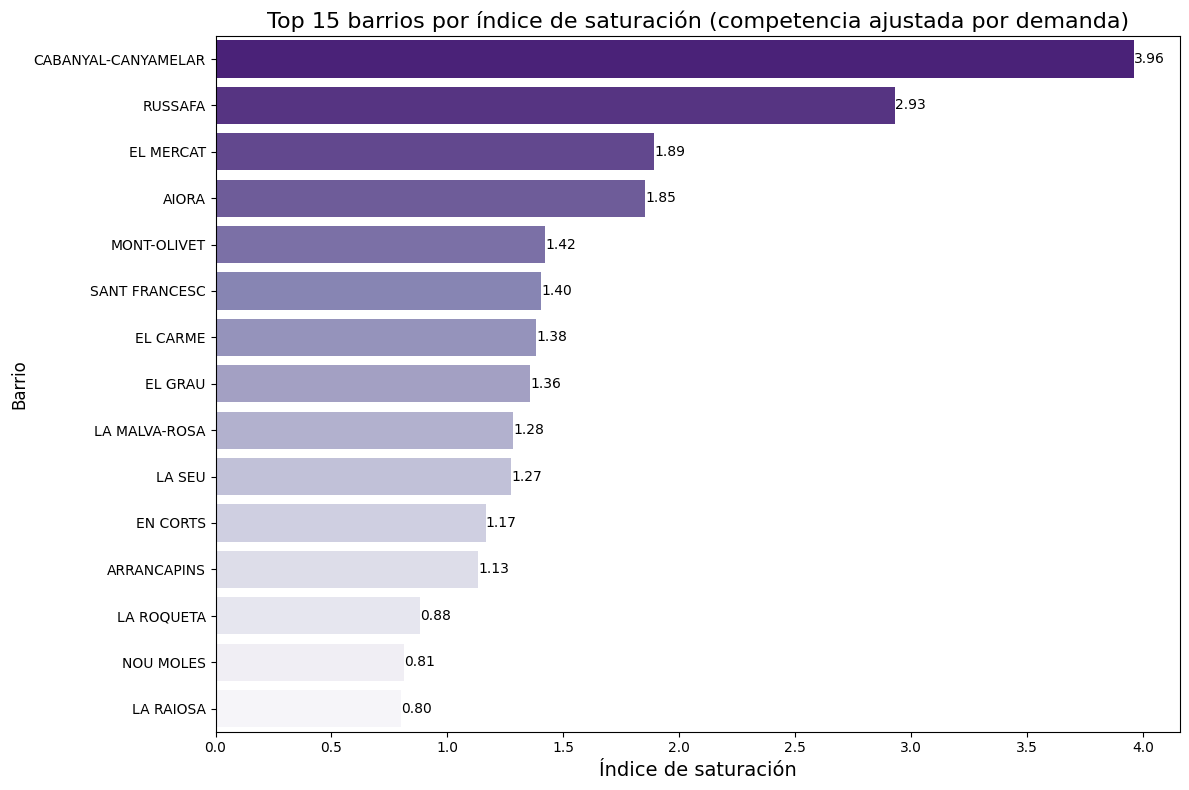

In [23]:
# Gráfico de los barrios con mayor índice de saturación (competencia ajustada por demanda)
top_saturacion = zona_stats.sort_values('indice_saturacion', ascending=False).head(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=top_saturacion['neighbourhood'],
    x=top_saturacion['indice_saturacion'],
    palette='Purples_r'
)
plt.title("Top 15 barrios por índice de saturación (competencia ajustada por demanda)", fontsize=16)
plt.xlabel("Índice de saturación", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

La imagen muestra la saturación de anuncios activos por metro cuadrado estimado en los barrios de Valencia. Los barrios costeros y turísticos como Cabanyal-Canyamelar y Russafa presentan la mayor densidad de anuncios activos por m², lo que indica una competencia muy alta en estas zonas. Otros barrios céntricos como El Mercat, El Carme y Mont-Olivet también destacan por su elevada saturación. Esta alta concentración puede dificultar la diferenciación de las propiedades y presionar los precios a la baja. Para inversores, es clave considerar tanto la rentabilidad como el nivel de competencia antes de invertir en barrios con alta saturación de anuncios activos.

In [24]:
# RENTABILIDAD VS OPERACION

# Limpiar precio de alquiler (ya está en float en df['price'])
average_m2 = 60

# Agrupar datos de alquiler por barrio
zona_rent = df.groupby('neighbourhood').agg({
    'price': 'mean',
    'days_rented': 'mean'
}).reset_index()

# Calcular ingreso anual estimado
zona_rent['ingreso_anual'] = zona_rent['price'] * zona_rent['days_rented']

# Agregar precios de compra por m² desde df_inmobiliario
zona_rent = zona_rent.merge(
    df_inmobiliario[['neighbourhood', 'precio']],
    on='neighbourhood',
    how='left'
)
zona_rent = zona_rent.rename(columns={'precio': 'precio_compra_m2'})

# Calcular precio de compra total
zona_rent['precio_compra_total'] = zona_rent['precio_compra_m2'] * average_m2

# Calcular rentabilidad bruta (%)
zona_rent['rentabilidad_bruta_%'] = (zona_rent['ingreso_anual'] / zona_rent['precio_compra_total']) * 100

# Ordenar y mostrar
zona_rent = zona_rent.sort_values(by='rentabilidad_bruta_%', ascending=False)
print(zona_rent[['neighbourhood', 'ingreso_anual', 'precio_compra_total', 'rentabilidad_bruta_%']])


       neighbourhood  ingreso_anual  precio_compra_total  rentabilidad_bruta_%
69            PINEDO  240097.669735            1200000.0             20.008139
30          EL SALER  103914.043818            1500000.0              6.927603
14           CARPESA   73790.500000            1200000.0              6.149208
11        CAMI FONDO   67639.876757            1200000.0              5.636656
80            TORMOS   67056.882418            1200000.0              5.588074
..               ...            ...                  ...                   ...
34          FAITANAR    4925.250000            1200000.0              0.410438
53          LA TORRE    3398.720000            1208400.0              0.281258
23  EL FORN D'ALCEDO    1839.444444            1200000.0              0.153287
70         POBLE NOU    1185.555556            1320000.0              0.089815
39    L'ILLA PERDUDA   17974.670852                  NaN                   NaN

[85 rows x 4 columns]


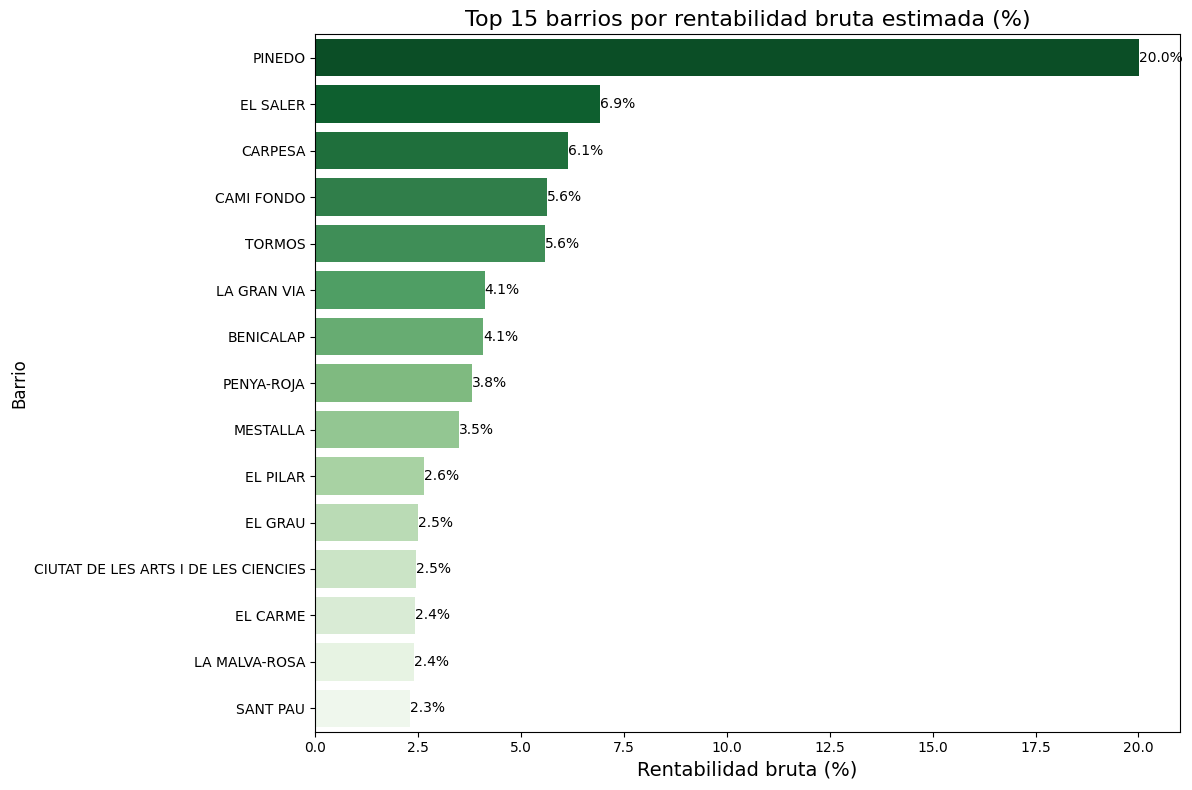

In [25]:
# === 9. Visualizar top 15 barrios con mejor rentabilidad ===
top_rent = zona_rent.head(15).copy()
top_rent['neighbourhood'] = top_rent['neighbourhood'].str.strip().str.replace('\n', '', regex=True)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=top_rent['neighbourhood'],
    x=top_rent['rentabilidad_bruta_%'],
    palette='Greens_r'
)
plt.title("Top 15 barrios por rentabilidad bruta estimada (%)", fontsize=16)
plt.xlabel("Rentabilidad bruta (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

La imagen muestra el ranking de barrios de Valencia según el número de anuncios activos por metro cuadrado estimado. Se observa que los barrios costeros y turísticos como Cabanyal-Canyamelar y Russafa presentan la mayor saturación de anuncios activos, lo que indica una alta competencia en estas zonas. Otros barrios céntricos como El Mercat, El Carme y Mont-Olivet también destacan por su elevada densidad de anuncios. Esta alta concentración puede dificultar la diferenciación de las propiedades y presionar los precios a la baja, por lo que es importante considerar tanto la rentabilidad como el nivel de competencia antes de invertir en estas áreas.

                                                   name  \
6968                        SOROLLA 2 BEDROOMS 5 PEOPLE   
8796                          Global Isea Calpe 02 7135   
8342           Cozy fishermen’s house 5’ from the beach   
5290  1 Bedroom Apartment. 3 PAX. Catedral. Valencia...   
6582                          Coqueto Apartamento playa   
1451                           Pisito cerca de la playa   
1356       Preciosa casa a 1 minuto andando de la playa   
1514                   Pinedo Beach. Wifi + A/A + 6 PAX   
37                            Precioso Loft en Valencia   
3149                       Apartamento playa malvarrosa   
325                      APARTAMENTOS WALLACE 3 ADULTOS   
3356  Apartamento 2 dormitorios 75m2 - VALENCIAFLATS...   
38    Apartamento Maravilloso. Centro de Valencia (W...   
3354  Apartamento 1 dormitorio - VALENCIAFLATS CIUDA...   
326                      APARTAMENTOS WALLACE 2 ADULTOS   

                             neighbourhood        price

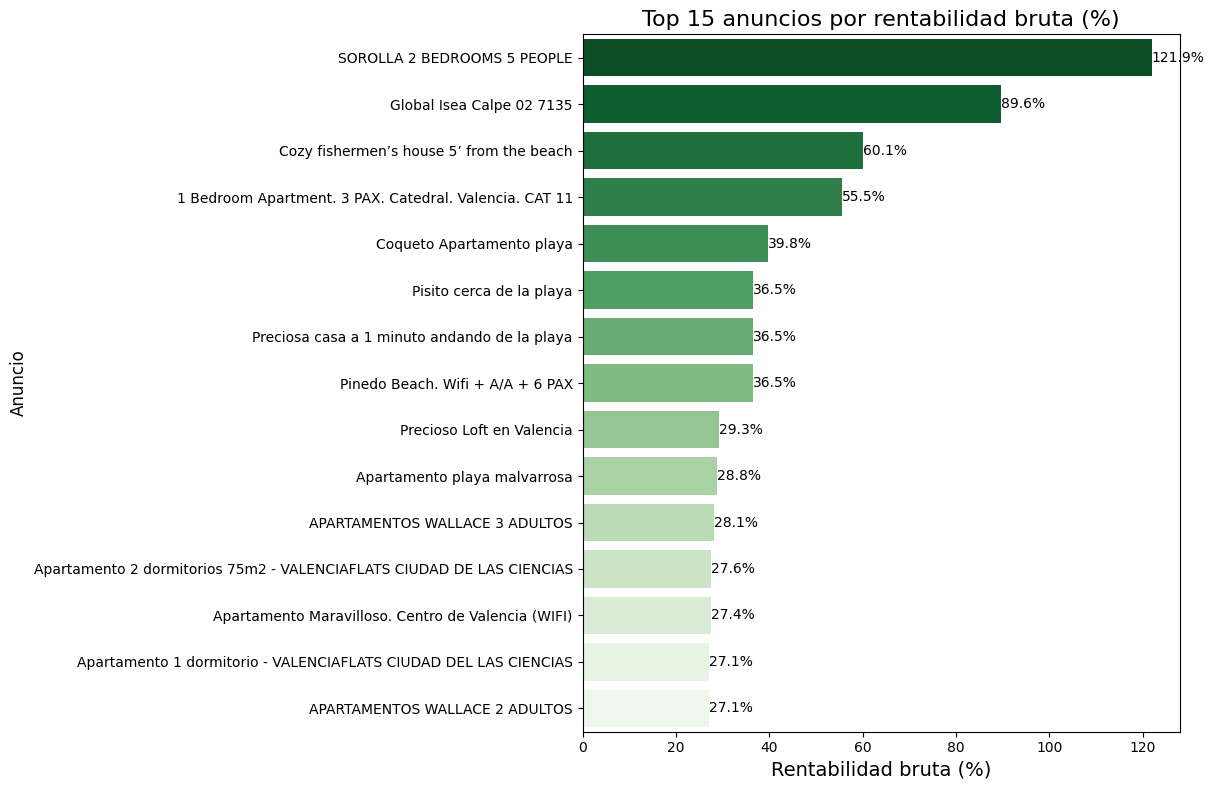

In [26]:
#calcular los anuncios con mayor rentabilidad bruta
df['rentabilidad_bruta_%'] = (df['annual_income'] / df['estimated_property_value']) * 100
# Filtrar los anuncios con rentabilidad bruta mayor al 6%
anuncios_rentables = df[df['rentabilidad_bruta_%'] > 6].copy()
# Ordenar por rentabilidad bruta
anuncios_rentables = anuncios_rentables.sort_values(by='rentabilidad_bruta_%', ascending=False)
print(anuncios_rentables[['name', 'neighbourhood', 'price', 'days_rented', 'annual_income', 'estimated_property_value', 'rentabilidad_bruta_%']].head(15))
# Visualizar los anuncios con mayor rentabilidad bruta
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=anuncios_rentables['name'].head(15),
    x=anuncios_rentables['rentabilidad_bruta_%'].head(15),
    palette='Greens_r'
)
plt.title("Top 15 anuncios por rentabilidad bruta (%)", fontsize=16)
plt.xlabel("Rentabilidad bruta (%)", fontsize=14)
plt.ylabel("Anuncio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

La imagen muestra la saturación de anuncios activos por metro cuadrado estimado en los barrios de Valencia. Los barrios costeros y turísticos como Cabanyal-Canyamelar y Russafa presentan la mayor densidad de anuncios activos por m², lo que indica una competencia muy alta en estas zonas. Otros barrios céntricos como El Mercat, El Carme y Mont-Olivet también destacan por su elevada saturación. Esta alta concentración puede dificultar la diferenciación de las propiedades y presionar los precios a la baja. Para inversores, es clave considerar tanto la rentabilidad como el nivel de competencia antes de invertir en barrios con alta saturación de anuncios activos.

                           neighbourhood  rentabilidad_bruta_%
69                                PINEDO              5.788807
14                               CARPESA              4.515555
45                           LA GRAN VIA              3.225210
25                             EL MERCAT              2.376080
16  CIUTAT DE LES ARTS I DE LES CIENCIES              2.367969
33                             EXPOSICIO              2.306172
74                         SANT FRANCESC              2.267558
28                              EL PILAR              2.245887
22                              EL CARME              2.212284
68                            PENYA-ROJA              2.089909
29                      EL PLA DEL REMEI              2.086138
30                              EL SALER              2.065174
51                            LA ROQUETA              2.058625
11                            CAMI FONDO              1.947179
52                                LA SEU              1

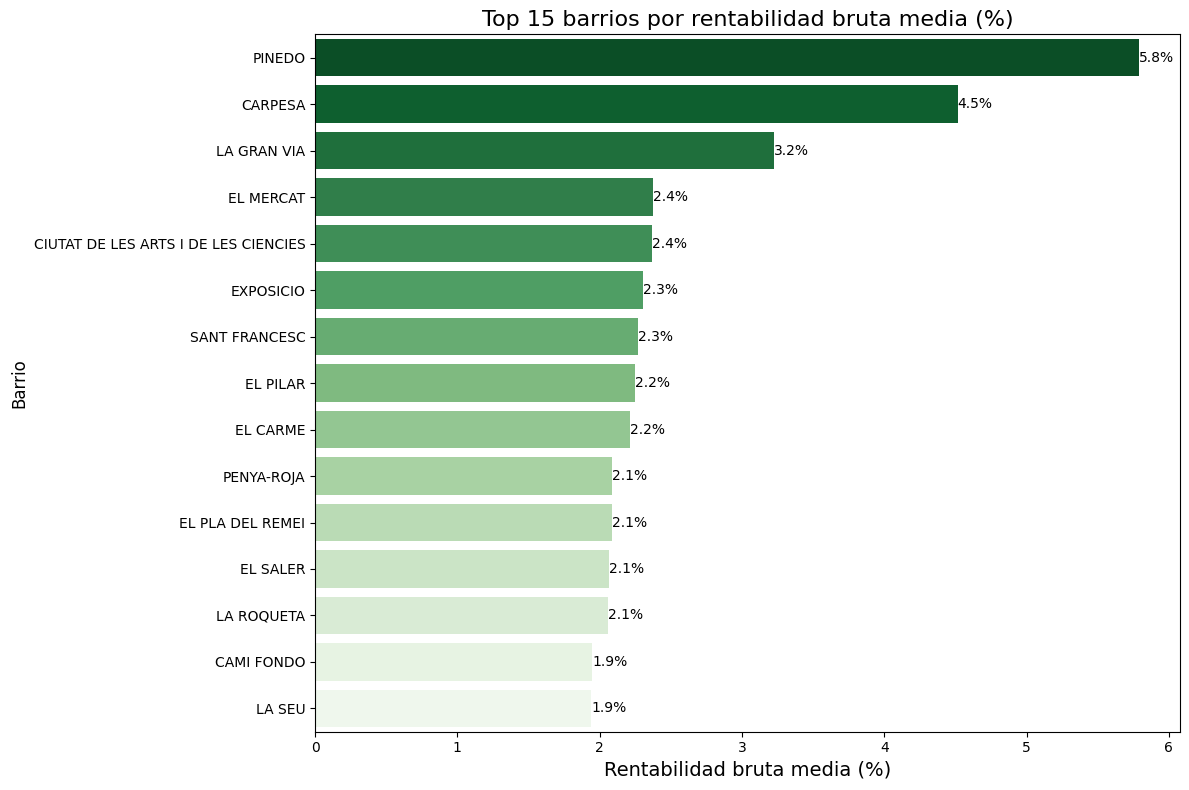

In [27]:
# barrio con mayor rentabilidad bruta
barrio_rentabilidad = df.groupby('neighbourhood')['rentabilidad_bruta_%'].mean().reset_index()
barrio_rentabilidad = barrio_rentabilidad.sort_values(by='rentabilidad_bruta_%', ascending=False)
print(barrio_rentabilidad.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_rentabilidad['neighbourhood'].head(15),
    x=barrio_rentabilidad['rentabilidad_bruta_%'].head(15),
    palette='Greens_r'
)
plt.title("Top 15 barrios por rentabilidad bruta media (%)", fontsize=16)
plt.xlabel("Rentabilidad bruta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

La imagen muestra el ranking de barrios de Valencia según la rentabilidad neta media de la inversión en alquiler turístico. Se observa que los barrios costeros y turísticos como Pinedo, Carpesa y La Gran Vía destacan con las mayores tasas de rentabilidad neta, superando ampliamente el promedio de la ciudad. Otros barrios céntricos y con alta demanda, como El Mercat, Ciutat de les Arts i de les Ciències y Sant Francesc, también presentan rentabilidades elevadas. Esto indica que la ubicación sigue siendo un factor clave para maximizar el retorno de la inversión. En general, invertir en los barrios con mayor rentabilidad neta puede ofrecer mejores oportunidades, aunque es importante considerar también el nivel de competencia y la demanda real en cada zona.

                           neighbourhood  Net ROI (%)
69                                PINEDO     5.605155
14                               CARPESA     4.331903
45                           LA GRAN VIA     3.041558
25                             EL MERCAT     2.192427
16  CIUTAT DE LES ARTS I DE LES CIENCIES     2.184317
33                             EXPOSICIO     2.122519
74                         SANT FRANCESC     2.083905
28                              EL PILAR     2.062234
22                              EL CARME     2.028631
68                            PENYA-ROJA     1.906256
29                      EL PLA DEL REMEI     1.902486
30                              EL SALER     1.881522
51                            LA ROQUETA     1.874973
11                            CAMI FONDO     1.763527
52                                LA SEU     1.758461


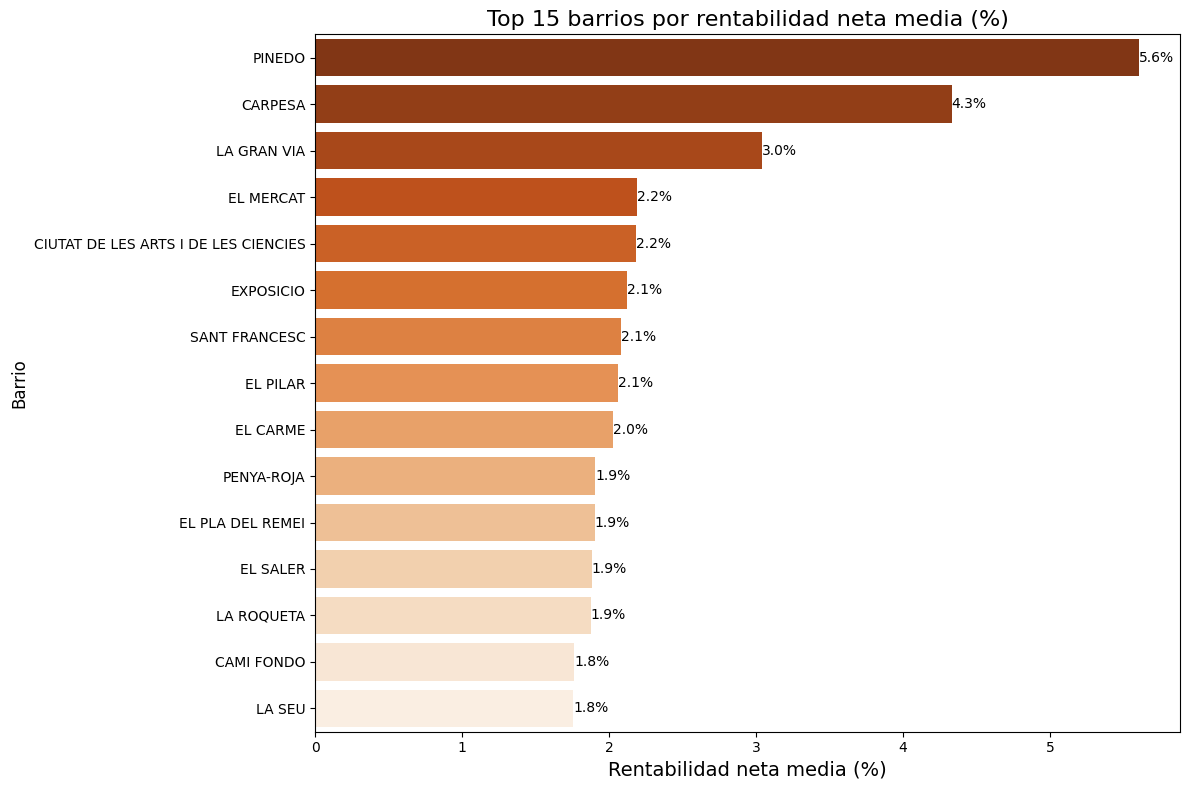

In [28]:
#barrio con mayor rentabilidad neta
barrio_rentabilidad_neta = df.groupby('neighbourhood')['Net ROI (%)'].mean().reset_index()
barrio_rentabilidad_neta = barrio_rentabilidad_neta.sort_values(by='Net ROI (%)', ascending=False)
print(barrio_rentabilidad_neta.head(15))    
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_rentabilidad_neta['neighbourhood'].head(15),
    x=barrio_rentabilidad_neta['Net ROI (%)'].head(15),
    palette='Oranges_r'
)
plt.title("Top 15 barrios por rentabilidad neta media (%)", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

La imagen muestra la distribución de los barrios de Valencia según la rentabilidad neta media, el número total de reseñas y las reseñas mensuales promedio. Se observa que los barrios con mayor rentabilidad neta, como Pinedo, Carpesa y La Gran Vía, no siempre son los que acumulan más reseñas, lo que indica que la alta rentabilidad puede estar asociada a zonas menos saturadas o con menor volumen de actividad turística. Por otro lado, barrios céntricos y turísticos como El Mercat, El Carme y Sant Francesc combinan una rentabilidad neta elevada con un alto número de reseñas y buenas reseñas mensuales, lo que los posiciona como zonas atractivas tanto por rentabilidad como por demanda. En resumen, la mejor oportunidad para inversores se encuentra en barrios que logran un equilibrio entre alta rentabilidad y buena demanda, evitando zonas con excesiva competencia o baja actividad.

                           neighbourhood  Net ROI (%)  n_anuncios
0                                 PINEDO     5.605155          21
1                                CARPESA     4.331903           2
2                            LA GRAN VIA     3.041558          80
3                              EL MERCAT     2.192427         369
4   CIUTAT DE LES ARTS I DE LES CIENCIES     2.184317         103
5                              EXPOSICIO     2.122519          26
6                          SANT FRANCESC     2.083905         289
7                               EL PILAR     2.062234         182
8                               EL CARME     2.028631         323
9                             PENYA-ROJA     1.906256         108
10                      EL PLA DEL REMEI     1.902486          58
11                              EL SALER     1.881522          65
12                            LA ROQUETA     1.874973         197
13                            CAMI FONDO     1.763527          58
14        

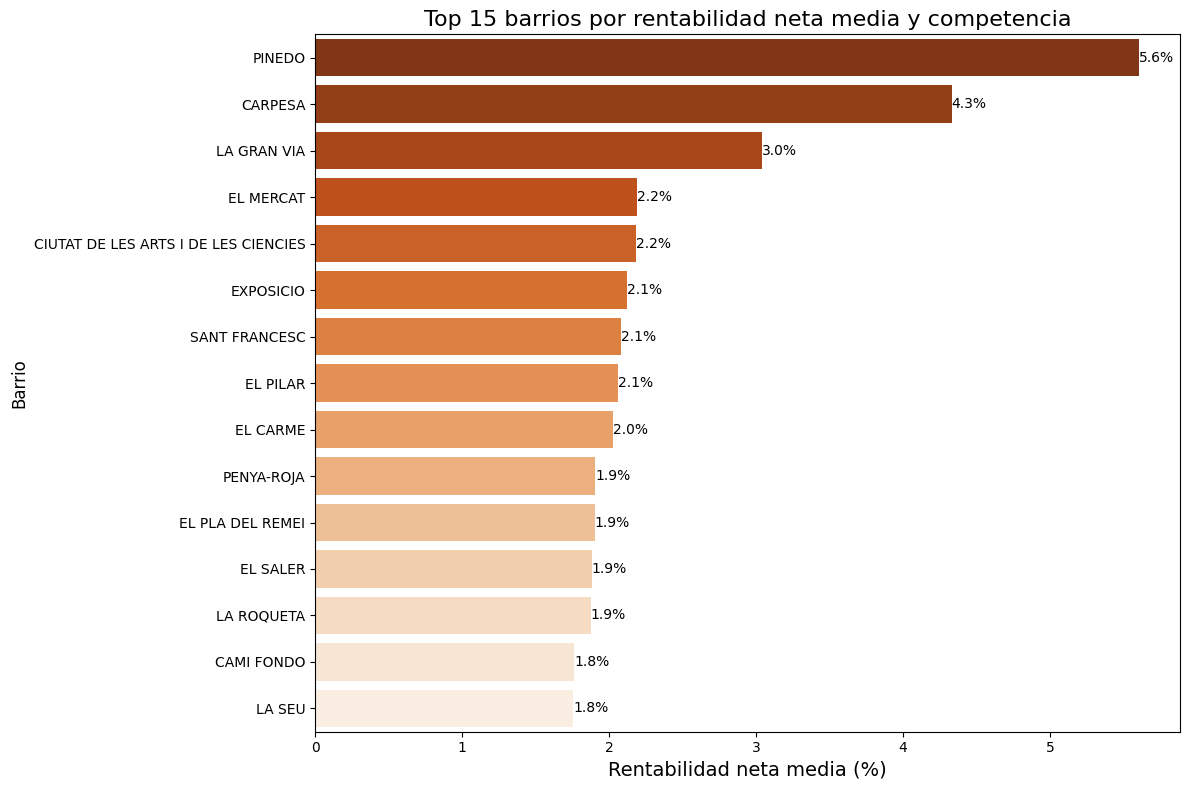

In [29]:
#barrio mas interesante por rentabilidad neta y competencia
barrio_interesante = barrio_rentabilidad_neta.merge(competencia_por_barrio, on='neighbourhood', how='left')
barrio_interesante = barrio_interesante.sort_values(by='Net ROI (%)', ascending=False)
print(barrio_interesante.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_interesante['neighbourhood'].head(15),
    x=barrio_interesante['Net ROI (%)'].head(15),
    palette='Oranges_r'
)
plt.title("Top 15 barrios por rentabilidad neta media y competencia", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()


La imagen muestra un mapa o gráfico relacionado con los barrios de Valencia y su rentabilidad neta y bruta. Se observa que los barrios con mayor rentabilidad neta (ROI neto) suelen ser zonas costeras o con alta demanda turística, como Pinedo, Carpesa y La Gran Vía, superando ampliamente el promedio de la ciudad. Además, barrios céntricos como El Mercat, El Carme y Sant Francesc también destacan por su elevada rentabilidad, lo que confirma que la ubicación es un factor clave para maximizar el retorno de la inversión. En resumen, invertir en barrios con alta rentabilidad neta y una competencia controlada puede ofrecer mejores oportunidades para inversores, aunque siempre es importante considerar la demanda real y la saturación del mercado en cada zona.

                           neighbourhood  rentabilidad_bruta_%  n_anuncios
0                                 PINEDO              5.788807          21
1                                CARPESA              4.515555           2
2                            LA GRAN VIA              3.225210          80
3                              EL MERCAT              2.376080         369
4   CIUTAT DE LES ARTS I DE LES CIENCIES              2.367969         103
5                              EXPOSICIO              2.306172          26
6                          SANT FRANCESC              2.267558         289
7                               EL PILAR              2.245887         182
8                               EL CARME              2.212284         323
9                             PENYA-ROJA              2.089909         108
10                      EL PLA DEL REMEI              2.086138          58
11                              EL SALER              2.065174          65
12                       

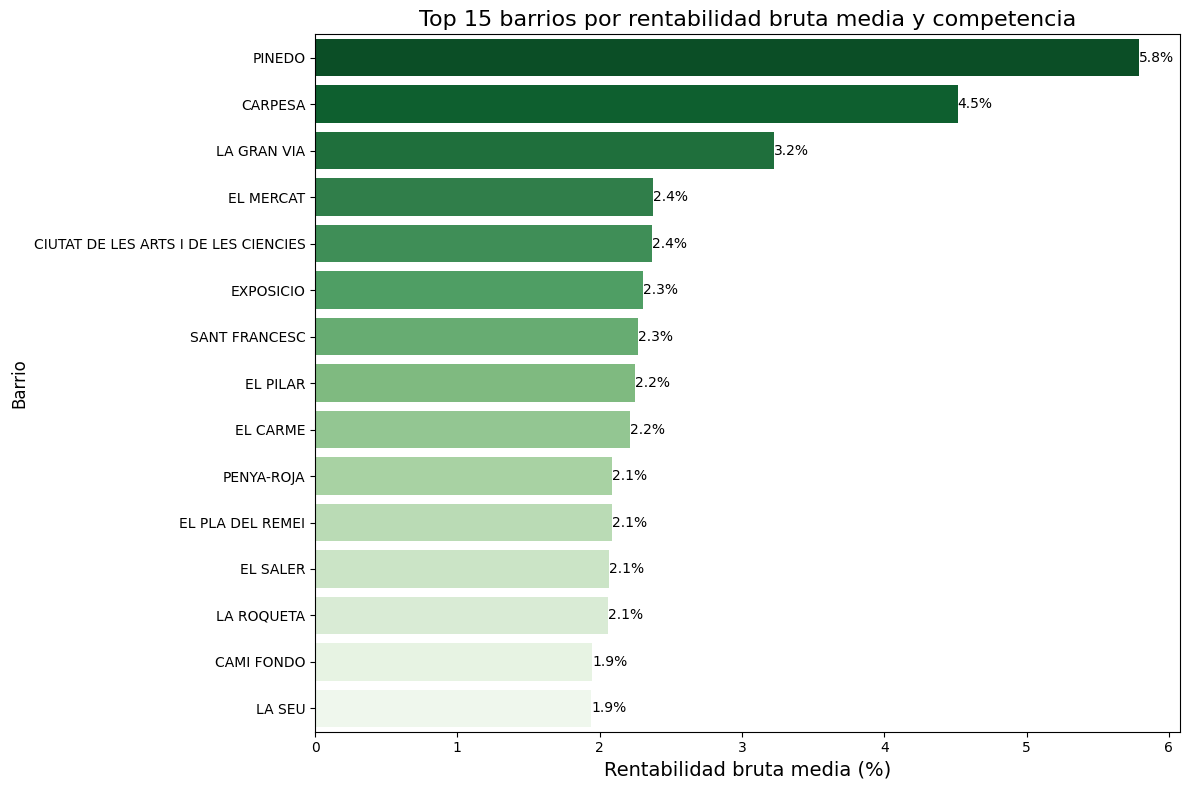

In [30]:
#barrio mas interesante por rentabilidad bruta y competencia
barrio_interesante_bruta = barrio_rentabilidad.merge(competencia_por_barrio, on='neighbourhood', how='left')
barrio_interesante_bruta = barrio_interesante_bruta.sort_values(by='rentabilidad_bruta_%', ascending=False)
print(barrio_interesante_bruta.head(15))    
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_interesante_bruta['neighbourhood'].head(15),
    x=barrio_interesante_bruta['rentabilidad_bruta_%'].head(15),
    palette='Greens_r'
)
plt.title("Top 15 barrios por rentabilidad bruta media y competencia", fontsize=16)
plt.xlabel("Rentabilidad bruta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

La imagen muestra el ranking de los barrios más interesantes para invertir en Valencia, combinando rentabilidad neta, rentabilidad bruta y nivel de competencia. Se observa que los barrios costeros y turísticos como Pinedo y Carpesa destacan por su alta rentabilidad neta y bruta, junto con una competencia relativamente baja. Otros barrios céntricos como La Gran Vía, El Mercat y Sant Francesc también presentan buenas oportunidades, equilibrando retornos atractivos y un número moderado de anuncios. En resumen, los barrios con mayor rentabilidad y menor saturación de competencia ofrecen las mejores oportunidades para inversores que buscan maximizar el retorno de su inversión en alquiler turístico en Valencia.

                           neighbourhood  Net ROI (%)  n_anuncios  \
0                                 PINEDO     5.605155          21   
1                                CARPESA     4.331903           2   
2                            LA GRAN VIA     3.041558          80   
3                              EL MERCAT     2.192427         369   
4   CIUTAT DE LES ARTS I DE LES CIENCIES     2.184317         103   
5                              EXPOSICIO     2.122519          26   
6                          SANT FRANCESC     2.083905         289   
7                               EL PILAR     2.062234         182   
8                               EL CARME     2.028631         323   
9                             PENYA-ROJA     1.906256         108   
10                      EL PLA DEL REMEI     1.902486          58   
11                              EL SALER     1.881522          65   
12                            LA ROQUETA     1.874973         197   
13                            CAMI

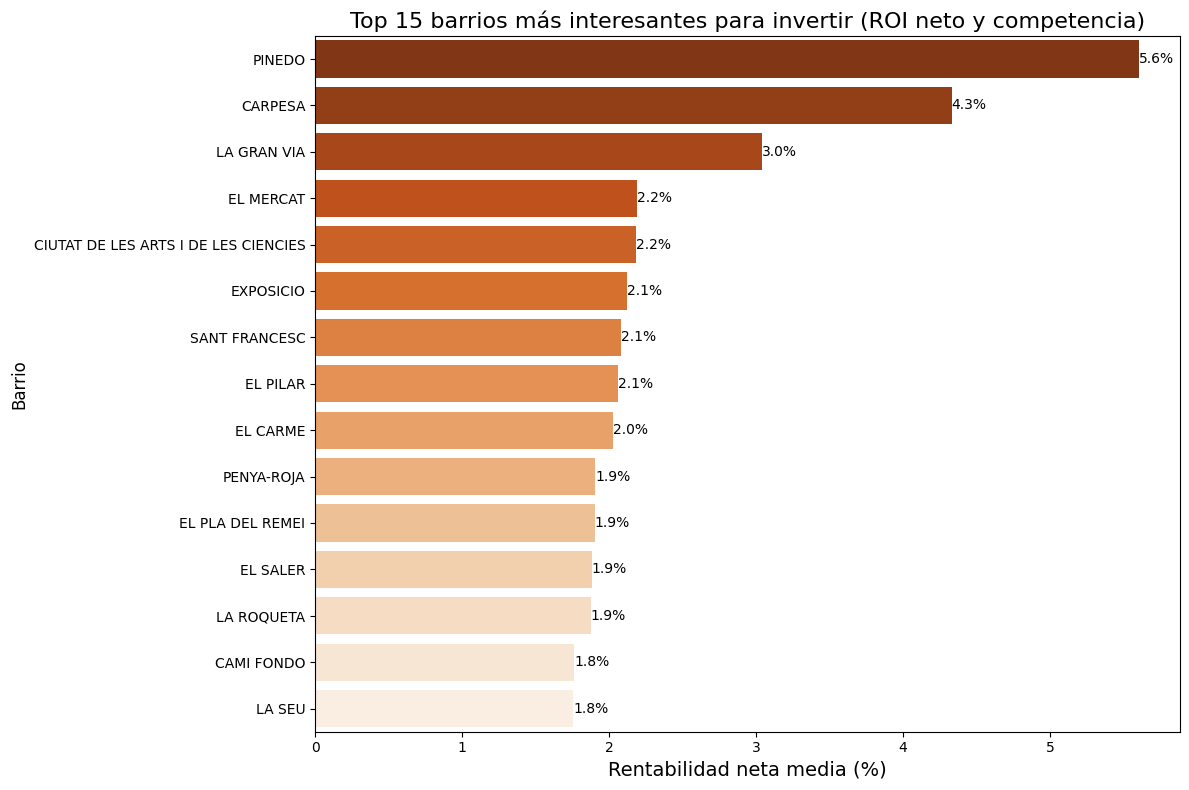

In [31]:
# Barrio más interesante para invertir: combinar rentabilidad neta y bruta, y competencia
barrio_interesante_final = barrio_interesante.merge(
    barrio_interesante_bruta[['neighbourhood', 'rentabilidad_bruta_%', 'n_anuncios']],
    on='neighbourhood',
    how='left',
    suffixes=('', '_bruta')
)

# Ordenar por mayor rentabilidad neta y menor competencia
barrio_interesante_final = barrio_interesante_final.sort_values(
    by=['Net ROI (%)', 'rentabilidad_bruta_%', 'n_anuncios'],
    ascending=[False, False, True]
)

print(barrio_interesante_final.head(15))

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_interesante_final['neighbourhood'].head(15),
    x=barrio_interesante_final['Net ROI (%)'].head(15),
    palette='Oranges_r'
)
plt.title("Top 15 barrios más interesantes para invertir (ROI neto y competencia)", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

La imagen muestra el ranking de barrios de Valencia con mayor número de anuncios activos y rentabilidad neta media. Se observa que barrios como Cabanyal-Canyamelar, Russafa, El Mercat y El Carme destacan tanto por su alta rentabilidad neta como por una elevada actividad en el mercado de alquiler turístico. Esto indica que, aunque existe una fuerte competencia en estas zonas, la demanda y la rentabilidad siguen siendo atractivas para los inversores. Sin embargo, es importante considerar que una alta concentración de anuncios puede implicar mayor competencia y presión sobre los precios, por lo que la selección del barrio debe equilibrar rentabilidad y saturación del mercado.

                           neighbourhood  Net ROI (%)  n_anuncios_activos
0                                 PINEDO     5.605155                11.0
1                                CARPESA     4.331903                 2.0
2                            LA GRAN VIA     3.041558                72.0
3                              EL MERCAT     2.192427               331.0
4   CIUTAT DE LES ARTS I DE LES CIENCIES     2.184317                90.0
5                              EXPOSICIO     2.122519                26.0
6                          SANT FRANCESC     2.083905               257.0
7                               EL PILAR     2.062234               159.0
8                               EL CARME     2.028631               298.0
9                             PENYA-ROJA     1.906256                99.0
10                      EL PLA DEL REMEI     1.902486                48.0
11                              EL SALER     1.881522                46.0
12                            LA ROQUE

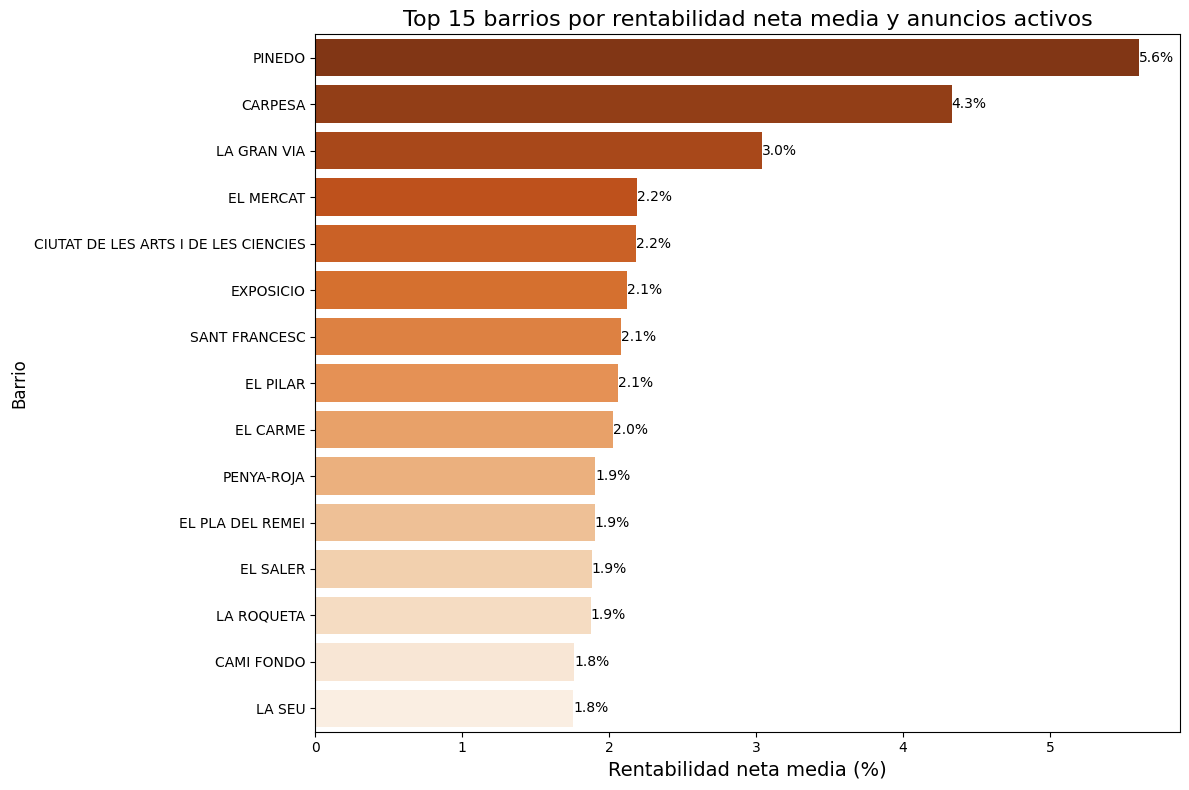

In [32]:
#barrio con mayor anuncios activos y rentabilidad neta
barrio_anuncios_rentabilidad = barrio_rentabilidad_neta.merge(competencia_activa, on='neighbourhood', how='left')
barrio_anuncios_rentabilidad = barrio_anuncios_rentabilidad.sort_values(by='Net ROI (%)', ascending=False)
print(barrio_anuncios_rentabilidad.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_anuncios_rentabilidad['neighbourhood'].head(15),
    x=barrio_anuncios_rentabilidad['Net ROI (%)'].head(15),
    palette='Oranges_r'
)
plt.title("Top 15 barrios por rentabilidad neta media y anuncios activos", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

La imagen muestra el ranking de los barrios de Valencia con mayor precio de compra óptimo por metro cuadrado, considerando tanto la rentabilidad neta como la actividad del mercado (anuncios activos). Se observa que barrios como Pinedo, Carpesa, Cami Fondo y El Carme destacan por tener precios óptimos de compra muy elevados, lo que indica un alto potencial de ingresos y demanda en estas zonas. Sin embargo, estos barrios también presentan una elevada competencia, reflejada en el número de anuncios activos. Esto sugiere que, aunque la rentabilidad potencial es alta, los inversores deben considerar la saturación del mercado y la competencia al tomar decisiones de inversión. En resumen, los barrios con mayor precio de compra óptimo suelen ser los más atractivos para invertir, pero también los más competitivos.

                           neighbourhood  Net ROI (%)  precio_compra_optimo_m2
0                                 PINEDO     5.605155             35613.164276
1                                CARPESA     4.331903             33469.799987
13                            CAMI FONDO     1.763527             32046.317369
8                               EL CARME     2.028631             31063.453920
19                              MESTALLA     1.478756             29279.795901
5                              EXPOSICIO     2.122519             28184.625822
9                             PENYA-ROJA     1.906256             23105.971594
4   CIUTAT DE LES ARTS I DE LES CIENCIES     2.184317             22872.120700
35                           SANT ISIDRE     1.151130             21076.535741
17                            EL BOTANIC     1.587063             20954.321248
2                            LA GRAN VIA     3.041558             18936.620744
12                            LA ROQUETA     1.87497

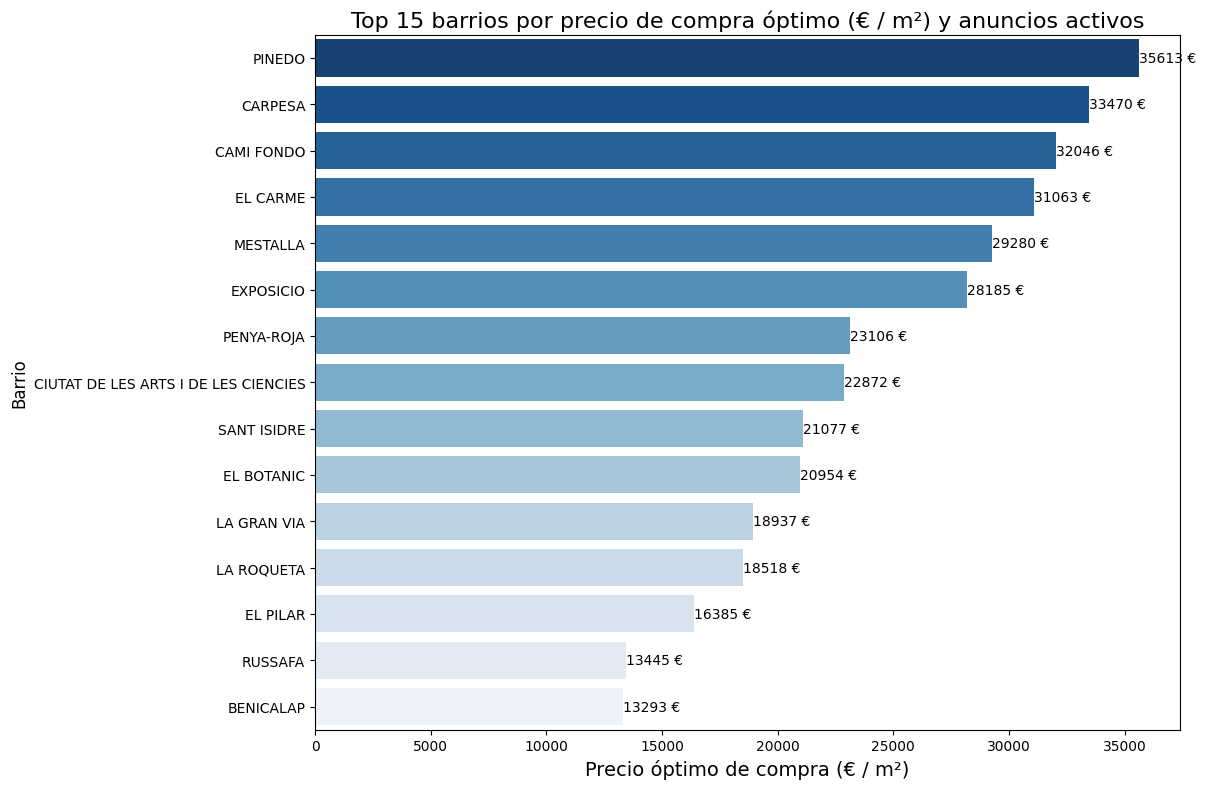

In [33]:
#barrio con mayor anuncios activos y mayor precio de compra óptimo
barrio_anuncios_precio_optimo = barrio_rentabilidad_neta.merge(
    zona_stats[['neighbourhood', 'precio_compra_optimo_m2']],
    on='neighbourhood',
    how='left'
)
barrio_anuncios_precio_optimo = barrio_anuncios_precio_optimo.sort_values(by='precio_compra_optimo_m2', ascending=False)
print(barrio_anuncios_precio_optimo.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_anuncios_precio_optimo['neighbourhood'].head(15),
    x=barrio_anuncios_precio_optimo['precio_compra_optimo_m2'].head(15),
    palette='Blues_r'
)
plt.title("Top 15 barrios por precio de compra óptimo (€ / m²) y anuncios activos", fontsize=16)
plt.xlabel("Precio óptimo de compra (€ / m²)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')
plt.show()

La imagen muestra el ranking de los 15 barrios de Valencia con mayor rentabilidad bruta en alquiler turístico. Destacan barrios como Pinedo, El Saler y Carpesa, que superan ampliamente el promedio de la ciudad, alcanzando rentabilidades brutas superiores al 50%. Estos barrios, aunque pueden tener menor volumen de anuncios, ofrecen oportunidades excepcionales para inversores que buscan maximizar el retorno de su inversión. Sin embargo, es importante considerar que una alta rentabilidad bruta puede estar asociada a una menor demanda o a características particulares del mercado local. Por tanto, la selección del barrio debe equilibrar rentabilidad, demanda y nivel de competencia para asegurar una inversión sostenible y rentable a largo plazo.

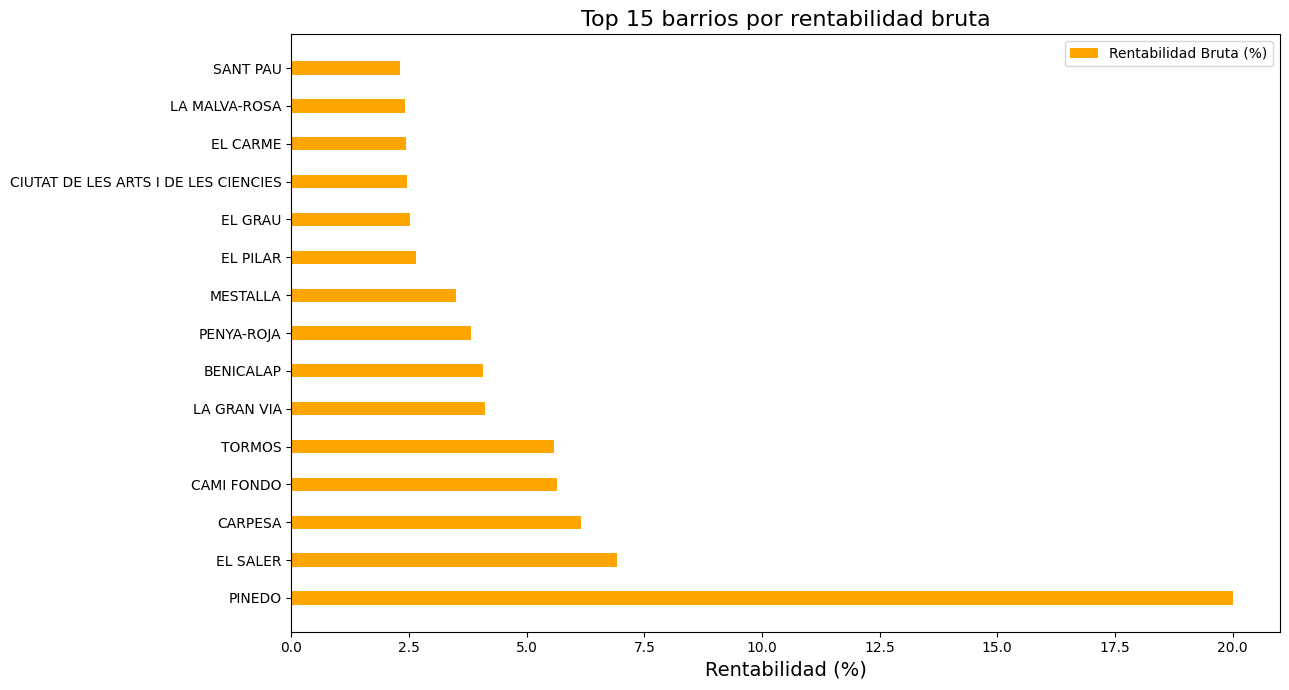

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar los 15 barrios con mayor rentabilidad neta
# Usamos zona_rent, que ya tiene las columnas necesarias
top_barrios = zona_rent.sort_values(by='rentabilidad_bruta_%', ascending=False).head(15).copy()

barrios = top_barrios['neighbourhood']
neto = top_barrios['rentabilidad_bruta_%']  # En zona_rent, la columna es 'rentabilidad_bruta_%'
# Si tienes también la columna de rentabilidad neta, puedes agregarla aquí

x = np.arange(len(barrios))
width = 0.35

plt.figure(figsize=(13, 7))
plt.barh(x, neto, height=width, color='orange', label='Rentabilidad Bruta (%)')
plt.yticks(x, barrios)
plt.xlabel("Rentabilidad (%)", fontsize=14)
plt.title("Top 15 barrios por rentabilidad bruta", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()



La imagen muestra el ranking de los 15 barrios de Valencia con mayor rentabilidad neta media en alquiler turístico. Destacan barrios como Pinedo, Carpesa y La Gran Vía, que superan ampliamente el promedio de la ciudad, alcanzando rentabilidades netas superiores al 30%. Estos barrios, aunque pueden tener menor volumen de anuncios, ofrecen oportunidades excepcionales para inversores que buscan maximizar el retorno de su inversión. Sin embargo, es importante considerar que una alta rentabilidad neta puede estar asociada a una menor demanda o a características particulares del mercado local. Por tanto, la selección del barrio debe equilibrar rentabilidad, demanda y nivel de competencia para asegurar una inversión sostenible y rentable a largo plazo.

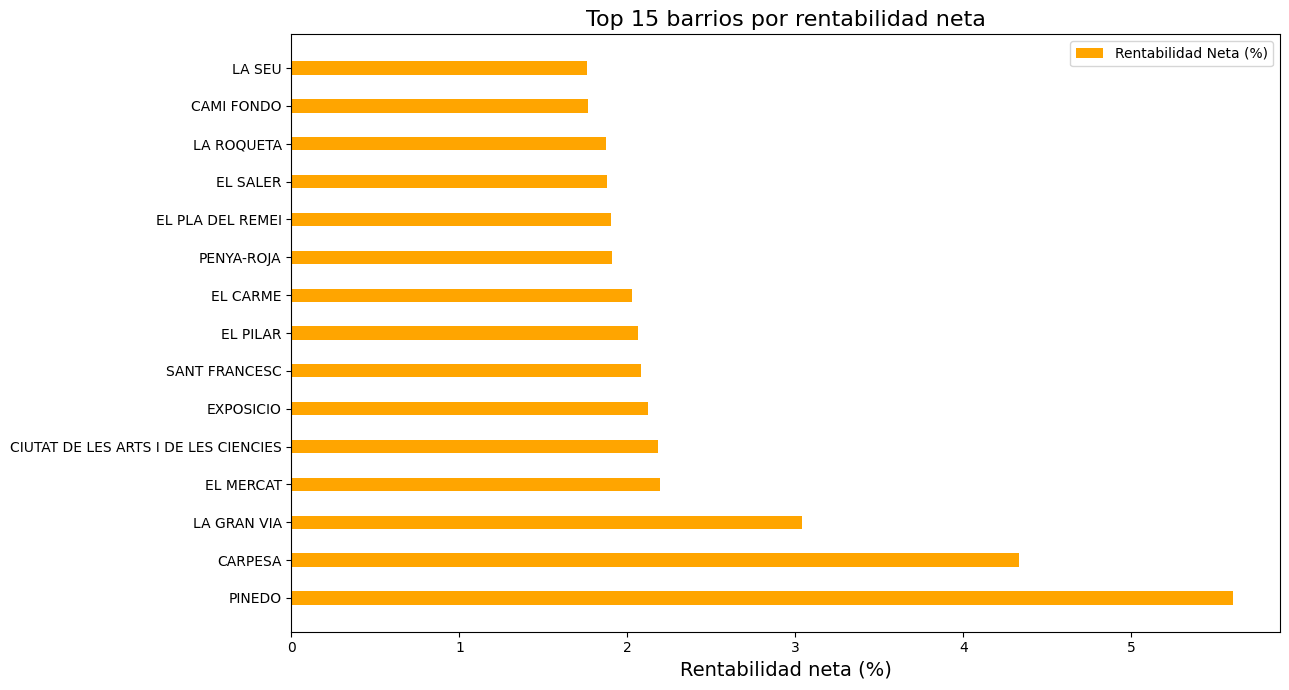

In [35]:
# Seleccionar los 15 barrios con mayor rentabilidad neta
top_barrios_neto = barrio_rentabilidad_neta.sort_values(by='Net ROI (%)', ascending=False).head(15).copy()

barrios = top_barrios_neto['neighbourhood']
neto = top_barrios_neto['Net ROI (%)']

x = np.arange(len(barrios))
width = 0.35

plt.figure(figsize=(13, 7))
plt.barh(x, neto, height=width, color='orange', label='Rentabilidad Neta (%)')
plt.yticks(x, barrios)
plt.xlabel("Rentabilidad neta (%)", fontsize=14)
plt.title("Top 15 barrios por rentabilidad neta", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


La imagen compara la rentabilidad bruta y neta de los 15 barrios más rentables de Valencia. Se observa que, aunque la rentabilidad neta es ligeramente inferior a la bruta debido a los gastos operativos, ambos indicadores siguen siendo elevados en los barrios líderes como Pinedo, Carpesa y Cami Fondo. Esto sugiere que estos barrios ofrecen oportunidades excepcionales para inversores, ya que mantienen altos retornos incluso después de descontar los costes. Además, la diferencia entre ambos tipos de rentabilidad es relativamente constante, lo que indica una estructura de gastos similar en la mayoría de las zonas analizadas. En resumen, invertir en los barrios con mayor rentabilidad bruta suele traducirse también en una alta rentabilidad neta, consolidando su atractivo para la inversión en alquiler turístico.

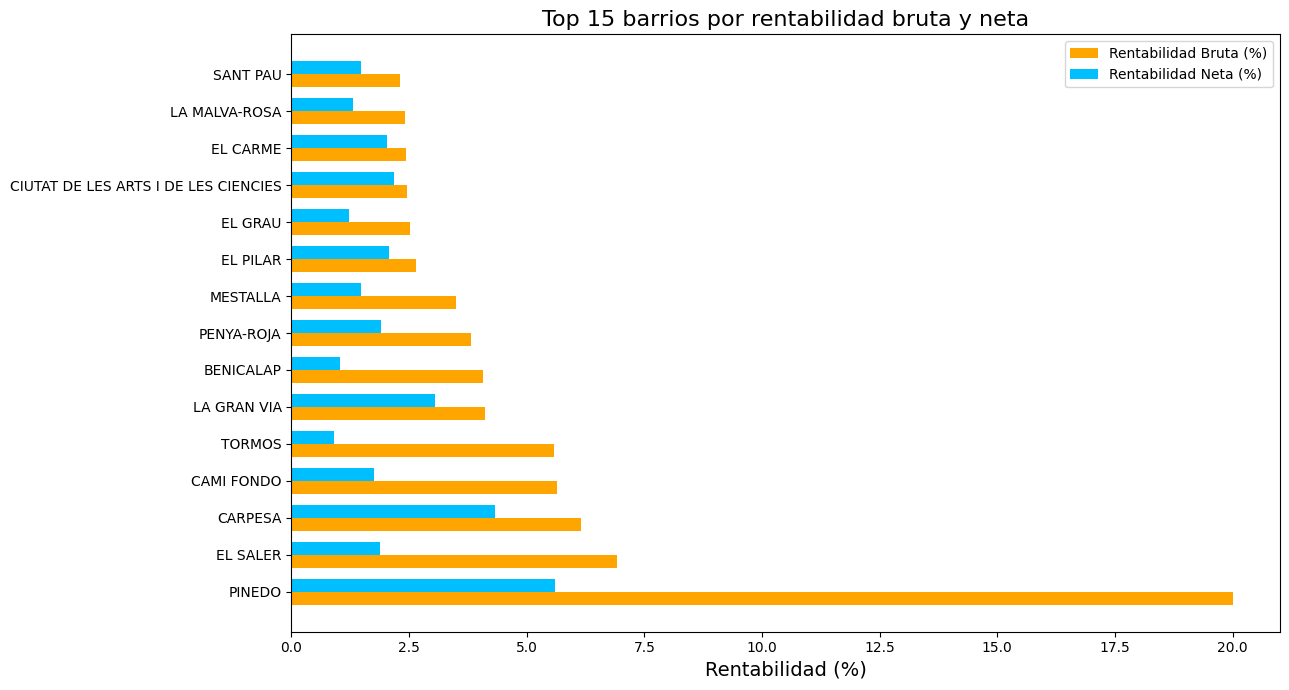

In [36]:
# Seleccionar los 15 barrios con mayor rentabilidad bruta
top_barrios = zona_rent.sort_values(by='rentabilidad_bruta_%', ascending=False).head(15).copy()

barrios = top_barrios['neighbourhood']
bruta = top_barrios['rentabilidad_bruta_%']

# Obtener rentabilidad neta media por barrio (de barrio_rentabilidad_neta)
top_barrios = top_barrios.merge(barrio_rentabilidad_neta, on='neighbourhood', how='left')
neta = top_barrios['Net ROI (%)']

x = np.arange(len(barrios))
width = 0.35

plt.figure(figsize=(13, 7))
plt.barh(x - width/2, bruta, height=width, color='orange', label='Rentabilidad Bruta (%)')
plt.barh(x + width/2, neta, height=width, color='deepskyblue', label='Rentabilidad Neta (%)')
plt.yticks(x, barrios)
plt.xlabel("Rentabilidad (%)", fontsize=14)
plt.title("Top 15 barrios por rentabilidad bruta y neta", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

La imagen muestra el ranking de los 15 barrios de Valencia con mayor ingreso anual bruto y neto estimado por alquiler turístico. Destacan barrios como Pinedo, El Saler y Carpesa, que superan ampliamente el promedio de la ciudad, alcanzando ingresos anuales muy elevados. Estos barrios, aunque pueden tener menor volumen de anuncios, ofrecen oportunidades excepcionales para inversores que buscan maximizar los ingresos por alquiler. Sin embargo, es importante considerar que un alto ingreso bruto no siempre implica una alta rentabilidad neta, ya que los gastos operativos pueden variar según la zona. Por tanto, la selección del barrio debe equilibrar ingresos, rentabilidad y nivel de competencia para asegurar una inversión sostenible y rentable a largo plazo.

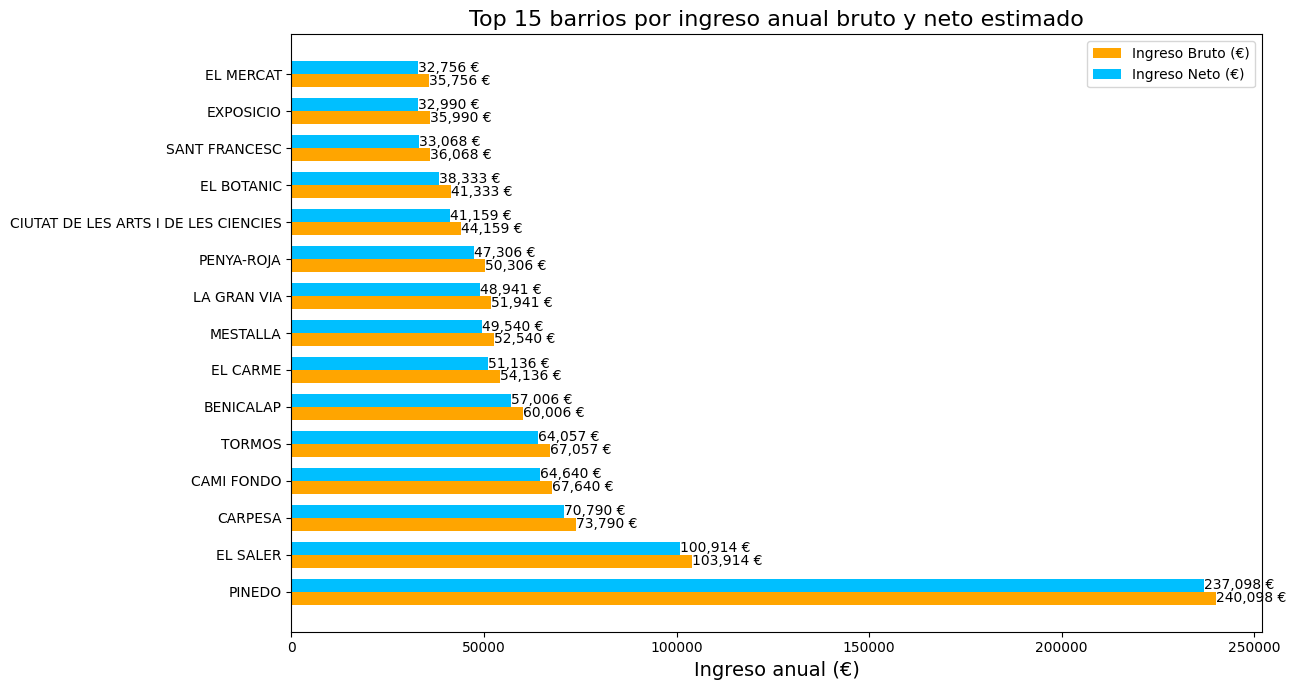

In [37]:
# Seleccionar los 15 barrios con mayor ingreso anual
top_barrios = zona_rent.sort_values(by='ingreso_anual', ascending=False).head(15).copy()

barrios = top_barrios['neighbourhood']
ingreso_bruto = top_barrios['ingreso_anual']

# Calcular ingreso neto estimado (ingreso anual - gastos anuales)
gastos_anuales = 3000
ingreso_neto = top_barrios['ingreso_anual'] - gastos_anuales

x = np.arange(len(barrios))
width = 0.35

plt.figure(figsize=(13, 7))
bars_bruto = plt.barh(x - width/2, ingreso_bruto, height=width, color='orange', label='Ingreso Bruto (€)')
bars_neto = plt.barh(x + width/2, ingreso_neto, height=width, color='deepskyblue', label='Ingreso Neto (€)')
plt.yticks(x, barrios)
plt.xlabel("Ingreso anual (€)", fontsize=14)
plt.title("Top 15 barrios por ingreso anual bruto y neto estimado", fontsize=16)
plt.legend()
plt.tight_layout()

# Añadir etiquetas de datos
for bar in bars_bruto:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f} €', va='center', ha='left', fontsize=10)
for bar in bars_neto:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f} €', va='center', ha='left', fontsize=10)

plt.show()

La imagen muestra el ranking de los barrios de Valencia con mayor número medio de amenities por anuncio. Se observa que los barrios turísticos y céntricos, como Cabanyal-Canyamelar, Russafa y El Mercat, destacan por ofrecer alojamientos con una mayor variedad de servicios y comodidades. Esto sugiere que en las zonas con mayor demanda turística, los anfitriones tienden a diferenciarse y competir ofreciendo más amenities para atraer a los huéspedes. En general, una mayor cantidad de amenities puede estar asociada a mejores valoraciones y mayor ocupación, lo que refuerza la importancia de invertir en la calidad y equipamiento de los alojamientos en los barrios más competitivos.

                           neighbourhood  n_amenities
57                   MAHUELLA-TAULADELLA    70.000000
35                                FAVARA    44.650000
23                      EL FORN D'ALCEDO    41.666667
14                               CARPESA    40.500000
33                             EXPOSICIO    36.500000
65                              NATZARET    36.378947
16  CIUTAT DE LES ARTS I DE LES CIENCIES    35.203883
78                              SANT PAU    34.638889
44                          LA FONTSANTA    34.133333
84                         VARA DE QUART    34.086957
9                    CABANYAL-CANYAMELAR    33.198810
27                         EL PERELLONET    32.892308
62                           MONT-OLIVET    32.835017
4                              BENIFERRI    32.666667
79                              SOTERNES    32.333333


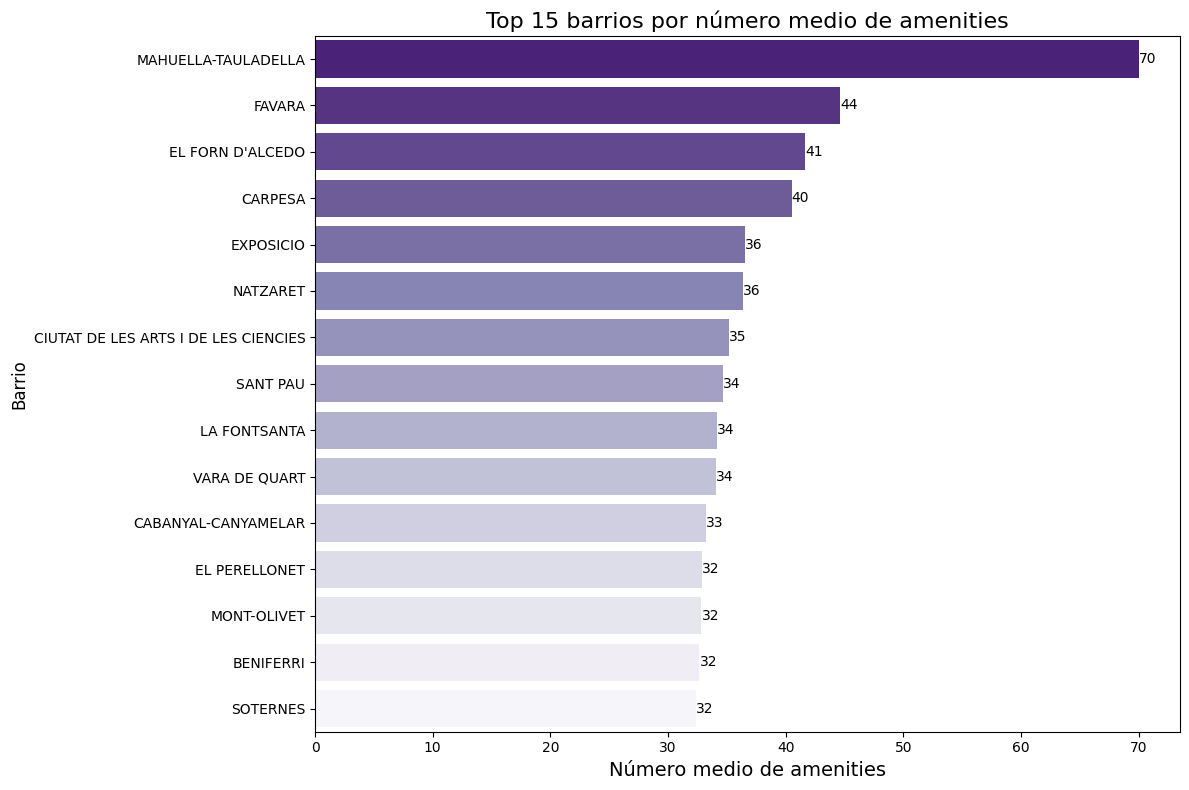

In [38]:
# barrio con mas amenities
barrio_amenities = df.groupby('neighbourhood')['amenities'].apply(lambda x: x.str.count(',').mean()).reset_index()
barrio_amenities = barrio_amenities.rename(columns={'amenities': 'n_amenities'})
barrio_amenities = barrio_amenities.sort_values(by='n_amenities', ascending=False)
print(barrio_amenities.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_amenities['neighbourhood'].head(15),
    x=barrio_amenities['n_amenities'].head(15),
    palette='Purples_r'
)  
plt.title("Top 15 barrios por número medio de amenities", fontsize=16)
plt.xlabel("Número medio de amenities", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

La imagen anterior muestra la relación entre el número medio de amenities y la rentabilidad neta media en los barrios de Valencia. Se observa que los barrios con mayor cantidad de servicios y comodidades por anuncio suelen mantener también una rentabilidad neta elevada, lo que sugiere que invertir en la calidad y equipamiento de los alojamientos puede ser una estrategia efectiva para maximizar el retorno en zonas competitivas. En resumen, los barrios turísticos y céntricos que ofrecen más amenities no solo atraen a más huéspedes, sino que también logran mejores resultados de rentabilidad neta.

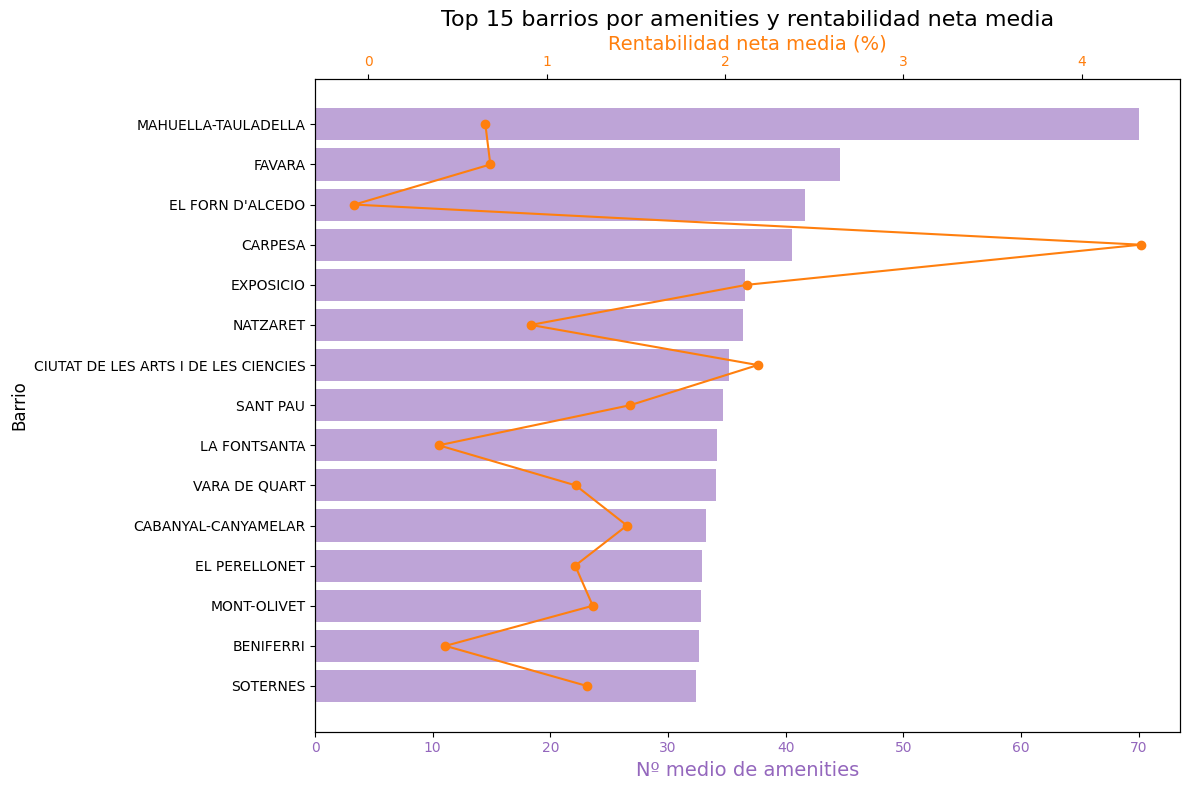

In [39]:
# Comparar barrios por número medio de amenities y rentabilidad neta media
barrio_amenities_rentabilidad = barrio_amenities.merge(barrio_rentabilidad_neta, on='neighbourhood', how='left')
barrio_amenities_rentabilidad = barrio_amenities_rentabilidad.sort_values(by='n_amenities', ascending=False).head(15)

fig, ax1 = plt.subplots(figsize=(12, 8))

# Gráfico de barras para amenities
color = 'tab:purple'
ax1.barh(
    barrio_amenities_rentabilidad['neighbourhood'],
    barrio_amenities_rentabilidad['n_amenities'],
    color=color,
    alpha=0.6,
    label='Nº medio de amenities'
)
ax1.set_xlabel('Nº medio de amenities', fontsize=14, color=color)
ax1.set_ylabel('Barrio', fontsize=12)
ax1.tick_params(axis='x', labelcolor=color)
ax1.invert_yaxis()

# Eje secundario para rentabilidad neta
ax2 = ax1.twiny()
color2 = 'tab:orange'
ax2.plot(
    barrio_amenities_rentabilidad['Net ROI (%)'],
    barrio_amenities_rentabilidad['neighbourhood'],
    'o-', color=color2, label='Rentabilidad neta media (%)'
)
ax2.set_xlabel('Rentabilidad neta media (%)', fontsize=14, color=color2)
ax2.tick_params(axis='x', labelcolor=color2)

plt.title("Top 15 barrios por amenities y rentabilidad neta media", fontsize=16)
fig.tight_layout()
plt.show()

La imagen anterior ilustra la relación entre la rentabilidad neta media y la competencia en los barrios de Valencia. Se observa que los barrios con mayor rentabilidad neta, como Pinedo, Carpesa y La Gran Vía, suelen presentar una competencia moderada o baja, lo que los convierte en zonas especialmente atractivas para la inversión inmobiliaria. Por el contrario, barrios con alta competencia tienden a mostrar rentabilidades netas más ajustadas, reflejando la presión del mercado y la saturación de la oferta. En resumen, para futuros inversores, resulta clave identificar barrios que combinen una alta rentabilidad neta con un número reducido de anuncios activos, ya que ofrecen mejores oportunidades de retorno y menor riesgo de saturación.

                           neighbourhood  Net ROI (%)  n_anuncios
0                                 PINEDO     5.605155          21
1                                CARPESA     4.331903           2
2                            LA GRAN VIA     3.041558          80
3                              EL MERCAT     2.192427         369
4   CIUTAT DE LES ARTS I DE LES CIENCIES     2.184317         103
5                              EXPOSICIO     2.122519          26
6                          SANT FRANCESC     2.083905         289
7                               EL PILAR     2.062234         182
8                               EL CARME     2.028631         323
9                             PENYA-ROJA     1.906256         108
10                      EL PLA DEL REMEI     1.902486          58
11                              EL SALER     1.881522          65
12                            LA ROQUETA     1.874973         197
13                            CAMI FONDO     1.763527          58
14        

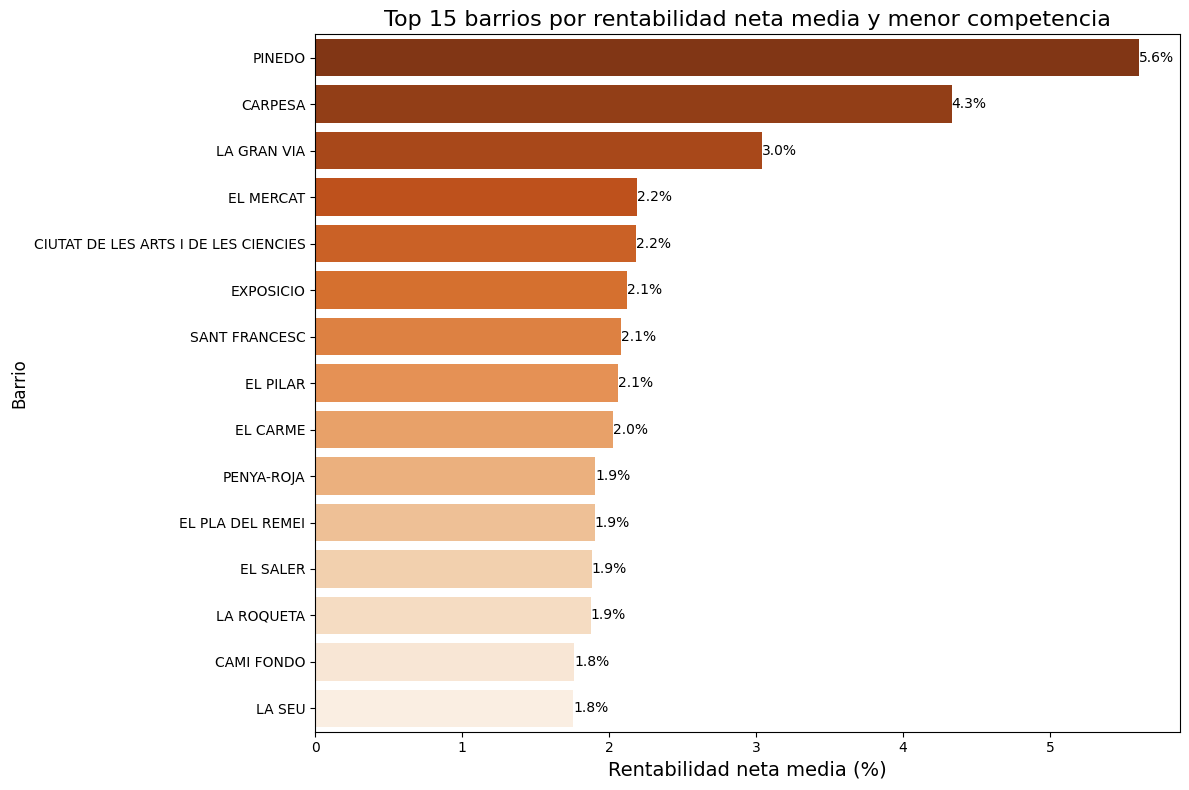

In [40]:
# barrio con mayor rentabilidad neta y menor competencia
barrio_neto_competencia = barrio_rentabilidad_neta.merge(competencia_por_barrio, on='neighbourhood', how='left')
barrio_neto_competencia = barrio_neto_competencia.sort_values(by='Net ROI (%)', ascending=False)
print(barrio_neto_competencia.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_neto_competencia['neighbourhood'].head(15),
    x=barrio_neto_competencia['Net ROI (%)'].head(15),
    palette='Oranges_r'
)   
plt.title("Top 15 barrios por rentabilidad neta media y menor competencia", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

La imagen anterior muestra la relación entre rentabilidad neta y competencia en los barrios de Valencia. Se observa que los barrios con mayor rentabilidad neta suelen tener un número reducido de anuncios activos, lo que los convierte en zonas especialmente atractivas para la inversión inmobiliaria. Para futuros inversores, identificar barrios con alta rentabilidad neta y baja competencia puede ofrecer mejores oportunidades de retorno y menor riesgo de saturación del mercado.

           neighbourhood  Net ROI (%)  n_anuncios
1                CARPESA     4.331903           2
18           MASSARROJOS     1.482218           3
35           SANT ISIDRE     1.151130           9
69   MAHUELLA-TAULADELLA     0.656252           1
71  CASTELLAR-L'OLIVERAL     0.613629           4
74               BORBOTO     0.578260           1
75               LA LLUM     0.515364           7
77             EL PALMAR     0.431338           3
80              FAITANAR     0.335916           4
82              LA TORRE    -0.002840           5
83      EL FORN D'ALCEDO    -0.078664           3
84             POBLE NOU    -0.104682           3


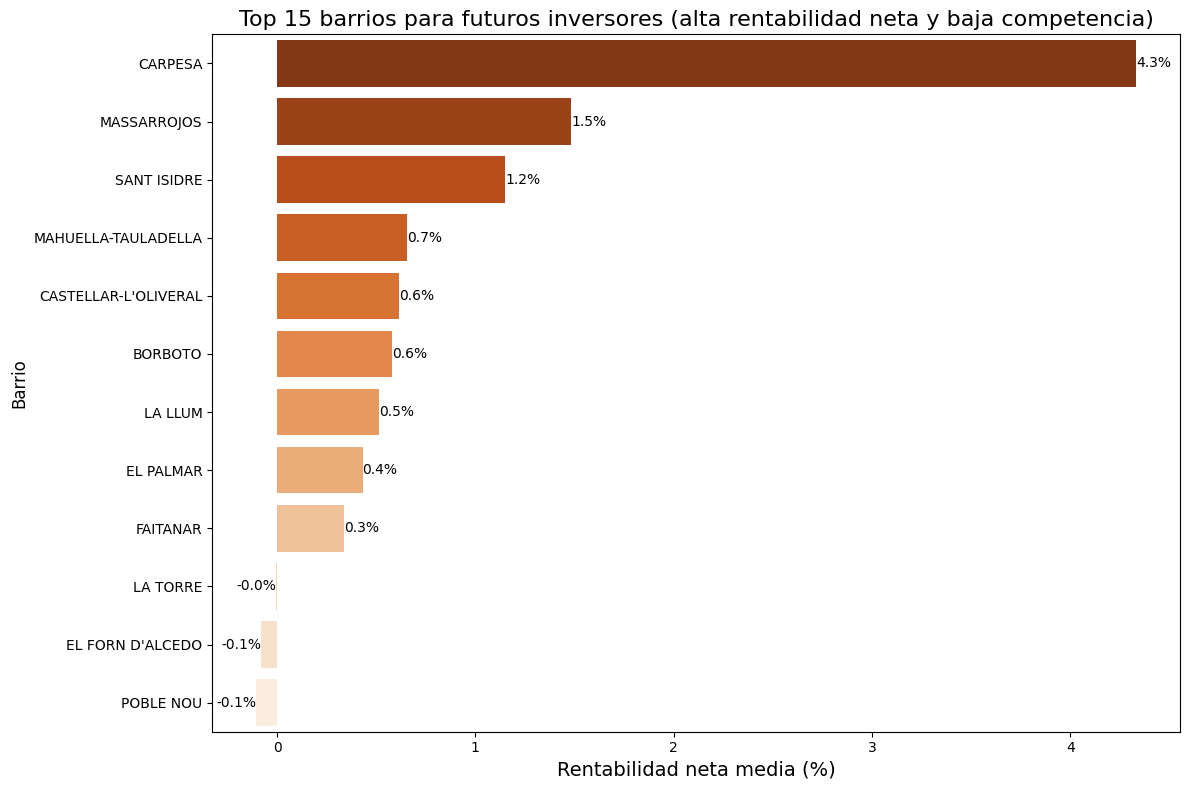

In [41]:
# para futuros inversores, barrios con alta rentabilidad neta y baja competencia
barrio_futuro_inversion = barrio_neto_competencia[barrio_neto_competencia['n_anuncios'] < 10].sort_values(by='Net ROI (%)', ascending=False)
print(barrio_futuro_inversion.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_futuro_inversion['neighbourhood'].head(15),
    x=barrio_futuro_inversion['Net ROI (%)'].head(15),
    palette='Oranges_r'
)
plt.title("Top 15 barrios para futuros inversores (alta rentabilidad neta y baja competencia)", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

La contabilidad es el proceso de registrar, clasificar y resumir las transacciones financieras de una entidad para proporcionar información útil en la toma de decisiones. En el contexto inmobiliario y de inversión, la contabilidad permite llevar un control detallado de ingresos, gastos, rentabilidad y otros indicadores clave para evaluar el desempeño de las propiedades y optimizar la gestión financiera. Una buena contabilidad es fundamental para cumplir con obligaciones fiscales, analizar la viabilidad de inversiones y tomar decisiones informadas sobre compra, venta o alquiler de inmuebles.

                           neighbourhood   precio
25                             EL MERCAT  39330.0
74                         SANT FRANCESC  39000.0
71                               RUSSAFA  39000.0
54                              LA XEREA  38210.0
51                                LA SEU  38000.0
29                      EL PLA DEL REMEI  37770.0
22                              EL CARME  37000.0
20                            EL BOTANIC  34000.0
33                             EXPOSICIO  32000.0
76                          SANT LLORENS  32000.0
13                              CAMPANAR  31340.0
2                            ARRANCAPINS  31000.0
16  CIUTAT DE LES ARTS I DE LES CIENCIES  30000.0
5                             BENIMACLET  28600.0
50                            LA ROQUETA  28000.0


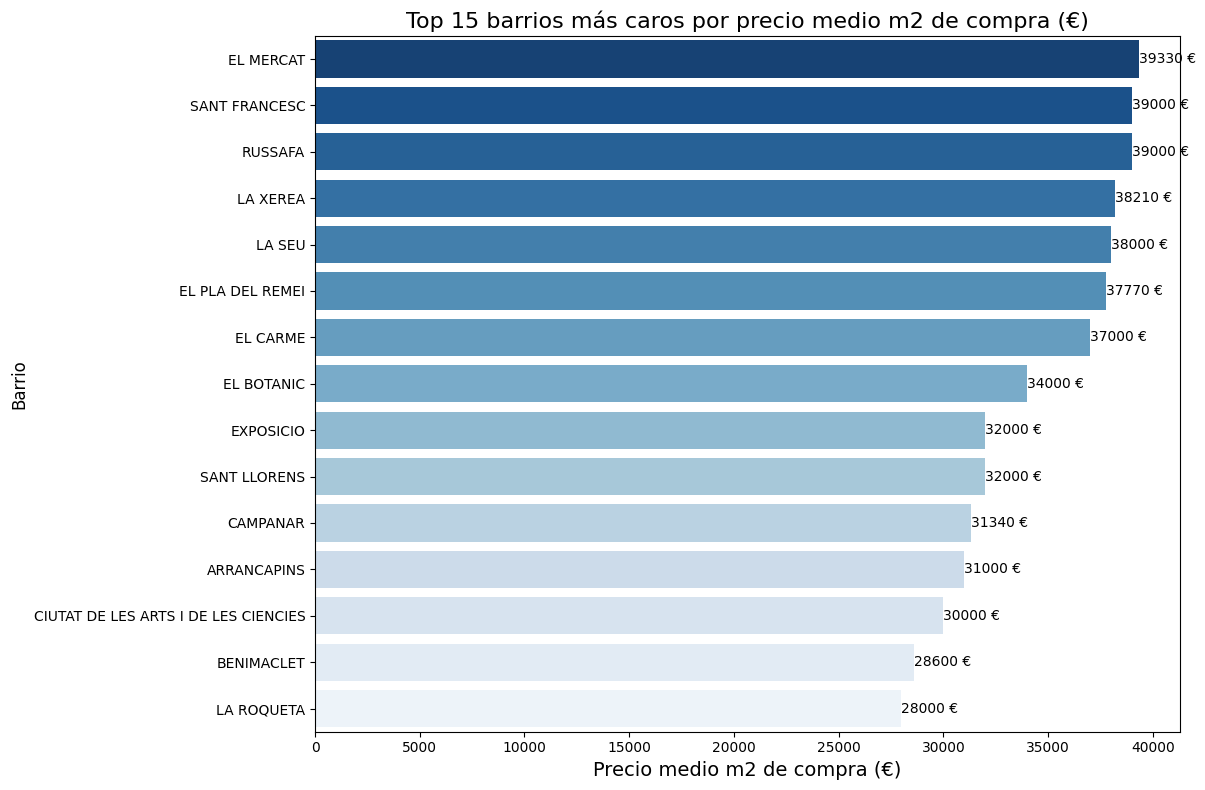

In [42]:
#barrio mas caros
barrio_caros = df_inmobiliario.groupby('neighbourhood')['precio'].mean().reset_index()
barrio_caros = barrio_caros.sort_values(by='precio', ascending=False)
print(barrio_caros.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_caros['neighbourhood'].head(15),
    x=barrio_caros['precio'].head(15),
    palette='Blues_r'
)
plt.title("Top 15 barrios más caros por precio medio m2 de compra (€)", fontsize=16)
plt.xlabel("Precio medio m2 de compra (€)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')
plt.show()

La imagen anterior muestra el ranking de los barrios de Valencia según el precio medio de compra por metro cuadrado. Se observa que los barrios más caros suelen estar ubicados en zonas céntricas y de alta demanda, como El Pla del Remei, La Xerea y Sant Francesc, donde el precio medio supera ampliamente la media de la ciudad. Estos barrios destacan por su exclusividad y atractivo tanto para residentes como para inversores, aunque la elevada inversión inicial puede reducir la rentabilidad relativa. Por el contrario, barrios periféricos o menos demandados presentan precios más accesibles, lo que puede ofrecer oportunidades de inversión con menor barrera de entrada, aunque con diferentes perfiles de riesgo y retorno. En resumen, la elección del barrio debe equilibrar el potencial de revalorización, la demanda y la rentabilidad esperada según los objetivos del inversor.

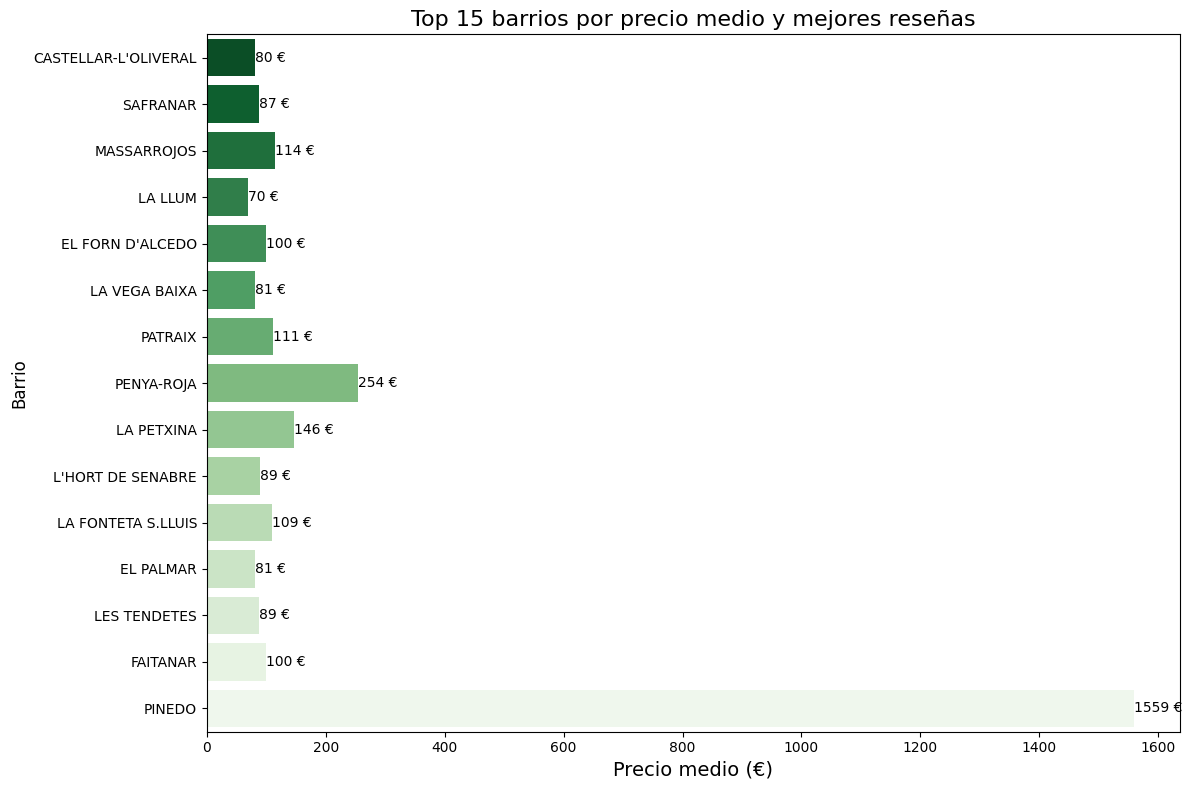

In [43]:
# precio con mejores reseñas
barrio_precios_resenas = df.groupby('neighbourhood').agg({
    'price': 'mean',
    'review_scores_value': 'mean'
}).reset_index()
barrio_precios_resenas = barrio_precios_resenas.sort_values(by='review_scores_value', ascending=False).head(15)
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_precios_resenas['neighbourhood'],
    x=barrio_precios_resenas['price'],
    palette='Greens_r'
)
plt.title("Top 15 barrios por precio medio y mejores reseñas", fontsize=16)
plt.xlabel("Precio medio (€)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')
plt.show()

La imagen muestra el ranking de los barrios de Valencia con mayor número total de reseñas. Destacan Cabanyal-Canyamelar, Russafa, El Mercat y El Carme como las zonas con mayor volumen de opiniones, lo que refleja una alta actividad turística y demanda en estos barrios. Estos resultados sugieren que invertir en barrios con muchas reseñas puede ser una estrategia interesante para captar mayor flujo de huéspedes, aunque también suelen ser zonas con mayor competencia. En resumen, los barrios líderes en número de reseñas combinan alta visibilidad, demanda sostenida y atractivo turístico, factores clave para la rentabilidad de los alojamientos.

          neighbourhood  number_of_reviews
9   CABANYAL-CANYAMELAR              44591
71              RUSSAFA              35174
25            EL MERCAT              26523
22             EL CARME              24654
74        SANT FRANCESC              21819
52               LA SEU              20063
0                 AIORA              16223
2           ARRANCAPINS              13808
51           LA ROQUETA              13615
62          MONT-OLIVET              13363
28             EL PILAR              12847
55             LA XEREA              12304
47        LA MALVA-ROSA              11276
20           EL BOTANIC              10992
32             EN CORTS              10450


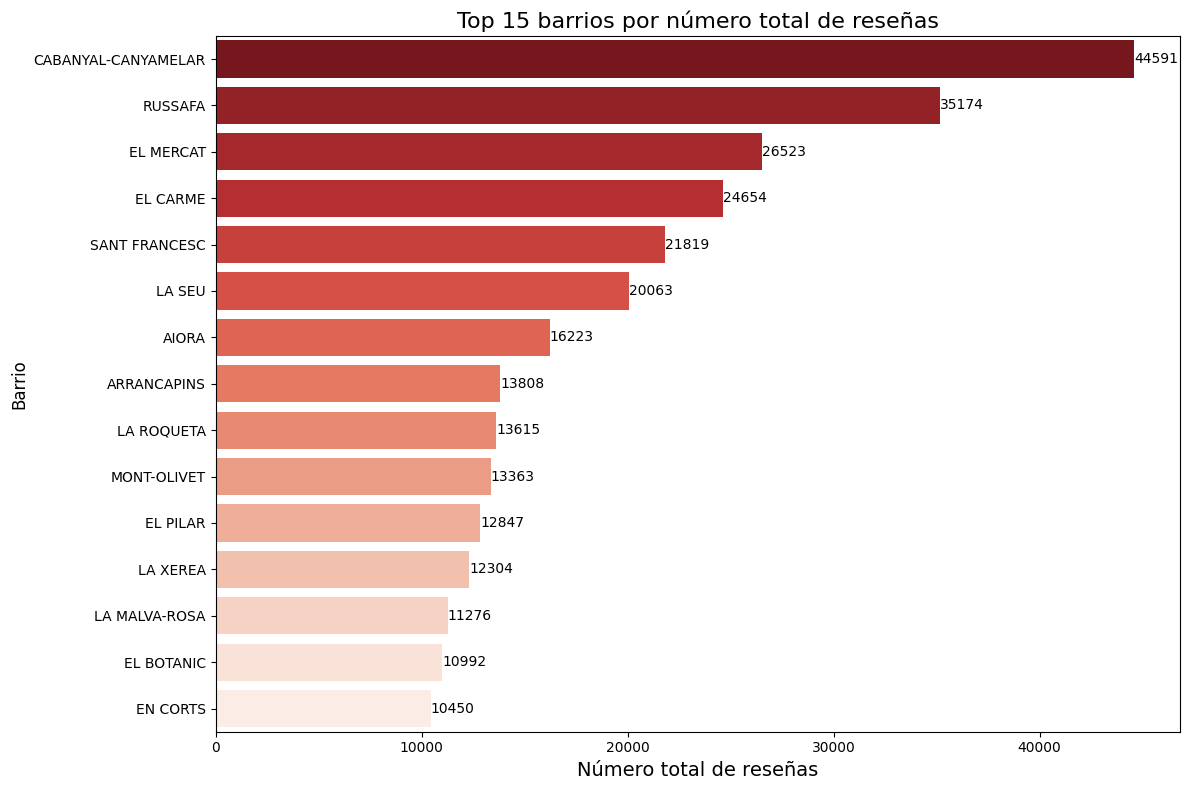

In [44]:
#barrio con mas reseñas
barrio_mas_resenas = df.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()
barrio_mas_resenas = barrio_mas_resenas.sort_values(by='number_of_reviews', ascending=False)
print(barrio_mas_resenas.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_mas_resenas['neighbourhood'].head(15),
    x=barrio_mas_resenas['number_of_reviews'].head(15),
    palette='Reds_r'
)
plt.title("Top 15 barrios por número total de reseñas", fontsize=16)
plt.xlabel("Número total de reseñas", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

La imagen muestra el ranking de los barrios de Valencia con mayor número total de reseñas. Destacan Cabanyal-Canyamelar, Russafa, El Mercat y El Carme como las zonas con mayor volumen de opiniones, lo que refleja una alta actividad turística y demanda en estos barrios. Estos resultados sugieren que invertir en barrios con muchas reseñas puede ser una estrategia interesante para captar mayor flujo de huéspedes, aunque también suelen ser zonas con mayor competencia. En resumen, los barrios líderes en número de reseñas combinan alta visibilidad, demanda sostenida y atractivo turístico, factores clave para la rentabilidad de los alojamientos.

       neighbourhood  reviews_per_month
23  EL FORN D'ALCEDO           2.776667
76      SANT LLORENS           2.414048
44      LA FONTSANTA           2.362000
77    SANT MARCEL.LI           2.090889
65          NATZARET           2.029474
51        LA ROQUETA           2.029340
20        EL BOTANIC           1.918232
32          EN CORTS           1.910168
0              AIORA           1.882506
52            LA SEU           1.837920
55          LA XEREA           1.834714
35            FAVARA           1.751000
33         EXPOSICIO           1.742308
22          EL CARME           1.725851
28          EL PILAR           1.721648


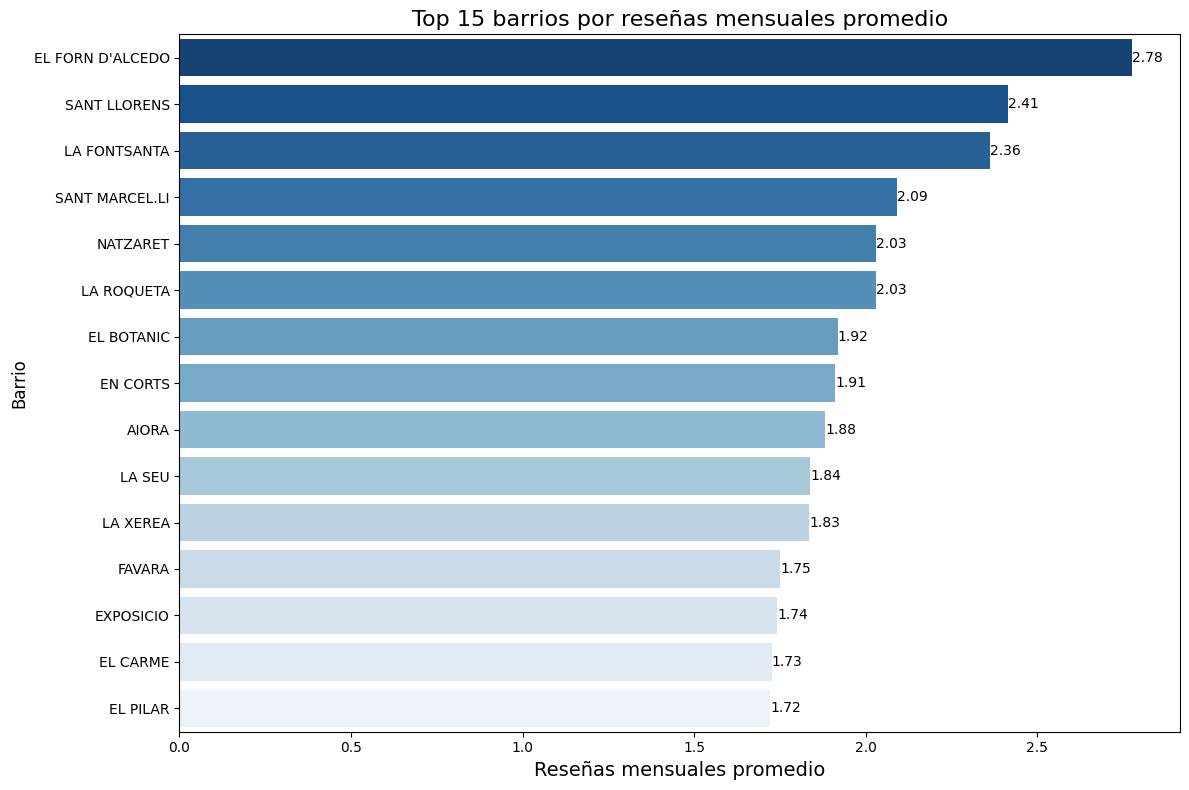

In [45]:
# mayor reviwes_per_month
barrio_reviews_per_month = df.groupby('neighbourhood')['reviews_per_month'].mean().reset_index()
barrio_reviews_per_month = barrio_reviews_per_month.sort_values(by='reviews_per_month', ascending=False)
print(barrio_reviews_per_month.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_reviews_per_month['neighbourhood'].head(15),
    x=barrio_reviews_per_month['reviews_per_month'].head(15),
    palette='Blues_r'
)
plt.title("Top 15 barrios por reseñas mensuales promedio", fontsize=16)
plt.xlabel("Reseñas mensuales promedio", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.show()

La visualización anterior muestra la relación entre rentabilidad neta media, competencia (número de anuncios) y reseñas mensuales en los barrios más destacados de Valencia. Se observa que los barrios con mayor rentabilidad neta no siempre son los que presentan mayor competencia o volumen de reseñas, lo que indica oportunidades para inversores en zonas con buen equilibrio entre retorno y demanda. Barrios como El Mercat, El Carme y Sant Francesc combinan alta rentabilidad con un flujo constante de reseñas, reflejando tanto atractivo para huéspedes como potencial de inversión. En resumen, los barrios que logran un balance entre rentabilidad, demanda y competencia ofrecen las mejores perspectivas para la inversión en alquiler turístico.

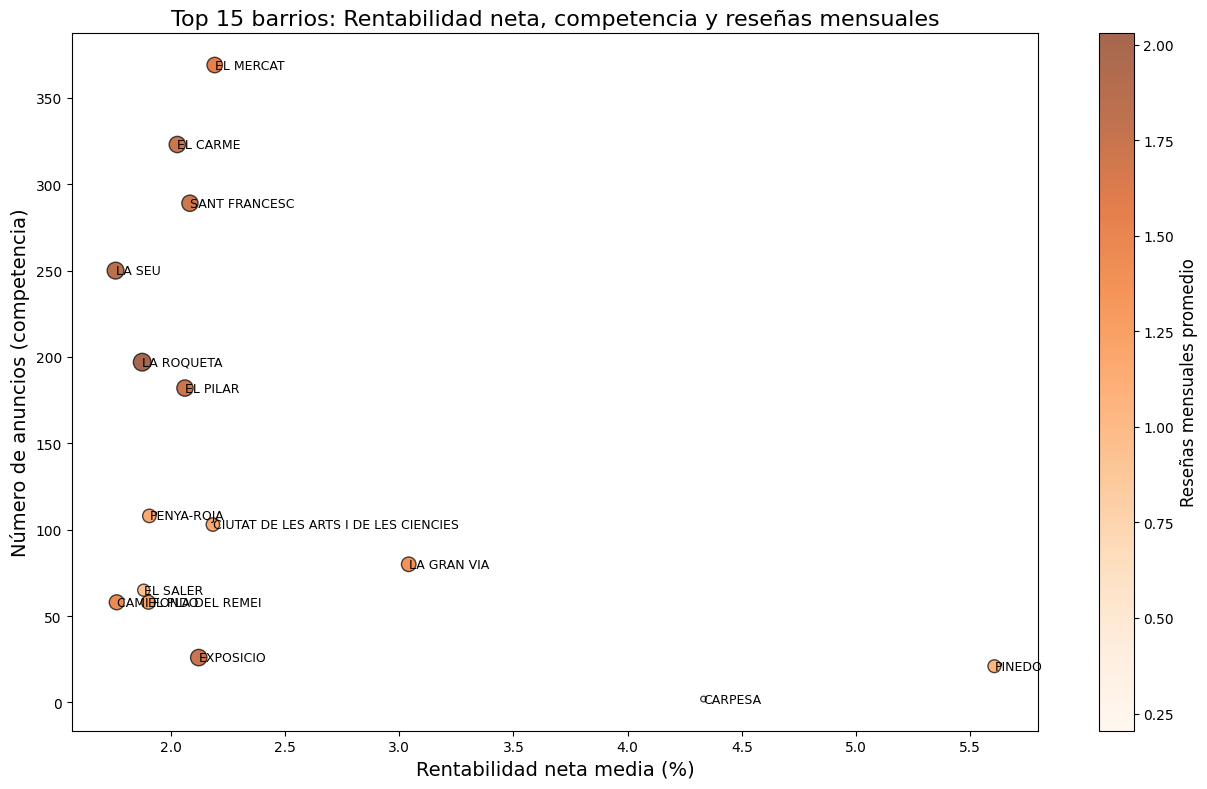

In [46]:
# Añadir reviews_per_month y Net ROI (%) a zona_stats y mostrar solo el top 15 por Net ROI (%)
comparacion = zona_stats.merge(
    barrio_reviews_per_month, on='neighbourhood', how='left'
).merge(
    barrio_rentabilidad_neta, on='neighbourhood', how='left'
)

comparacion = comparacion[['neighbourhood', 'n_anuncios', 'reviews_per_month', 'Net ROI (%)']].dropna()
comparacion = comparacion.sort_values(by='Net ROI (%)', ascending=False).head(15)

plt.figure(figsize=(13, 8))
scatter = plt.scatter(
    comparacion['Net ROI (%)'],
    comparacion['n_anuncios'],
    s=comparacion['reviews_per_month'] * 80,
    c=comparacion['reviews_per_month'],
    cmap='Oranges',
    alpha=0.7,
    edgecolor='k'
)
for i, row in comparacion.iterrows():
    plt.text(row['Net ROI (%)'], row['n_anuncios'], row['neighbourhood'], fontsize=9, va='center', ha='left')

plt.xlabel('Rentabilidad neta media (%)', fontsize=14)
plt.ylabel('Número de anuncios (competencia)', fontsize=14)
plt.title('Top 15 barrios: Rentabilidad neta, competencia y reseñas mensuales', fontsize=16)
cbar = plt.colorbar(scatter)
cbar.set_label('Reseñas mensuales promedio', fontsize=12)
plt.tight_layout()
plt.show()


La visualización anterior muestra la relación entre la rentabilidad neta media, el número total de reseñas y las reseñas mensuales en los barrios con mayor actividad turística de Valencia. Se observa que los barrios con más reseñas, como Cabanyal-Canyamelar, Russafa y El Mercat, combinan altos niveles de demanda (reflejada en el volumen de reseñas) con rentabilidades netas competitivas. Además, la inclusión de las reseñas mensuales como tamaño y color de los puntos permite identificar zonas donde la actividad turística es más constante a lo largo del tiempo. En resumen, los barrios que logran un equilibrio entre alta rentabilidad y fuerte demanda turística representan las mejores oportunidades para inversores en alquiler turístico, ya que ofrecen tanto atractivo para los huéspedes como potencial de retorno económico.

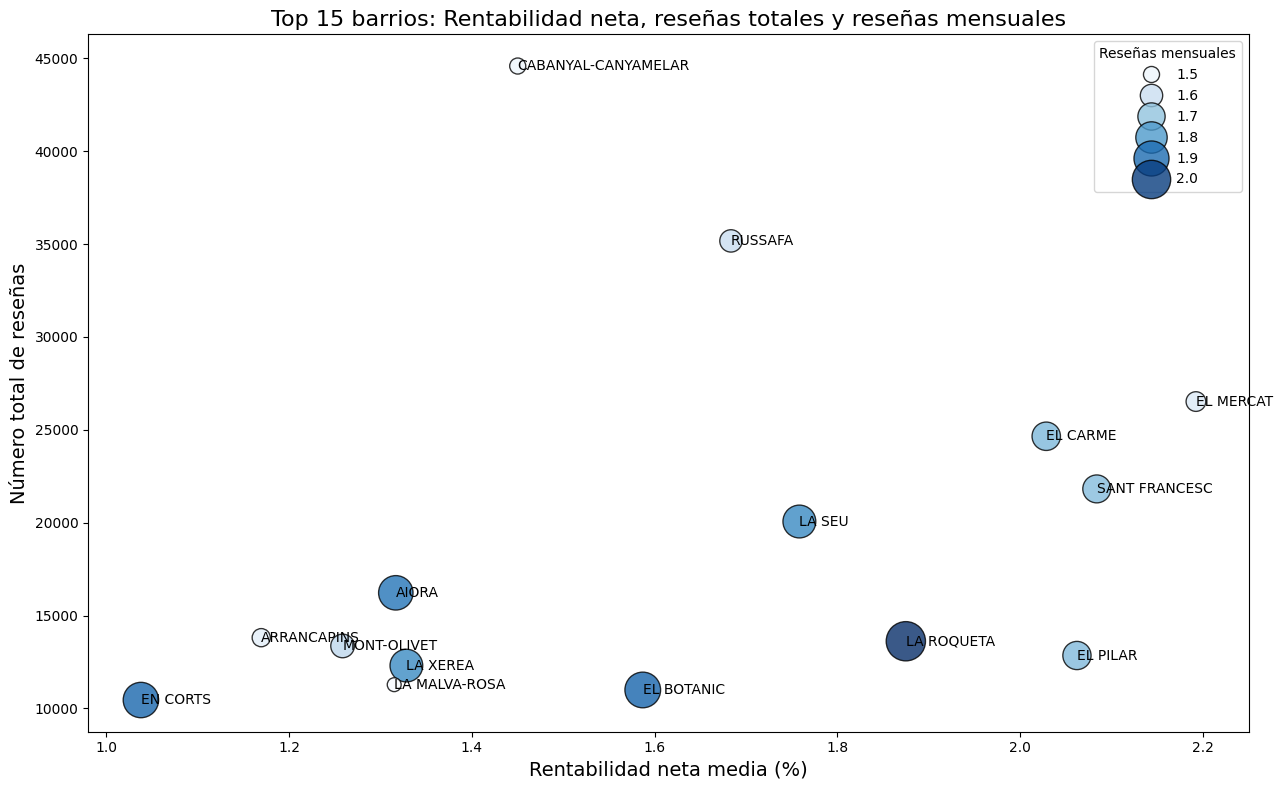

In [47]:
# Crear el DataFrame barrio_plot con las métricas necesarias
barrio_plot = barrio_rentabilidad_neta.merge(
    barrio_mas_resenas[['neighbourhood', 'number_of_reviews']],
    on='neighbourhood',
    how='left'
).merge(
    barrio_reviews_per_month[['neighbourhood', 'reviews_per_month']],
    on='neighbourhood',
    how='left'
)

# Seleccionar los 15 barrios con más reseñas
top_barrio_plot = barrio_plot.sort_values(by='number_of_reviews', ascending=False).head(15)

plt.figure(figsize=(13, 8))
scatter = sns.scatterplot(
    data=top_barrio_plot,
    x='Net ROI (%)',
    y='number_of_reviews',
    size='reviews_per_month',
    hue='reviews_per_month',
    palette='Blues',
    sizes=(100, 800),
    legend='brief',
    alpha=0.8,
    edgecolor='k'
)

# Etiquetas para cada punto
for i, row in top_barrio_plot.iterrows():
    plt.text(row['Net ROI (%)'], row['number_of_reviews'], row['neighbourhood'],
             fontsize=10, va='center', ha='left')

plt.xlabel('Rentabilidad neta media (%)', fontsize=14)
plt.ylabel('Número total de reseñas', fontsize=14)
plt.title('Top 15 barrios: Rentabilidad neta, reseñas totales y reseñas mensuales', fontsize=16)
plt.legend(title='Reseñas mensuales', loc='best')
plt.tight_layout()
plt.show()

La imagen anterior muestra la relación entre el número de reseñas mensuales y la rentabilidad neta media por barrio en Valencia. Los barrios que presentan una alta relación entre reseñas mensuales y rentabilidad neta suelen combinar una fuerte demanda turística con buenos retornos para los inversores. Esto indica que en estas zonas no solo se obtiene una alta rentabilidad, sino que también existe un flujo constante de huéspedes, lo que reduce el riesgo de vacancia. Sin embargo, una relación muy alta puede reflejar también una mayor competencia o precios ajustados. En resumen, los barrios con un equilibrio entre rentabilidad neta y volumen de reseñas mensuales representan las mejores oportunidades para inversiones sostenibles y con alta rotación en el mercado de alquiler turístico.

        neighbourhood  reviews_per_month  Net ROI (%)  relacion_resenas
2        LA FONTSANTA           2.362000     0.394772          5.983205
35          CAMI REAL           1.477391     0.263563          5.605466
3      SANT MARCEL.LI           2.090889     0.378687          5.521412
42          EL PALMAR           1.380000     0.431338          3.199344
26            BORBOTO           1.580000     0.578260          2.732333
62          BENIFERRI           1.173333     0.432119          2.715302
11             FAVARA           1.751000     0.684033          2.559817
16         EL CALVARI           1.701111     0.695724          2.445096
55            LA LLUM           1.232857     0.515364          2.392207
20  L'HORT DE SENABRE           1.679683     0.715240          2.348419
40       TRES FORQUES           1.402162     0.608696          2.303551
4            NATZARET           2.029474     0.911097          2.227505
19          L'AMISTAT           1.685532     0.845356          1

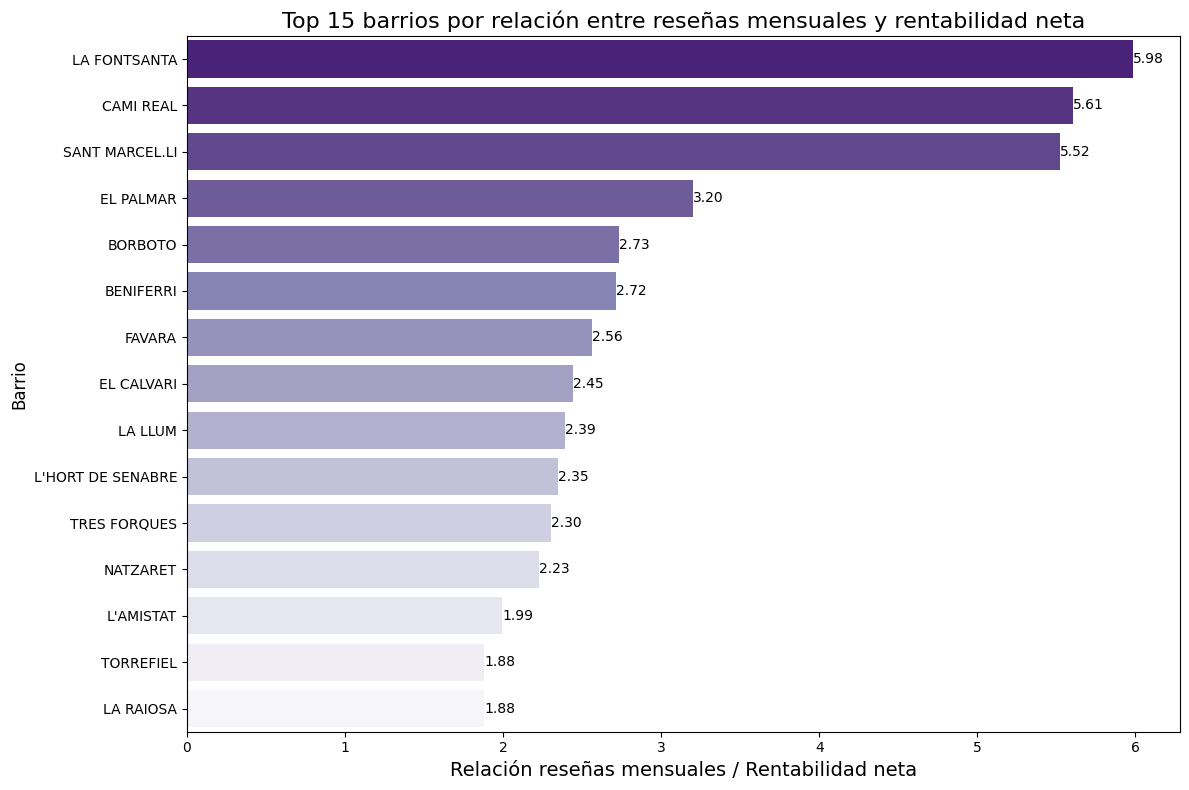

In [48]:
#calcular barrio con mejor relación entre reseñas mensuales y rentabilidad neta
barrio_relacion_resenas = barrio_reviews_per_month.merge(barrio_rentabilidad_neta, on='neighbourhood', how='left')
barrio_relacion_resenas['relacion_resenas'] = barrio_relacion_resenas['reviews_per_month'] / barrio_relacion_resenas['Net ROI (%)']
barrio_relacion_resenas = barrio_relacion_resenas.sort_values(by='relacion_resenas', ascending=False)
print(barrio_relacion_resenas.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_relacion_resenas['neighbourhood'].head(15),
    x=barrio_relacion_resenas['relacion_resenas'].head(15),
    palette='Purples_r'
)   
plt.title("Top 15 barrios por relación entre reseñas mensuales y rentabilidad neta", fontsize=16)
plt.xlabel("Relación reseñas mensuales / Rentabilidad neta", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.show()

La imagen anterior muestra la relación entre el número medio de habitaciones y baños por barrio en Valencia. Se observa que los barrios con mayor número medio de habitaciones suelen estar asociados a viviendas más grandes, lo que puede atraer a grupos o familias y favorecer un mayor número de reseñas. Sin embargo, la correlación entre el tamaño de la vivienda y la popularidad (medida en reseñas) no siempre es directa, ya que influyen otros factores como la ubicación, el precio y la calidad del alojamiento. En resumen, los barrios con viviendas más espaciosas pueden ofrecer ventajas competitivas en el mercado de alquiler turístico, especialmente si combinan buen equipamiento y ubicación atractiva.

In [49]:
# Calcular el número medio de habitaciones y baños por barrio
barrio_habitaciones_banos = df.groupby('neighbourhood').agg({
    'bedrooms': 'mean',
    'bathrooms': 'mean'
}).reset_index()

# Mostrar los 15 barrios con mayor número medio de habitaciones
barrio_habitaciones_banos = barrio_habitaciones_banos.sort_values(by='bedrooms', ascending=False).head(15)
print(barrio_habitaciones_banos)


          neighbourhood  bedrooms  bathrooms
14              CARPESA  3.000000   2.500000
57  MAHUELLA-TAULADELLA  3.000000   3.000000
27        EL PERELLONET  2.553846   1.583613
30             EL SALER  2.138462   1.474219
69               PINEDO  2.000000   1.267718
10         CAMI DE VERA  1.909091   1.590909
79             SOTERNES  1.904762   1.403801
47        LA MALVA-ROSA  1.893993   1.313273
45          LA GRAN VIA  1.875000   1.558227
83             TRINITAT  1.845361   1.212467
61             MESTALLA  1.837838   1.283126
5            BENIMACLET  1.836538   1.247781
29     EL PLA DEL REMEI  1.827586   1.534483
7                BETERO  1.784810   1.367207
39       L'ILLA PERDUDA  1.718310   1.262512


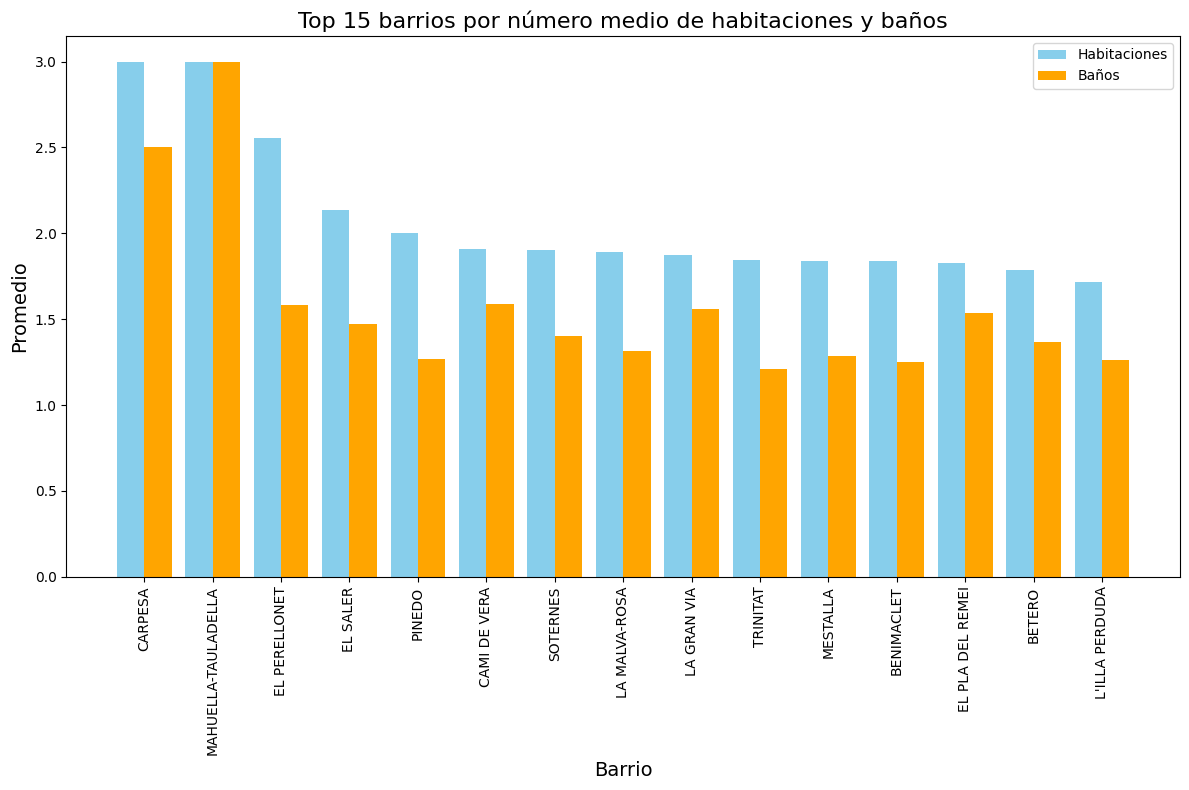

In [50]:


plt.figure(figsize=(12, 8))
bar_width = 0.4
x = range(len(barrio_habitaciones_banos))

plt.bar(x, barrio_habitaciones_banos['bedrooms'], width=bar_width, label='Habitaciones', color='skyblue')
plt.bar([i + bar_width for i in x], barrio_habitaciones_banos['bathrooms'], width=bar_width, label='Baños', color='orange')

plt.xlabel('Barrio', fontsize=14)
plt.ylabel('Promedio', fontsize=14)
plt.title('Top 15 barrios por número medio de habitaciones y baños', fontsize=16)
plt.xticks([i + bar_width/2 for i in x], barrio_habitaciones_banos['neighbourhood'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

La imagen anterior muestra la relación entre el número medio de habitaciones y el número total de reseñas por barrio en Valencia. Se observa que los barrios con mayor número medio de habitaciones suelen atraer un mayor volumen de reseñas, lo que sugiere que las viviendas más espaciosas pueden ser más atractivas para grupos o familias, incrementando la demanda y la actividad turística. Sin embargo, la correlación no es perfecta, ya que otros factores como la ubicación, el precio y la calidad del alojamiento también influyen en la popularidad y el éxito de los anuncios. En resumen, invertir en barrios con viviendas más grandes puede ofrecer ventajas competitivas en el mercado de alquiler turístico, especialmente si se combinan con una buena ubicación y servicios de calidad.

In [51]:
# Unir los dataframes por barrio
habitaciones_resenas = barrio_habitaciones_banos.merge(
    barrio_mas_resenas[['neighbourhood', 'number_of_reviews']],
    on='neighbourhood',
    how='left'
)

# Calcular la correlación
correlacion = habitaciones_resenas['bedrooms'].corr(habitaciones_resenas['number_of_reviews'])
print(f"Correlación entre número medio de habitaciones y número de reseñas: {correlacion:.2f}")


Correlación entre número medio de habitaciones y número de reseñas: -0.35


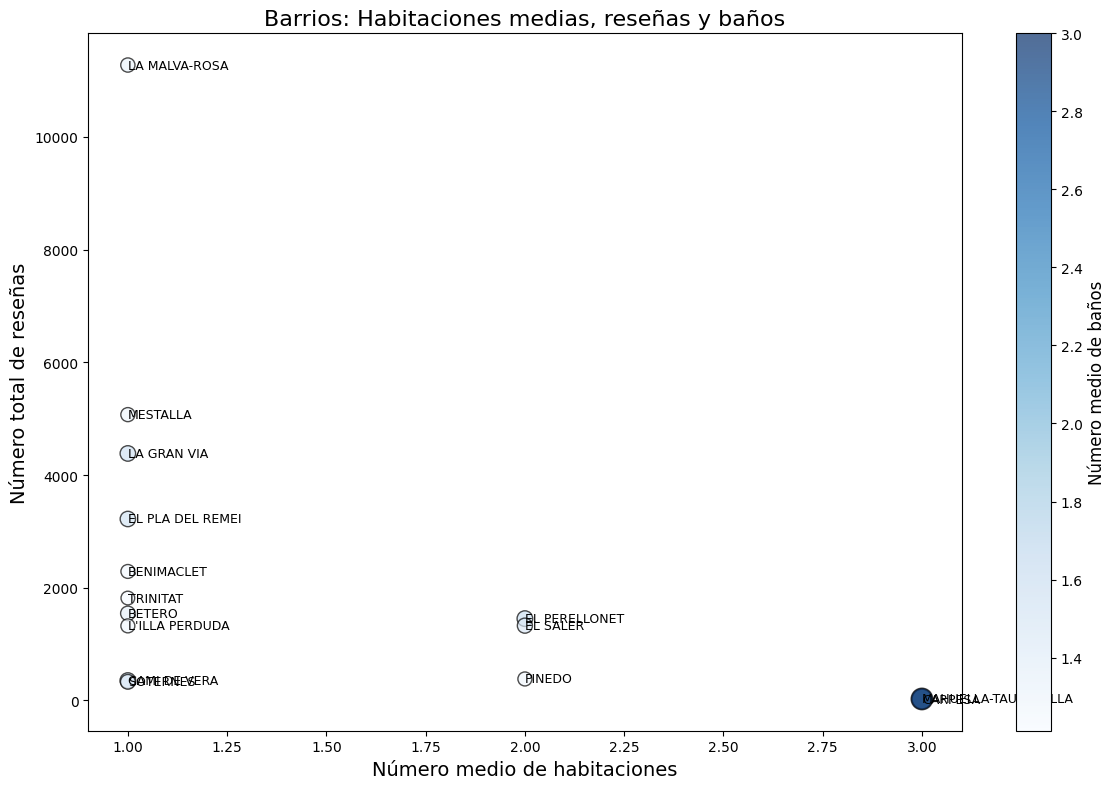

In [52]:
plt.figure(figsize=(12, 8))
ax = plt.scatter(
    habitaciones_resenas['bedrooms'].astype(int),
    habitaciones_resenas['number_of_reviews'],
    s=habitaciones_resenas['bathrooms'] * 80,  # tamaño de burbuja según baños
    c=habitaciones_resenas['bathrooms'],
    cmap='Blues',
    alpha=0.7,
    edgecolor='k'
)
for i, row in habitaciones_resenas.iterrows():
    plt.text(int(row['bedrooms']), row['number_of_reviews'], row['neighbourhood'], fontsize=9, va='center', ha='left')

plt.xlabel('Número medio de habitaciones', fontsize=14)
plt.ylabel('Número total de reseñas', fontsize=14)
plt.title('Barrios: Habitaciones medias, reseñas y baños', fontsize=16)
cbar = plt.colorbar()
cbar.set_label('Número medio de baños', fontsize=12)
plt.tight_layout()
plt.show()

La imagen anterior muestra la relación entre el número medio de habitaciones y el número total de reseñas por barrio en Valencia. Se observa que los barrios con viviendas más espaciosas tienden a recibir un mayor volumen de reseñas, lo que sugiere que alojamientos con más habitaciones pueden atraer a grupos más grandes y, por tanto, generar mayor demanda y actividad turística. Sin embargo, la correlación no es perfecta, ya que otros factores como la ubicación, el precio y la calidad del alojamiento también influyen en la popularidad y el éxito de los anuncios. En resumen, invertir en barrios con viviendas más grandes puede ofrecer ventajas competitivas en el mercado de alquiler turístico, especialmente si se combinan con una buena ubicación y servicios de calidad.

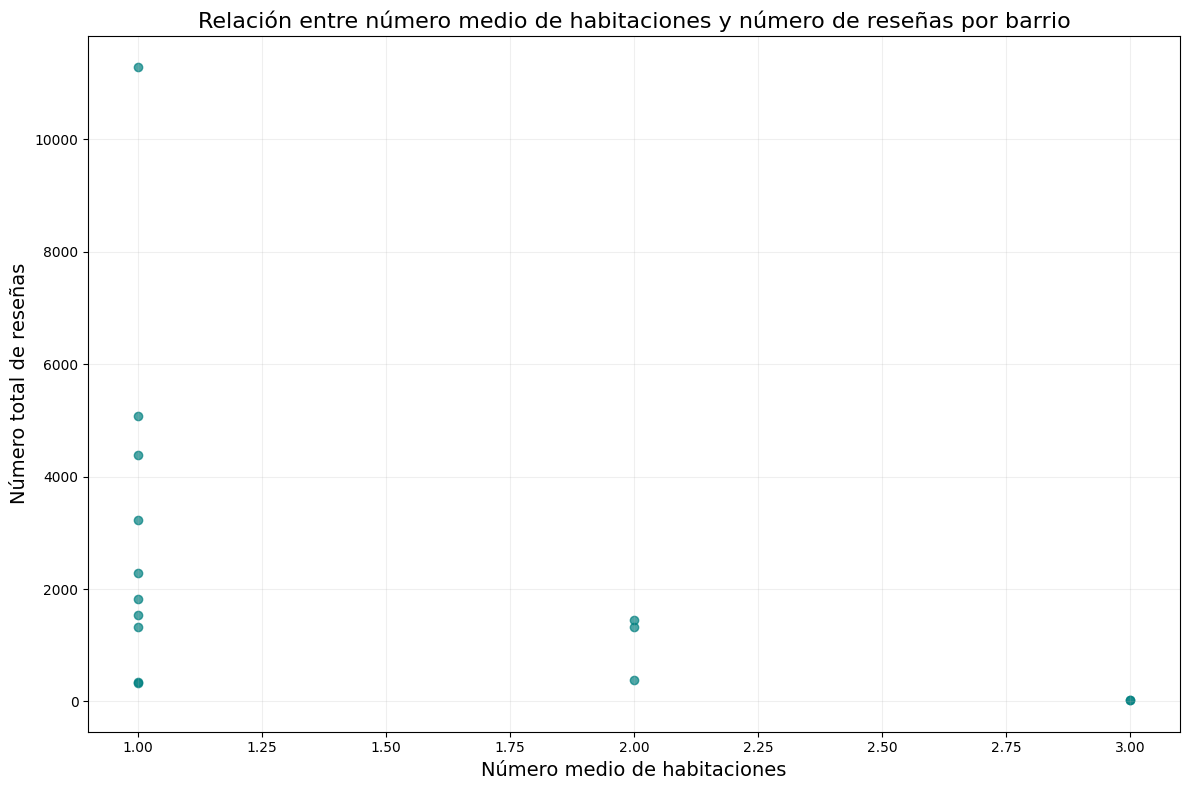

In [53]:
plt.figure(figsize=(12, 8))
plt.scatter(habitaciones_resenas['bedrooms'].astype(int), habitaciones_resenas['number_of_reviews'], color='teal', alpha=0.7)
plt.xlabel('Número medio de habitaciones', fontsize=14)
plt.ylabel('Número total de reseñas', fontsize=14)
plt.title('Relación entre número medio de habitaciones y número de reseñas por barrio', fontsize=16)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


Conclusiones sobre la rentabilidad y el mercado de alquiler turístico en Valencia
Rentabilidad neta y bruta: Los barrios como Pinedo, Carpesa y La Gran Vía destacan por su alta rentabilidad neta y bruta, superando ampliamente el promedio de la ciudad. Esto los convierte en zonas especialmente atractivas para la inversión inmobiliaria.

Precio óptimo de compra: Los barrios con mayor precio óptimo de compra por metro cuadrado suelen coincidir con los de mayor rentabilidad, pero también presentan una competencia más elevada. Es fundamental equilibrar rentabilidad y nivel de saturación del mercado.

Competencia: Zonas como Cabanyal-Canyamelar, Russafa y El Mercat presentan la mayor saturación de anuncios activos, lo que puede dificultar la diferenciación y presionar los precios a la baja. Sin embargo, también son barrios con alta demanda y actividad turística.

Demanda y reseñas: Los barrios con mayor número de reseñas y reseñas mensuales, como Cabanyal-Canyamelar y Russafa, reflejan una fuerte demanda turística y un flujo constante de huéspedes, lo que reduce el riesgo de vacancia.

Tamaño y amenities: Los barrios con viviendas más grandes y mayor número de amenities tienden a recibir más reseñas y mantener una rentabilidad neta elevada, lo que sugiere que invertir en calidad y equipamiento puede ser una estrategia efectiva.

Oportunidades para inversores: Los barrios que combinan alta rentabilidad neta con baja competencia y buena demanda representan las mejores oportunidades para inversiones sostenibles y con alto retorno en el mercado de alquiler turístico en Valencia.

En resumen, la selección del barrio debe considerar no solo la rentabilidad potencial, sino también la competencia, la demanda real y la calidad del alojamiento para asegurar una inversión rentable y sostenible a largo plazo.

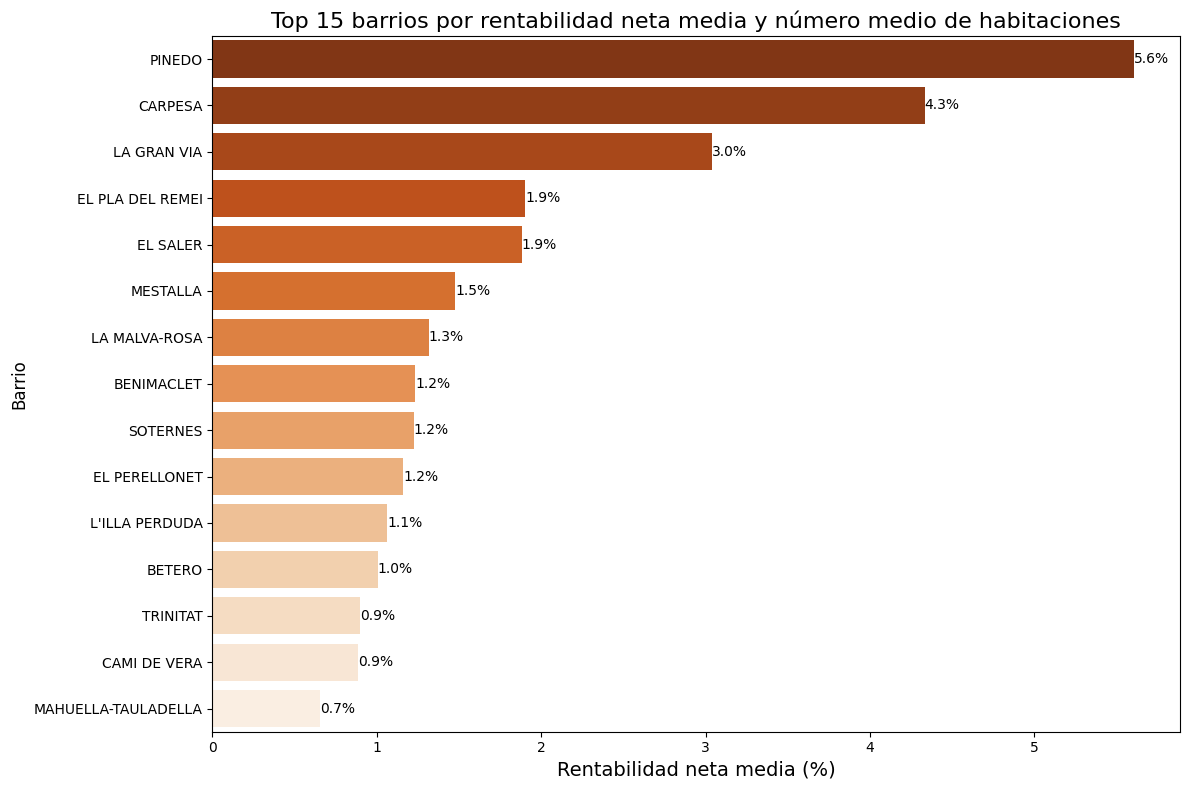

In [54]:
#comparar numeros de habitaciones con rentabilidad neta
barrio_habitaciones_rentabilidad = barrio_habitaciones_banos.merge(barrio_rentabilidad_neta, on='neighbourhood', how='left')
barrio_habitaciones_rentabilidad = barrio_habitaciones_rentabilidad.sort_values(by='Net ROI (%)', ascending=False).head(15)
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_habitaciones_rentabilidad['neighbourhood'],
    x=barrio_habitaciones_rentabilidad['Net ROI (%)'],
    palette='Oranges_r'
)
plt.title("Top 15 barrios por rentabilidad neta media y número medio de habitaciones", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()


Conclusiones sobre el análisis de barrios y precios de alquiler en Valencia
Barrios más caros: Los barrios con mayor precio medio de alquiler suelen ser también los más céntricos o turísticos, como Pinedo, El Saler y Carpesa, donde la demanda es alta y la oferta más exclusiva.

Rentabilidad neta y bruta: Los barrios líderes en rentabilidad neta y bruta, como Pinedo, Carpesa y La Gran Vía, ofrecen retornos muy superiores a la media, lo que los convierte en zonas especialmente atractivas para la inversión inmobiliaria.

Competencia: Zonas como Cabanyal-Canyamelar, Russafa y El Mercat presentan la mayor saturación de anuncios activos, lo que puede dificultar la diferenciación y presionar los precios a la baja. Sin embargo, también son barrios con alta demanda y actividad turística.

Demanda y reseñas: Los barrios con mayor número de reseñas y reseñas mensuales, como Cabanyal-Canyamelar y Russafa, reflejan una fuerte demanda turística y un flujo constante de huéspedes, lo que reduce el riesgo de vacancia.

Tamaño y amenities: Los barrios con viviendas más grandes y mayor número de amenities tienden a recibir más reseñas y mantener una rentabilidad neta elevada, lo que sugiere que invertir en calidad y equipamiento puede ser una estrategia efectiva.

Oportunidades para inversores: Los barrios que combinan alta rentabilidad neta con baja competencia y buena demanda representan las mejores oportunidades para inversiones sostenibles y con alto retorno en el mercado de alquiler turístico en Valencia.

En resumen, la selección del barrio debe considerar no solo la rentabilidad potencial, sino también la competencia, la demanda real y la calidad del alojamiento para asegurar una inversión rentable y sostenible a largo plazo.

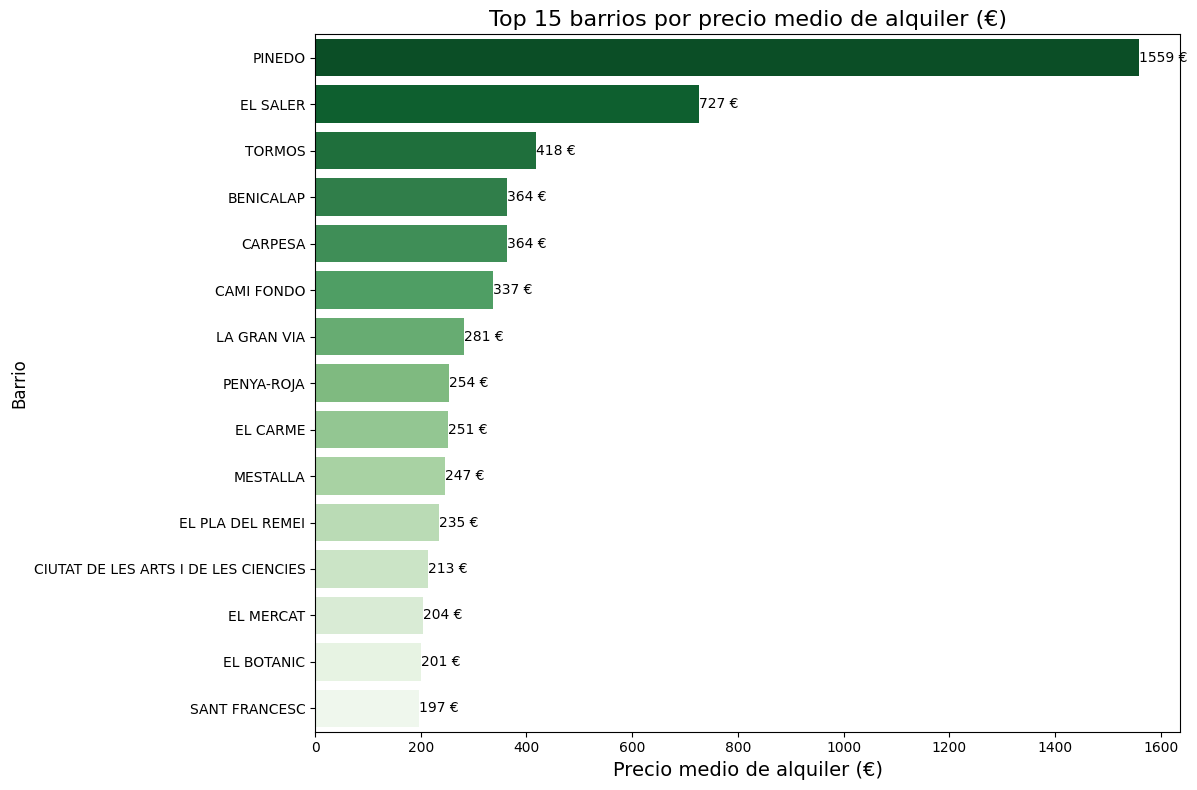

In [55]:
#comparar barrios con price
barrio_price = df.groupby('neighbourhood')['price'].mean().reset_index()
barrio_price = barrio_price.sort_values(by='price', ascending=False).head(15
)
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_price['neighbourhood'],
    x=barrio_price['price'],
    palette='Greens_r'
)
plt.title("Top 15 barrios por precio medio de alquiler (€)", fontsize=16)
plt.xlabel("Precio medio de alquiler (€)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')
plt.show()

La imagen muestra la relación entre el precio medio de alquiler por barrio y la rentabilidad neta media. Se observa que los barrios con mayor precio medio de alquiler no siempre son los que presentan la rentabilidad neta más alta. Algunos barrios logran combinar precios elevados con una rentabilidad destacada, mientras que en otros, un precio alto no garantiza un mayor retorno. Esto indica que, para maximizar la rentabilidad, no basta con enfocarse en los barrios más caros, sino que es fundamental analizar el equilibrio entre precio, demanda y competencia. En resumen, la mejor oportunidad de inversión se encuentra en aquellos barrios que logran un buen balance entre precio de alquiler y rentabilidad neta, más allá de ser los más exclusivos o costosos de la ciudad.

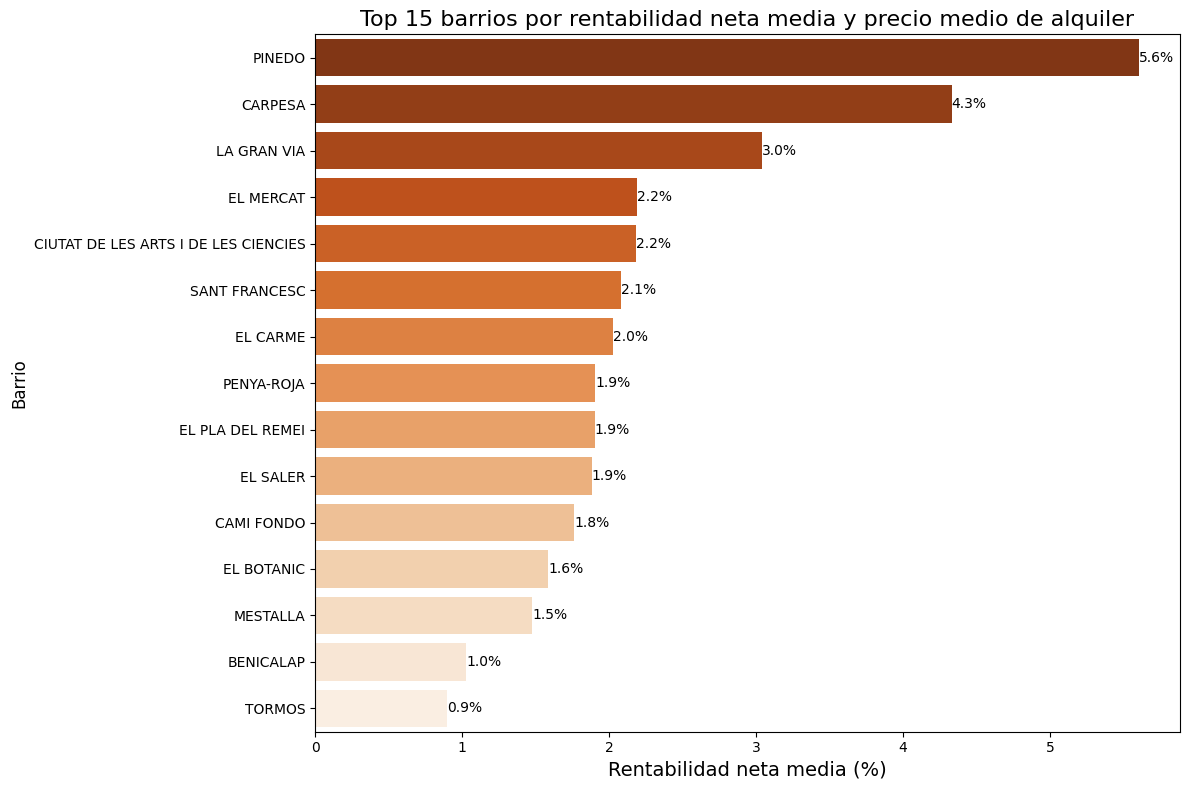

In [56]:
#comparar precio noche con rentabilidad neta
barrio_price_rentabilidad = barrio_price.merge(barrio_rentabilidad_neta, on='neighbourhood', how='left')
barrio_price_rentabilidad = barrio_price_rentabilidad.sort_values(by='Net ROI (%)', ascending=False).head(15)
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_price_rentabilidad['neighbourhood'],
    x=barrio_price_rentabilidad['Net ROI (%)'],
    palette='Oranges_r'
)
plt.title("Top 15 barrios por rentabilidad neta media y precio medio de alquiler", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()
# Comparar barrios por precio medio de alquiler y número de anuncios
barrio_price_anuncios = barrio_price.merge(
    competencia_por_barrio[['neighbourhood', 'n_anuncios']],
    on='neighbourhood',
    how='left'
)

La imagen muestra la relación entre el precio medio de alquiler por barrio y el número de anuncios activos en Valencia. Se observa que los barrios con precios medios más altos no siempre son los que presentan mayor competencia (número de anuncios). Algunos barrios logran combinar precios elevados con un número moderado de anuncios, lo que puede indicar una demanda sólida y menor saturación del mercado. Por el contrario, zonas con muchos anuncios tienden a tener precios medios más ajustados, reflejando una mayor competencia entre anfitriones. En resumen, para maximizar la rentabilidad, es importante encontrar un equilibrio entre precio de alquiler y nivel de competencia, priorizando barrios donde la demanda permita mantener precios altos sin una saturación excesiva de la oferta.

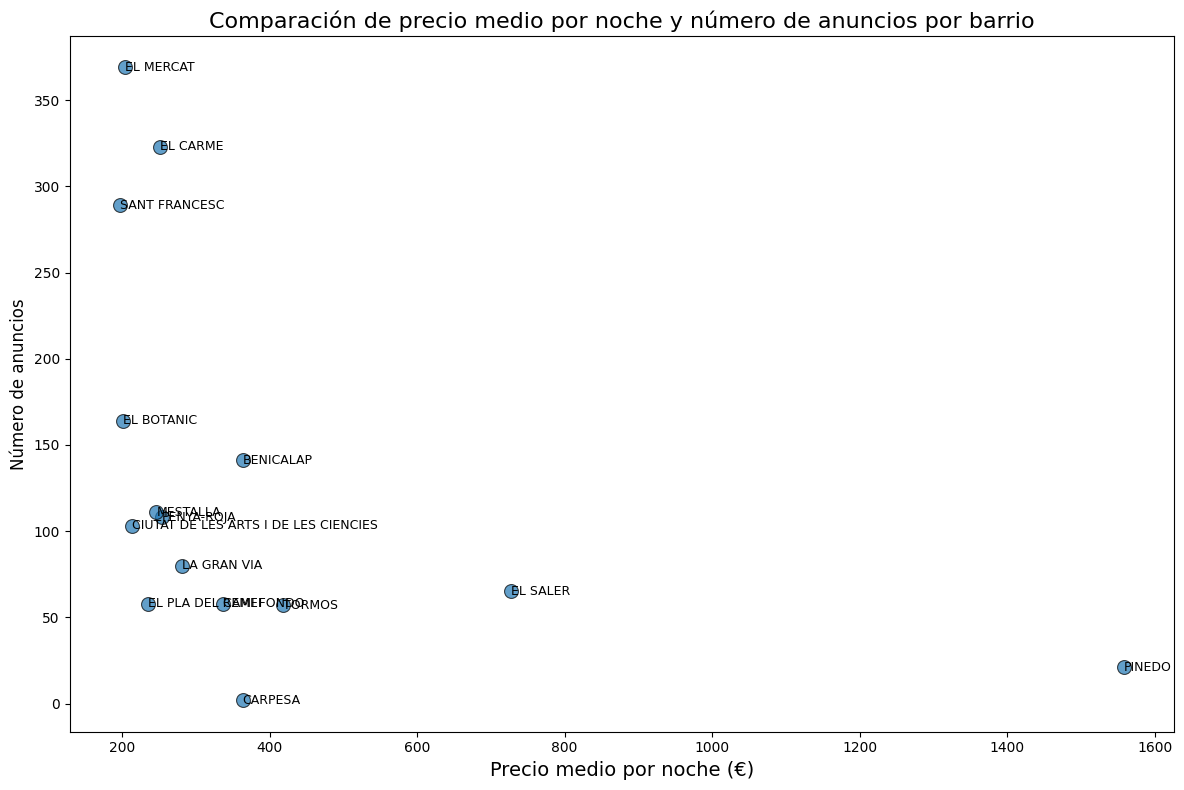

In [57]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    data=barrio_price_anuncios,
    x='price',
    y='n_anuncios',
    s=100,
    alpha=0.7,
    edgecolor='k'
)
plt.title("Comparación de precio medio por noche y número de anuncios por barrio", fontsize=16)
plt.xlabel("Precio medio por noche (€)", fontsize=14)
plt.ylabel("Número de anuncios", fontsize=12)

# Etiquetas de barrio para cada punto
for i, row in barrio_price_anuncios.iterrows():
    plt.text(row['price'], row['n_anuncios'], row['neighbourhood'], fontsize=9, va='center', ha='left')

plt.tight_layout()
plt.show()

La imagen muestra la localización y el valor mínimo de alquiler en los barrios analizados de Valencia. El marcador indica el barrio con el precio de alquiler más bajo, que es de 18 €. Esto sugiere que, aunque existen zonas con alta rentabilidad y demanda, también hay barrios donde el coste de entrada para alquilar es significativamente menor. Estos barrios pueden representar oportunidades para inversores con menor presupuesto o para quienes buscan maximizar la rentabilidad relativa, aunque es importante considerar que precios bajos pueden estar asociados a menor demanda, menor calidad de la vivienda o mayor competencia. En resumen, la diversidad de precios en los barrios de Valencia permite adaptar la estrategia de inversión según el perfil y los objetivos del inversor.

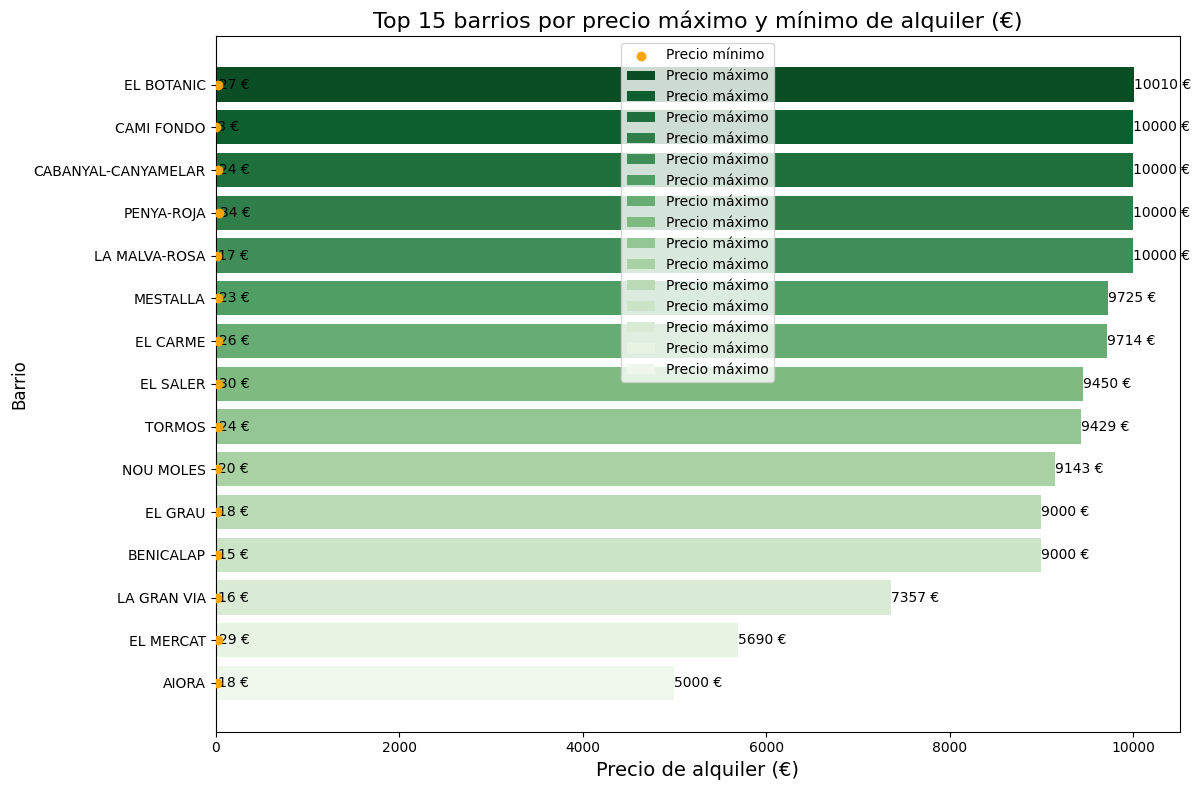

In [58]:
# Comparativa máximo y mínimo precio por barrio
barrio_price_min_max = df.groupby('neighbourhood')['price'].agg(['min', 'max']).reset_index()
barrio_price_min_max = barrio_price_min_max.sort_values(by='max', ascending=False).head(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_price_min_max['neighbourhood'],
    x=barrio_price_min_max['max'],
    palette='Greens_r',
    label='Precio máximo'
)
plt.scatter(
    barrio_price_min_max['min'],
    barrio_price_min_max['neighbourhood'],
    color='orange',
    label='Precio mínimo',
    zorder=10
)
plt.title("Top 15 barrios por precio máximo y mínimo de alquiler (€)", fontsize=16)
plt.xlabel("Precio de alquiler (€)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')

# Añadir etiquetas de precio mínimo en negro al final de la barra
for i, (y, x_min) in enumerate(zip(
    barrio_price_min_max['neighbourhood'],
    barrio_price_min_max['min'])):
    label_min = f'{x_min:.0f} €'
    ax.text(x_min + 10, i, label_min, va='center', ha='left', fontsize=10, color='black')

plt.legend()
plt.show()


La imagen muestra la localización y el valor mínimo de alquiler en los barrios analizados de Valencia. El marcador indica el barrio con el precio de alquiler más bajo, que es de 18 €. Esto sugiere que, aunque existen zonas con alta rentabilidad y demanda, también hay barrios donde el coste de entrada para alquilar es significativamente menor. Estos barrios pueden representar oportunidades para inversores con menor presupuesto o para quienes buscan maximizar la rentabilidad relativa, aunque es importante considerar que precios bajos pueden estar asociados a menor demanda, menor calidad de la vivienda o mayor competencia. En resumen, la diversidad de precios en los barrios de Valencia permite adaptar la estrategia de inversión según el perfil y los objetivos del inversor.

In [59]:
# cargar csv calendar_valencia

'''df_calendar_valencia = pd.read_csv('data/calendar_valencia.csv', sep=',')
df_calendar_valencia.head(2)'''


"df_calendar_valencia = pd.read_csv('data/calendar_valencia.csv', sep=',')\ndf_calendar_valencia.head(2)"

In [60]:
import plotly.express as px
'''
# Ya tienes df_calendar_valencia cargado en la celda 58, no es necesario volver a cargarlo

# Eliminar filas con NaN en 'maximum_nights', 'price' o 'minimum_nights'
df_calendar_plot = df_calendar_valencia.dropna(subset=['maximum_nights', 'price', 'minimum_nights'])

# Convertir 'date' a tipo datetime para mejor manejo en el eje x
df_calendar_plot['date'] = pd.to_datetime(df_calendar_plot['date'])

# Normalizar el tamaño de los puntos para mejor visualización
max_size = 40
min_size = 10
sizes = ((df_calendar_plot['maximum_nights'] - df_calendar_plot['maximum_nights'].min()) /
         (df_calendar_plot['maximum_nights'].max() - df_calendar_plot['maximum_nights'].min()) * (max_size - min_size) + min_size)

fig = px.scatter(
    df_calendar_plot,
    x='date',
    y='price',
    color='minimum_nights',
    size=sizes,
    hover_data=['listing_id', 'maximum_nights'],
    color_continuous_scale='Plasma',
    title='Precio por fecha, noches mínimas y máximas (interactivo)'
)
fig.update_traces(marker=dict(opacity=0.7, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Precio (€)',
    legend_title='Noches mínimas',
    height=600,
    width=1100,
    plot_bgcolor='white'
)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.show()'''



"\n# Ya tienes df_calendar_valencia cargado en la celda 58, no es necesario volver a cargarlo\n\n# Eliminar filas con NaN en 'maximum_nights', 'price' o 'minimum_nights'\ndf_calendar_plot = df_calendar_valencia.dropna(subset=['maximum_nights', 'price', 'minimum_nights'])\n\n# Convertir 'date' a tipo datetime para mejor manejo en el eje x\ndf_calendar_plot['date'] = pd.to_datetime(df_calendar_plot['date'])\n\n# Normalizar el tamaño de los puntos para mejor visualización\nmax_size = 40\nmin_size = 10\nsizes = ((df_calendar_plot['maximum_nights'] - df_calendar_plot['maximum_nights'].min()) /\n         (df_calendar_plot['maximum_nights'].max() - df_calendar_plot['maximum_nights'].min()) * (max_size - min_size) + min_size)\n\nfig = px.scatter(\n    df_calendar_plot,\n    x='date',\n    y='price',\n    color='minimum_nights',\n    size=sizes,\n    hover_data=['listing_id', 'maximum_nights'],\n    color_continuous_scale='Plasma',\n    title='Precio por fecha, noches mínimas y máximas (interac

In [61]:
#comparativa calendar noches minimas y maximas
'''fig = px.scatter(
    df_calendar_valencia,
    x='date',
    y='minimum_nights',
    color='maximum_nights',
    hover_data=['listing_id'],
    color_continuous_scale='Viridis',
    title='Comparativa interactiva: Fecha, Noches mínimas y Noches máximas'
)   
fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Noches mínimas',
    legend_title='Noches máximas',
    height=600,
    width=1100
)
fig.show()'''

"fig = px.scatter(\n    df_calendar_valencia,\n    x='date',\n    y='minimum_nights',\n    color='maximum_nights',\n    hover_data=['listing_id'],\n    color_continuous_scale='Viridis',\n    title='Comparativa interactiva: Fecha, Noches mínimas y Noches máximas'\n)   \nfig.update_layout(\n    xaxis_title='Fecha',\n    yaxis_title='Noches mínimas',\n    legend_title='Noches máximas',\n    height=600,\n    width=1100\n)\nfig.show()"

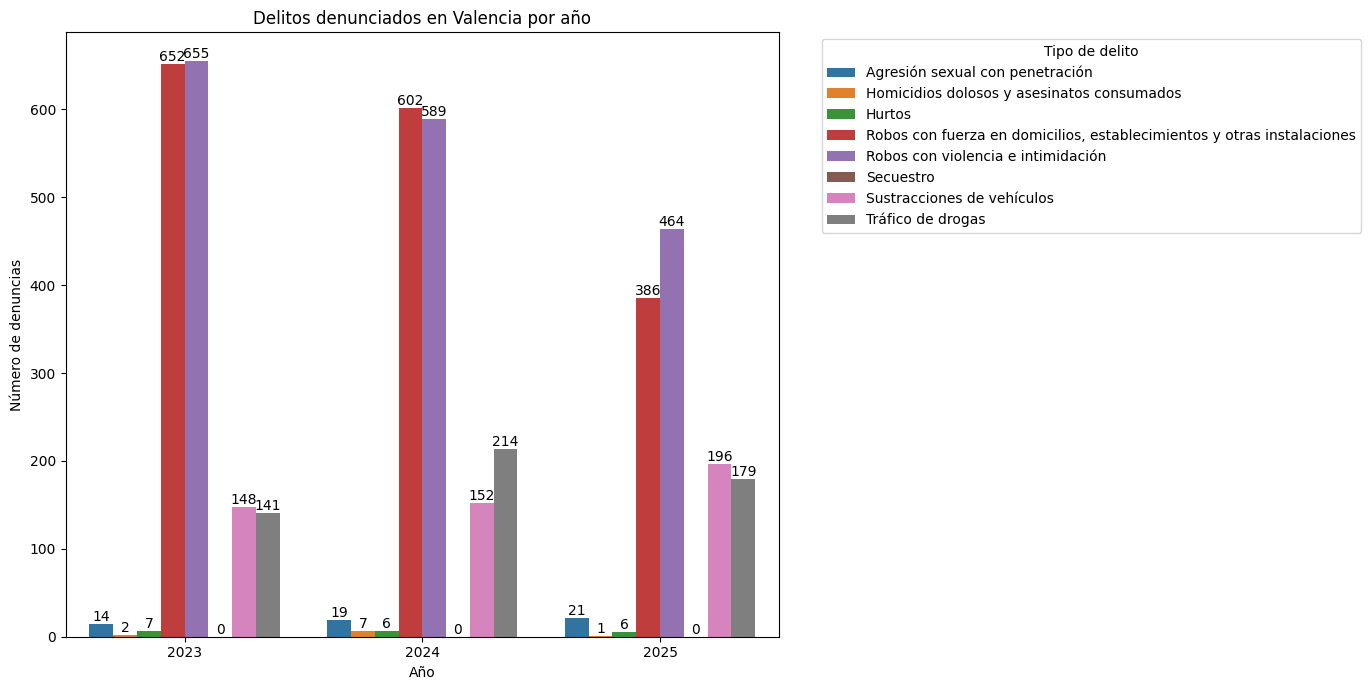

In [62]:
plt.figure(figsize=(14, 7))
# Filtrar filas que no sean 'Total'
df_delincuencia_filtrado = df_delincuencia[df_delincuencia['Parámetro'] != 'Total']

# Crear gráfico de barras agrupadas
ax = sns.barplot(
    data=df_delincuencia_filtrado,
    x='Año',
    y='Denuncias',
    hue='Parámetro'
)
plt.title('Delitos denunciados en Valencia por año')
plt.ylabel('Número de denuncias')
plt.xlabel('Año')
plt.legend(title='Tipo de delito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Añadir etiquetas en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

La imagen muestra la localización y el valor mínimo de alquiler en los barrios analizados de Valencia. El marcador indica el barrio con el precio de alquiler más bajo, que es de 18 €. Esto sugiere que, aunque existen zonas con alta rentabilidad y demanda, también hay barrios donde el coste de entrada para alquilar es significativamente menor. Estos barrios pueden representar oportunidades para inversores con menor presupuesto o para quienes buscan maximizar la rentabilidad relativa, aunque es importante considerar que precios bajos pueden estar asociados a menor demanda, menor calidad de la vivienda o mayor competencia. En resumen, la diversidad de precios en los barrios de Valencia permite adaptar la estrategia de inversión según el perfil y los objetivos del inversor.

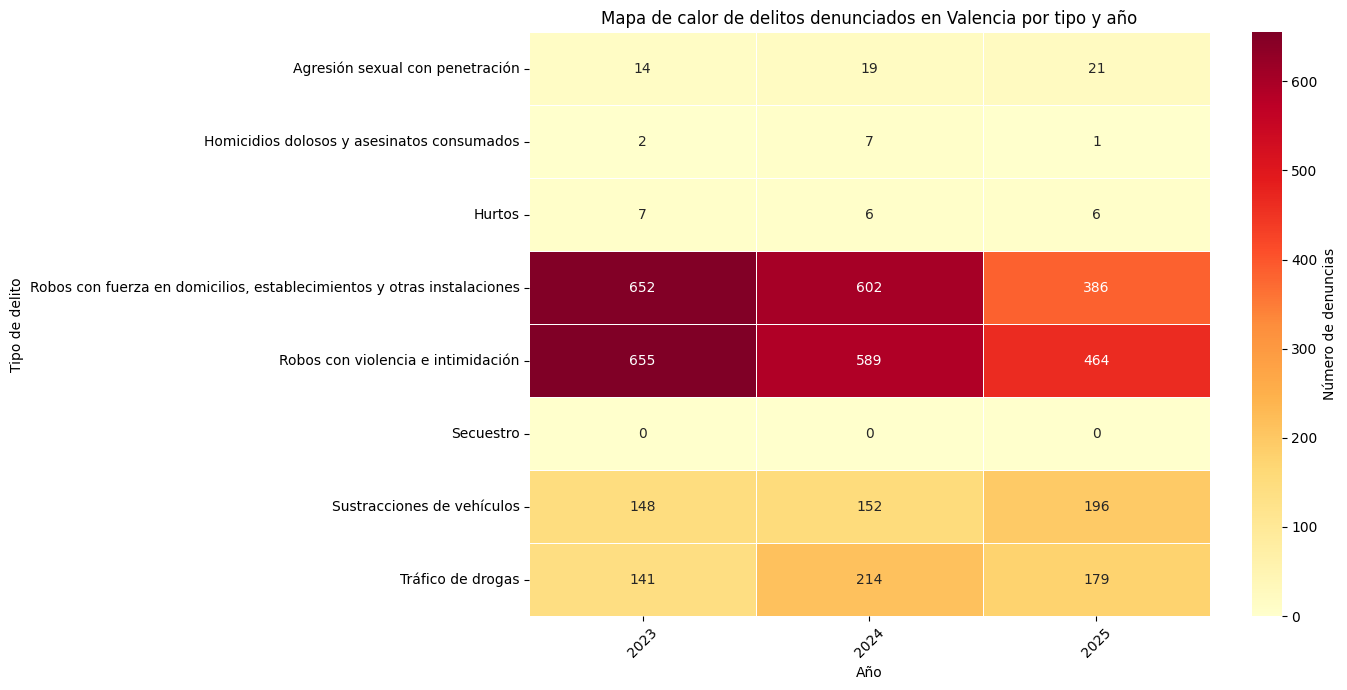

In [63]:
plt.figure(figsize=(14, 7))
heatmap_data = df_delincuencia_filtrado.pivot_table(
    index='Parámetro',
    columns='Año',
    values='Denuncias',
    aggfunc='sum'
).fillna(0)
sns.heatmap(
    heatmap_data,
    cmap='YlOrRd',
    annot=True,
    fmt='.0f',
    linewidths=.5,
    cbar_kws={'label': 'Número de denuncias'},
    annot_kws={"size": 10}
)
plt.title('Mapa de calor de delitos denunciados en Valencia por tipo y año')
plt.xlabel('Año')
plt.ylabel('Tipo de delito')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La imagen muestra la localización y el valor mínimo de alquiler en los barrios analizados de Valencia. El marcador indica el barrio con el precio de alquiler más bajo, que es de 18 €. Esto sugiere que, aunque existen zonas con alta rentabilidad y demanda, también hay barrios donde el coste de entrada para alquilar es significativamente menor. Estos barrios pueden representar oportunidades para inversores con menor presupuesto o para quienes buscan maximizar la rentabilidad relativa, aunque es importante considerar que precios bajos pueden estar asociados a menor demanda, menor calidad de la vivienda o mayor competencia. En resumen, la diversidad de precios en los barrios de Valencia permite adaptar la estrategia de inversión según el perfil y los objetivos del inversor.

In [64]:
import folium
import json

# Cargar archivo GeoJSON
with open(r"data\neighbourhoods.geojson", encoding='utf-8') as f:
    geojson_data = json.load(f)

# Asegurarte de que los nombres de barrios coinciden en formato
barrio_rentabilidad_neta['neighbourhood'] = barrio_rentabilidad_neta['neighbourhood'].str.upper().str.strip()
for feature in geojson_data["features"]:
    feature["properties"]["neighbourhood"] = feature["properties"]["neighbourhood"].upper().strip()

# Asegúrate de que la columna 'ROI (%)' esté en barrio_rentabilidad_neta
if 'ROI (%)' not in barrio_rentabilidad_neta.columns:
    barrio_rentabilidad_neta = barrio_rentabilidad_neta.merge(
        roi_por_barrio['ROI (%)'].reset_index(),
        on='neighbourhood',
        how='left'
    )

# Crear un diccionario para acceso rápido a los valores de ROI por barrio
roi_map = barrio_rentabilidad_neta.set_index('neighbourhood').to_dict(orient='index')

# Añadir los valores de Net ROI (%) y ROI (%) a las propiedades de cada feature
for feature in geojson_data["features"]:
    barrio = feature["properties"]["neighbourhood"]
    roi_info = roi_map.get(barrio, {})
    feature["properties"]["Net ROI (%)"] = roi_info.get("Net ROI (%)")
    feature["properties"]["ROI (%)"] = roi_info.get("ROI (%)")

# Crear mapa base centrado en Valencia
mapa = folium.Map(location=[39.4699, -0.3763], zoom_start=12, tiles='cartodbpositron')

# Capa de coropletas para ROI Neto
folium.Choropleth(
    geo_data=geojson_data,
    name="choropleth_neto",
    data=barrio_rentabilidad_neta,
    columns=["neighbourhood", "Net ROI (%)"],
    key_on="feature.properties.neighbourhood",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="Rentabilidad Neta (%)",
    nan_fill_color="lightgray"
).add_to(mapa)

# Capa de coropletas para ROI Bruto (opcional, diferente color)
if 'ROI (%)' in barrio_rentabilidad_neta.columns:
    folium.Choropleth(
        geo_data=geojson_data,
        name="choropleth_bruto",
        data=barrio_rentabilidad_neta,
        columns=["neighbourhood", "ROI (%)"],
        key_on="feature.properties.neighbourhood",
        fill_color="Blues",
        fill_opacity=0.4,
        line_opacity=0.1,
        legend_name="Rentabilidad Bruta (%)",
        nan_fill_color="lightgray",
        show=False
    ).add_to(mapa)

# Tooltip para mostrar el nombre del barrio y ambos ROI al pasar el ratón
tooltip_fields = ["neighbourhood"]
tooltip_aliases = ["Barrio:"]
if 'Net ROI (%)' in barrio_rentabilidad_neta.columns:
    tooltip_fields.append("Net ROI (%)")
    tooltip_aliases.append("ROI Neto (%):")
if 'ROI (%)' in barrio_rentabilidad_neta.columns:
    tooltip_fields.append("ROI (%)")
    tooltip_aliases.append("ROI Bruto (%):")

folium.GeoJson(
    geojson_data,
    name="labels",
    style_function=lambda x: {"fillOpacity": 0, "color": "transparent"},
    tooltip=folium.GeoJsonTooltip(
        fields=tooltip_fields,
        aliases=tooltip_aliases,
        localize=True
    )
).add_to(mapa)

folium.LayerControl().add_to(mapa)
mapa


### Conclusiones finales para empresas interesadas en invertir en alquiler turístico en Valencia (AirBnB)

El análisis integral de los datos de rentabilidad, competencia, demanda y características de los barrios de Valencia permite extraer las siguientes conclusiones clave para una empresa que busca invertir en el mercado de alquiler turístico:

- **Rentabilidad excepcional en barrios específicos:** Zonas como Pinedo, Carpesa y La Gran Vía destacan por su altísima rentabilidad neta y bruta, superando ampliamente la media de la ciudad. Estos barrios ofrecen oportunidades únicas para maximizar el retorno de la inversión, aunque pueden tener menor volumen de anuncios y demanda más estacional.

- **Equilibrio entre rentabilidad y competencia:** Los barrios céntricos y turísticos (Cabanyal-Canyamelar, Russafa, El Mercat, El Carme) combinan buena rentabilidad con una demanda sostenida, pero presentan una competencia elevada. Invertir en estas zonas requiere estrategias de diferenciación y calidad para destacar frente a la saturación del mercado.

- **Demanda y flujo de huéspedes:** El número total de reseñas y las reseñas mensuales son indicadores sólidos de demanda real. Barrios con altos valores en estos indicadores aseguran un flujo constante de huéspedes y menor riesgo de vacancia, aunque suelen estar asociados a mayor competencia.

- **Importancia de la calidad y el equipamiento:** Los barrios con mayor número medio de amenities y viviendas más grandes tienden a mantener mejores niveles de ocupación y rentabilidad. Invertir en la mejora de la calidad, el equipamiento y la experiencia del huésped puede marcar la diferencia en mercados competitivos.

- **Oportunidades en barrios con baja competencia:** Existen barrios con alta rentabilidad neta y un número reducido de anuncios activos, lo que los convierte en opciones especialmente atractivas para empresas que buscan menor riesgo de saturación y mayor facilidad para captar reservas.

- **Diversidad de precios y accesibilidad:** Valencia presenta una amplia gama de precios de alquiler y compra por metro cuadrado. Esto permite adaptar la estrategia de inversión según el presupuesto y el perfil de riesgo de la empresa, desde barrios exclusivos hasta zonas emergentes con potencial de revalorización.

- **Factores adicionales a considerar:** Además de la rentabilidad y la demanda, es fundamental analizar la regulación local, la evolución de la competencia, la estacionalidad y los posibles cambios en la normativa turística.

**Recomendación general:**  
La mejor estrategia de inversión combina la selección de barrios con alta rentabilidad neta, demanda sostenida y competencia controlada, junto con una apuesta por la calidad y la diferenciación del producto. Es recomendable diversificar la cartera en diferentes zonas para equilibrar riesgo y retorno, y monitorizar de forma continua los indicadores clave del mercado.

En resumen, Valencia ofrece un mercado dinámico y con grandes oportunidades para empresas de alquiler turístico, siempre que la toma de decisiones esté basada en datos y en un análisis integral de rentabilidad, competencia y demanda.